In [1]:
import rasterio
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from rasterio.plot import show
from PIL import Image
from scipy.stats import pearsonr
from colorama import Fore
from rasterio.features import geometry_mask
from shapely.geometry import Polygon, mapping

## Jeu avec les données

In [2]:
gdf=gpd.read_file("Base_De_Donnees.gpkg")
#print(gdf)

In [3]:
# Ouvrir le fichier raster avec rasterio
with rasterio.open('DATA_S2_extrait/SENTINEL2A_20200520-105859-615_L2A_T31TDJ_C_V2-2_FRE_extrait_stack_gain.bsq', 'r') as rst:
    # Extraire les valeurs du raster pour chaque point de la couche géométrique
    liste=[]
    for index, row in gdf.iterrows():
        # Extraire les coordonnées du point
        multipolygon= row['geometry']
        # Extraire les valeurs du raster pour le point
        vals = rst.sample([(multipolygon)])
        liste.append(multipolygon)
        
        # Afficher les valeurs extraites
        # print(f"Point {index+1} - Coordonnées : ({position}) - Valeurs : {vals}")

print(multipolygon)
print(liste)
print(len(multipolygon.geoms))
polygon=multipolygon.geoms[0]
coords=polygon.exterior.coords
print("")
print(coords)

MULTIPOLYGON (((450239.9959124512 4795490.0039624525, 450260.28108531 4795489.743895806, 450259.8866220774 4795469.593006086, 450240.0044670404 4795469.853243241, 450239.9959124512 4795490.0039624525)))
[<MULTIPOLYGON (((450649.457 4795630.721, 450640.192 4795630.637, 450640.31 4...>, <MULTIPOLYGON (((450620.264 4795760.111, 450660.13 4795760.011, 450659.599 4...>, <MULTIPOLYGON (((450459.914 4795840.194, 450460.082 4795860.069, 450479.956 ...>, <MULTIPOLYGON (((450300.126 4795880.101, 450320.001 4795879.807, 450320.009 ...>, <MULTIPOLYGON (((450469.725 4795590.613, 450469.6 4795599.753, 450489.82 479...>, <MULTIPOLYGON (((450429.704 4795580.121, 450420.189 4795580.159, 450420.05 4...>, <MULTIPOLYGON (((450280.266 4795660.23, 450280.197 4795679.863, 450299.951 4...>, <MULTIPOLYGON (((450240.048 4795700.063, 450260.216 4795700.013, 450260.176 ...>, <MULTIPOLYGON (((450319.935 4795580.234, 450320.161 4795600.167, 450339.977 ...>, <MULTIPOLYGON (((450179.829 4795519.897, 450170.357 479552

## Calculs NDVI, PSRI et IRECI

In [11]:
with rasterio.open('DATA_S2_extrait/SENTINEL2A_20200520-105859-615_L2A_T31TDJ_C_V2-2_FRE_extrait_stack_gain.bsq') as src:
    # Extraire les métadonnées de l'image
    transform = src.transform
    height = src.height
    width = src.width
    coordpixel_20_spring=[]
    bande_rouge_20_spring=[]
    bande_verte_20_spring=[]
    bande_infrarouge_20_spring=[]
    bande_RE1_20_spring=[]
    bande_RE2_20_spring=[]
    bande_infrarouge_20_spring_ireci=[]
    for i in range(len(liste)):
        poly=gdf.iloc[i]['geometry'].geoms[0]
        poly_transformed = mapping(poly)
        # Convertir le polygone en coordonnées de pixels
        poly_pixels = rasterio.features.geometry_mask([poly_transformed], out_shape=(height, width), transform=transform, invert=True)
        coordpixel_20_spring.append(np.where(poly_pixels==True))
        # Lire les valeurs de pixels à l'intérieur du polygone      
        image = src.read(3, masked=True)
        pixels_inside_poly = image[poly_pixels]
        bande_rouge_20_spring.append(pixels_inside_poly)
        
        image2 = src.read(7, masked=True)
        pixels_inside_poly2 = image2[poly_pixels]
        bande_infrarouge_20_spring.append(pixels_inside_poly2)
        
        image3 = src.read(2, masked=True)
        pixels_inside_poly3 = image3[poly_pixels]
        bande_verte_20_spring.append(pixels_inside_poly3)

        image4 = src.read(5, masked=True)
        pixels_inside_poly4 = image4[poly_pixels]
        bande_RE1_20_spring.append(pixels_inside_poly4)
        
        image5 = src.read(6, masked=True)
        pixels_inside_poly5 = image5[poly_pixels]
        bande_RE2_20_spring.append(pixels_inside_poly5)
        
        image6 = src.read(4, masked=True)
        pixels_inside_poly6 = image6[poly_pixels]
        bande_infrarouge_20_spring_ireci.append(pixels_inside_poly6)

In [12]:
with rasterio.open('DATA_S2_extrait/SENTINEL2A_20160521-105553-553_L2A_T31TDJ_D_V1-1_FRE_extrait_stack_gain.bsq') as src:
    # Extraire les métadonnées de l'image
    transform = src.transform
    height = src.height
    width = src.width
    coordpixel_16_spring=[]
    bande_rouge_16_spring=[]
    bande_infrarouge_16_spring=[]
    bande_verte_16_spring=[]
    bande_RE1_16_spring=[]
    bande_RE2_16_spring=[]
    bande_infrarouge_16_spring_ireci=[]
    for i in range(len(liste)):
        poly=gdf.iloc[i]['geometry'].geoms[0]
        poly_transformed = mapping(poly)
        # Convertir le polygone en coordonnées de pixels
        poly_pixels = rasterio.features.geometry_mask([poly_transformed], out_shape=(height, width), transform=transform, invert=True)
        coordpixel_16_spring.append(np.where(poly_pixels==True))
        # Lire les valeurs de pixels à l'intérieur du polygone
        image = src.read(3, masked=True)
        pixels_inside_poly = image[poly_pixels]
        bande_rouge_16_spring.append(pixels_inside_poly)
        
        image2 = src.read(7, masked=True) 
        pixels_inside_poly2 = image2[poly_pixels]
        bande_infrarouge_16_spring.append(pixels_inside_poly2)
        
        image3 = src.read(2, masked=True)
        pixels_inside_poly3 = image3[poly_pixels]
        bande_verte_16_spring.append(pixels_inside_poly3)
        
        image4 = src.read(5, masked=True)
        pixels_inside_poly4 = image4[poly_pixels]
        bande_RE1_16_spring.append(pixels_inside_poly4)
        
        image5 = src.read(6, masked=True)
        pixels_inside_poly5 = image5[poly_pixels]
        bande_RE2_16_spring.append(pixels_inside_poly5)
        
        image6 = src.read(4, masked=True)
        pixels_inside_poly6 = image6[poly_pixels]
        bande_infrarouge_16_spring_ireci.append(pixels_inside_poly6)

In [13]:
with rasterio.open('SENTINEL2A_20200825-104903-378_L2A_T31TDJ_C_V2-2_FRE_extrait_stack_gain.bsq') as src:
    # Extraire les métadonnées de l'image
    transform = src.transform
    height = src.height
    width = src.width
    coordpixel_20_summer=[]
    bande_rouge_20_summer=[]
    bande_verte_20_summer=[]
    bande_infrarouge_20_summer=[]
    bande_RE1_20_summer=[]
    bande_RE2_20_summer=[]
    bande_infrarouge_20_summer_ireci=[]
    for i in range(len(liste)):
        poly=gdf.iloc[i]['geometry'].geoms[0]
        poly_transformed = mapping(poly)
        # Convertir le polygone en coordonnées de pixels
        poly_pixels = rasterio.features.geometry_mask([poly_transformed], out_shape=(height, width), transform=transform, invert=True)
        coordpixel_20_summer.append(np.where(poly_pixels==True))
        # Lire les valeurs de pixels à l'intérieur du polygone
        image = src.read(3, masked=True)
        pixels_inside_poly = image[poly_pixels]
        bande_rouge_20_summer.append(pixels_inside_poly)
        
        image2 = src.read(7, masked=True)
        pixels_inside_poly2 = image2[poly_pixels]
        bande_infrarouge_20_summer.append(pixels_inside_poly2)
        
        image3 = src.read(2, masked=True)
        pixels_inside_poly3 = image3[poly_pixels]
        bande_verte_20_summer.append(pixels_inside_poly3)

        image4 = src.read(5, masked=True)
        pixels_inside_poly4 = image4[poly_pixels]
        bande_RE1_20_summer.append(pixels_inside_poly4)
        
        image5 = src.read(6, masked=True)
        pixels_inside_poly5 = image5[poly_pixels]
        bande_RE2_20_summer.append(pixels_inside_poly5)
        
        image6 = src.read(4, masked=True)
        pixels_inside_poly6 = image6[poly_pixels]
        bande_infrarouge_20_summer_ireci.append(pixels_inside_poly6)

In [14]:
with rasterio.open("SENTINEL2A_20160826-104023-461_L2A_T31TDJ_D_V1-1_FRE_extrait_stack_gain.bsq") as src:
     # Extraire les métadonnées de l'image
    transform = src.transform
    height = src.height
    width = src.width
    coordpixel_16_summer=[]
    bande_rouge_16_summer=[]
    bande_infrarouge_16_summer=[]
    bande_verte_16_summer=[]
    bande_RE1_16_summer=[]
    bande_RE2_16_summer=[]
    bande_infrarouge_16_summer_ireci=[]
    for i in range(len(liste)):
        poly=gdf.iloc[i]['geometry'].geoms[0]
        poly_transformed = mapping(poly)
        # Convertir le polygone en coordonnées de pixels
        poly_pixels = rasterio.features.geometry_mask([poly_transformed], out_shape=(height, width), transform=transform, invert=True)
        coordpixel_16_summer.append(np.where(poly_pixels==True))
        # Lire les valeurs de pixels à l'intérieur du polygone
        image = src.read(3, masked=True)
        pixels_inside_poly = image[poly_pixels]
        bande_rouge_16_summer.append(pixels_inside_poly)
        
        image2 = src.read(7, masked=True)  
        pixels_inside_poly2 = image2[poly_pixels]
        bande_infrarouge_16_summer.append(pixels_inside_poly2)
        
        image3 = src.read(2, masked=True)
        pixels_inside_poly3 = image3[poly_pixels]
        bande_verte_16_summer.append(pixels_inside_poly3)
        
        image4 = src.read(5, masked=True)
        pixels_inside_poly4 = image4[poly_pixels]
        bande_RE1_16_summer.append(pixels_inside_poly4)
        
        image5 = src.read(6, masked=True)
        pixels_inside_poly5 = image5[poly_pixels]
        bande_RE2_16_summer.append(pixels_inside_poly5)
        
        image6 = src.read(4, masked=True)
        pixels_inside_poly6 = image6[poly_pixels]
        bande_infrarouge_16_summer_ireci.append(pixels_inside_poly6)


In [15]:
with rasterio.open("SENTINEL2A_20201017-105859-696_L2A_T31TDJ_C_V2-2_FRE_extrait_stack_gain.bsq") as src:
     # Extraire les métadonnées de l'image
    transform = src.transform
    height = src.height
    width = src.width
    coordpixel_20_autumn=[]
    bande_rouge_20_autumn=[]
    bande_infrarouge_20_autumn=[]
    bande_verte_20_autumn=[]
    bande_RE1_20_autumn=[]
    bande_RE2_20_autumn=[]
    bande_infrarouge_20_autumn_ireci=[]
    for i in range(len(liste)):
        poly=gdf.iloc[i]['geometry'].geoms[0]
        poly_transformed = mapping(poly)
        # Convertir le polygone en coordonnées de pixels
        poly_pixels = rasterio.features.geometry_mask([poly_transformed], out_shape=(height, width), transform=transform, invert=True)
        coordpixel_20_autumn.append(np.where(poly_pixels==True))
        # Lire les valeurs de pixels à l'intérieur du polygone     
        image = src.read(3, masked=True)
        pixels_inside_poly = image[poly_pixels]
        bande_rouge_20_autumn.append(pixels_inside_poly)
        
        image2 = src.read(7, masked=True) 
        pixels_inside_poly2 = image2[poly_pixels]
        bande_infrarouge_20_autumn.append(pixels_inside_poly2)
        
        image3 = src.read(2, masked=True)
        pixels_inside_poly3 = image3[poly_pixels]
        bande_verte_20_autumn.append(pixels_inside_poly3)
        
        image4 = src.read(5, masked=True)
        pixels_inside_poly4 = image4[poly_pixels]
        bande_RE1_20_autumn.append(pixels_inside_poly4)
        
        image5 = src.read(6, masked=True)
        pixels_inside_poly5 = image5[poly_pixels]
        bande_RE2_20_autumn.append(pixels_inside_poly5)
        
        image6 = src.read(4, masked=True)
        pixels_inside_poly6 = image6[poly_pixels]
        bande_infrarouge_20_autumn_ireci.append(pixels_inside_poly6)

In [16]:
with rasterio.open("SENTINEL2A_20161015-104513-300_L2A_T31TDJ_D_V1-1_FRE_extrait_stack_gain.bsq") as src:
     # Extraire les métadonnées de l'image
    transform = src.transform
    height = src.height
    width = src.width
    coordpixel_16_autumn=[]
    bande_rouge_16_autumn=[]
    bande_infrarouge_16_autumn=[]
    bande_verte_16_autumn=[]
    bande_RE1_16_autumn=[]
    bande_RE2_16_autumn=[]
    bande_infrarouge_16_autumn_ireci=[]
    for i in range(len(liste)):
        poly=gdf.iloc[i]['geometry'].geoms[0]
        poly_transformed = mapping(poly)
        # Convertir le polygone en coordonnées de pixels
        poly_pixels = rasterio.features.geometry_mask([poly_transformed], out_shape=(height, width), transform=transform, invert=True)
        coordpixel_16_autumn.append(np.where(poly_pixels==True))
        # Lire les valeurs de pixels à l'intérieur du polygone     
        image = src.read(3, masked=True)
        pixels_inside_poly = image[poly_pixels]
        bande_rouge_16_autumn.append(pixels_inside_poly)
        
        image2 = src.read(7, masked=True) 
        pixels_inside_poly2 = image2[poly_pixels]
        bande_infrarouge_16_autumn.append(pixels_inside_poly2)
        
        image3 = src.read(2, masked=True)
        pixels_inside_poly3 = image3[poly_pixels]
        bande_verte_16_autumn.append(pixels_inside_poly3)
        
        image4 = src.read(5, masked=True)
        pixels_inside_poly4 = image4[poly_pixels]
        bande_RE1_16_autumn.append(pixels_inside_poly4)
        
        image5 = src.read(6, masked=True)
        pixels_inside_poly5 = image5[poly_pixels]
        bande_RE2_16_autumn.append(pixels_inside_poly5)
        
        image6 = src.read(4, masked=True)
        pixels_inside_poly6 = image6[poly_pixels]
        bande_infrarouge_16_autumn_ireci.append(pixels_inside_poly6)

In [17]:
with rasterio.open("SENTINEL2A_20170516-105322-634_L2A_T31TDJ_D_V1-4_FRE_extrait_stack_gain.bsq") as src:
     # Extraire les métadonnées de l'image
    transform = src.transform
    height = src.height
    width = src.width
    coordpixel_17_spring=[]
    bande_rouge_17_spring=[]
    bande_infrarouge_17_spring=[]
    bande_verte_17_spring=[]
    bande_RE1_17_spring=[]
    bande_RE2_17_spring=[]
    bande_infrarouge_17_spring_ireci=[]
    for i in range(len(liste)):
        poly=gdf.iloc[i]['geometry'].geoms[0]
        poly_transformed = mapping(poly)
        # Convertir le polygone en coordonnées de pixels
        poly_pixels = rasterio.features.geometry_mask([poly_transformed], out_shape=(height, width), transform=transform, invert=True)
        coordpixel_17_spring.append(np.where(poly_pixels==True))
        # Lire les valeurs de pixels à l'intérieur du polygone     
        image = src.read(3, masked=True)
        pixels_inside_poly = image[poly_pixels]
        bande_rouge_17_spring.append(pixels_inside_poly)
        
        image2 = src.read(7, masked=True) 
        pixels_inside_poly2 = image2[poly_pixels]
        bande_infrarouge_17_spring.append(pixels_inside_poly2)
        
        image3 = src.read(2, masked=True)
        pixels_inside_poly3 = image3[poly_pixels]
        bande_verte_17_spring.append(pixels_inside_poly3)
        
        image4 = src.read(5, masked=True)
        pixels_inside_poly4 = image4[poly_pixels]
        bande_RE1_17_spring.append(pixels_inside_poly4)
        
        image5 = src.read(6, masked=True)
        pixels_inside_poly5 = image5[poly_pixels]
        bande_RE2_17_spring.append(pixels_inside_poly5)
        
        image6 = src.read(4, masked=True)
        pixels_inside_poly6 = image6[poly_pixels]
        bande_infrarouge_17_spring_ireci.append(pixels_inside_poly6)       


## Affichages corrélations NDVI, PSRI et IRECI

### Spring 2016

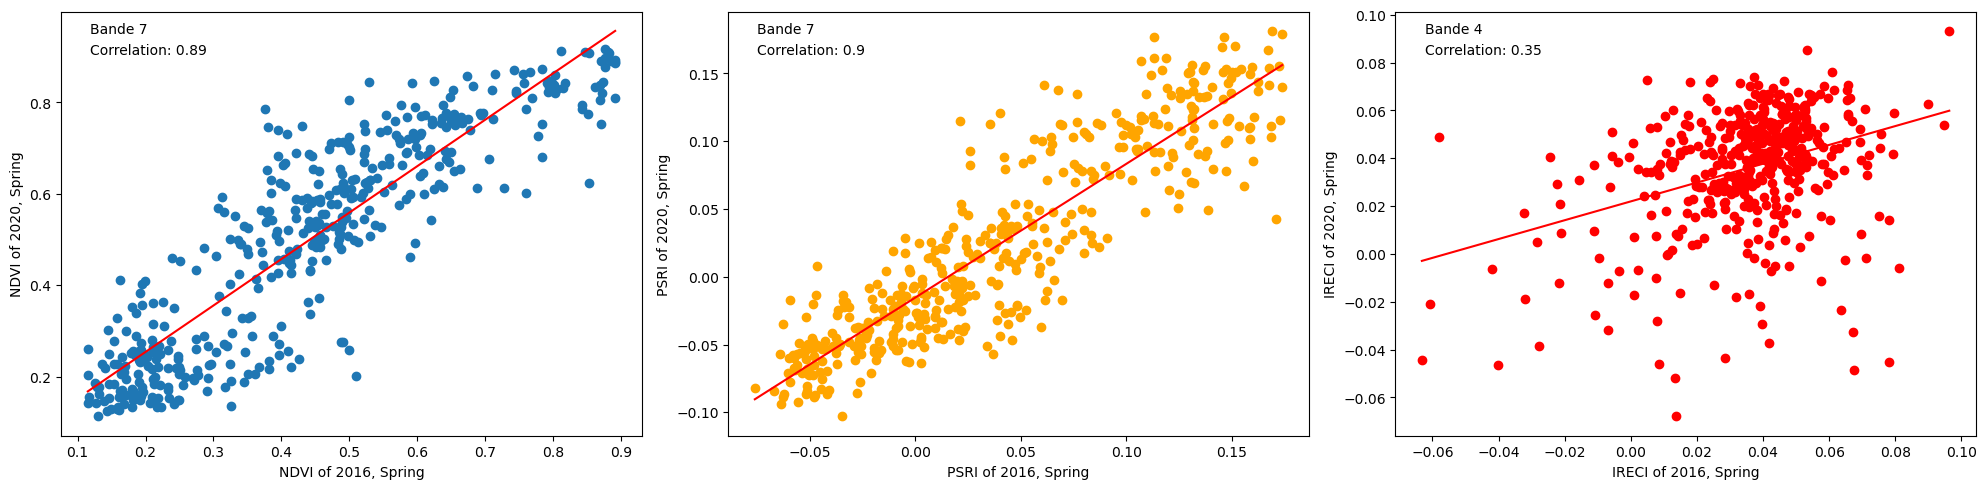

In [23]:
ndvi_16_spring=[]
ndvi_20_spring=[]
PSRI_20_spring=[]
PSRI_16_spring=[]
IRECI_16_spring=[]
IRECI_20_spring=[]
for i in range(len(liste)):
    for j in range(len(bande_rouge_16_spring[i])):
        ndvi_16_spring.append( (bande_infrarouge_16_spring[i][j] - bande_rouge_16_spring[i][j]) / (bande_infrarouge_16_spring[i][j] + bande_rouge_16_spring[i][j]))
        ndvi_20_spring.append((bande_infrarouge_20_spring[i][j] - bande_rouge_20_spring[i][j]) / (bande_infrarouge_20_spring[i][j] + bande_rouge_20_spring[i][j]))
        PSRI_20_spring.append((bande_rouge_20_spring[i][j]-bande_verte_20_spring[i][j])/bande_infrarouge_20_spring[i][j])
        PSRI_16_spring.append((bande_rouge_16_spring[i][j]-bande_verte_16_spring[i][j])/bande_infrarouge_16_spring[i][j])
        IRECI_20_spring.append((bande_infrarouge_20_spring_ireci[i][j] - bande_rouge_20_spring[i][j])/(bande_RE1_20_spring[i][j]/bande_RE2_20_spring[i][j]))
        IRECI_16_spring.append((bande_infrarouge_16_spring_ireci[i][j] - bande_rouge_16_spring[i][j])/(bande_RE1_16_spring[i][j]/bande_RE2_16_spring[i][j]))
        
ndvi_16_spring=np.array(ndvi_16_spring)
ndvi_20_spring=np.array(ndvi_20_spring)
coefficients_ndvi_16_20_spring = np.polyfit(ndvi_16_spring, ndvi_20_spring, 1)
x_reg_ndvi_16_20_spring = np.linspace(ndvi_16_spring.min(), ndvi_16_spring.max(), len(ndvi_16_spring))
y_reg_ndvi_16_20_spring = np.polyval(coefficients_ndvi_16_20_spring, x_reg_ndvi_16_20_spring)

PSRI_16_spring=np.array(PSRI_16_spring)
PSRI_20_spring=np.array(PSRI_20_spring)
coefficients_psri_16_20_spring = np.polyfit(PSRI_16_spring, PSRI_20_spring, 1)
x_reg_PSRI_16_20_spring = np.linspace(PSRI_16_spring.min(), PSRI_16_spring.max(), len(PSRI_16_spring))
y_reg_PSRI_16_20_spring = np.polyval(coefficients_psri_16_20_spring, x_reg_PSRI_16_20_spring)

IRECI_16_spring=np.array(IRECI_16_spring)
IRECI_20_spring=np.array(IRECI_20_spring)
coefficients_IRECI_16_20_spring = np.polyfit(IRECI_16_spring, IRECI_20_spring, 1)
x_reg_IRECI_16_20_spring = np.linspace(IRECI_16_spring.min(), IRECI_16_spring.max(), len(IRECI_16_spring))
y_reg_IRECI_16_20_spring = np.polyval(coefficients_IRECI_16_20_spring, x_reg_IRECI_16_20_spring)

Corr_matrixNDVI_2=np.corrcoef(ndvi_16_spring,ndvi_20_spring)
Corr_matrixPSRI_2=np.corrcoef(PSRI_16_spring,PSRI_20_spring)
Corr_matrixIRECI_2=np.corrcoef(IRECI_16_spring,IRECI_20_spring)   
CorrNDVI_2=round(Corr_matrixNDVI_2[0,1],3)
CorrPSRI_2=round(Corr_matrixPSRI_2[0,1],3)
CorrIRECI_2=round(Corr_matrixIRECI_2[0,1],3)
        
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
# Subplot pour le graphique de corrélation NDVI
axs[0].scatter(ndvi_16_spring, ndvi_20_spring)
axs[0].plot(x_reg_ndvi_16_20_spring, y_reg_ndvi_16_20_spring, color='r')
axs[0].set_xlabel('NDVI of 2016, Spring')
axs[0].set_ylabel('NDVI of 2020, Spring')
#axs[0].set_title('NDVI correlation between spring 2016 and spring 2020')
axs[0].text(0.05, 0.95, 'Bande 7', transform=axs[0].transAxes)
axs[0].text(0.05, 0.90, 'Correlation: {}'.format(CorrNDVI_2), transform=axs[0].transAxes)
# Subplot pour le graphique de corrélation PSRI
axs[1].scatter(PSRI_16_spring, PSRI_20_spring, c='orange')
axs[1].plot(x_reg_PSRI_16_20_spring, y_reg_PSRI_16_20_spring, color='r')
axs[1].set_xlabel('PSRI of 2016, Spring')
axs[1].set_ylabel('PSRI of 2020, Spring')
#axs[1].set_title('PSRI correlation between spring 2016 and spring 2020')
axs[1].text(0.05, 0.95, 'Bande 7',transform=axs[1].transAxes )
axs[1].text(0.05, 0.90, 'Correlation: {}'.format(CorrPSRI_2), transform=axs[1].transAxes)
# Subplot pour le graphique de corrélation IRECI
axs[2].scatter(IRECI_16_spring, IRECI_20_spring, c='red')
axs[2].plot(x_reg_IRECI_16_20_spring, y_reg_IRECI_16_20_spring, color='r')
axs[2].set_xlabel('IRECI of 2016, Spring')
axs[2].set_ylabel('IRECI of 2020, Spring')
#axs[2].set_title('IRECI correlation between spring 2016 and spring 2020')
axs[2].text(0.05, 0.95, 'Bande 4', transform=axs[2].transAxes)
axs[2].text(0.05, 0.90, 'Correlation: {}'.format(CorrIRECI_2), transform=axs[2].transAxes)
# Afficher la figure
plt.tight_layout()
plt.show()


### Summer 2016

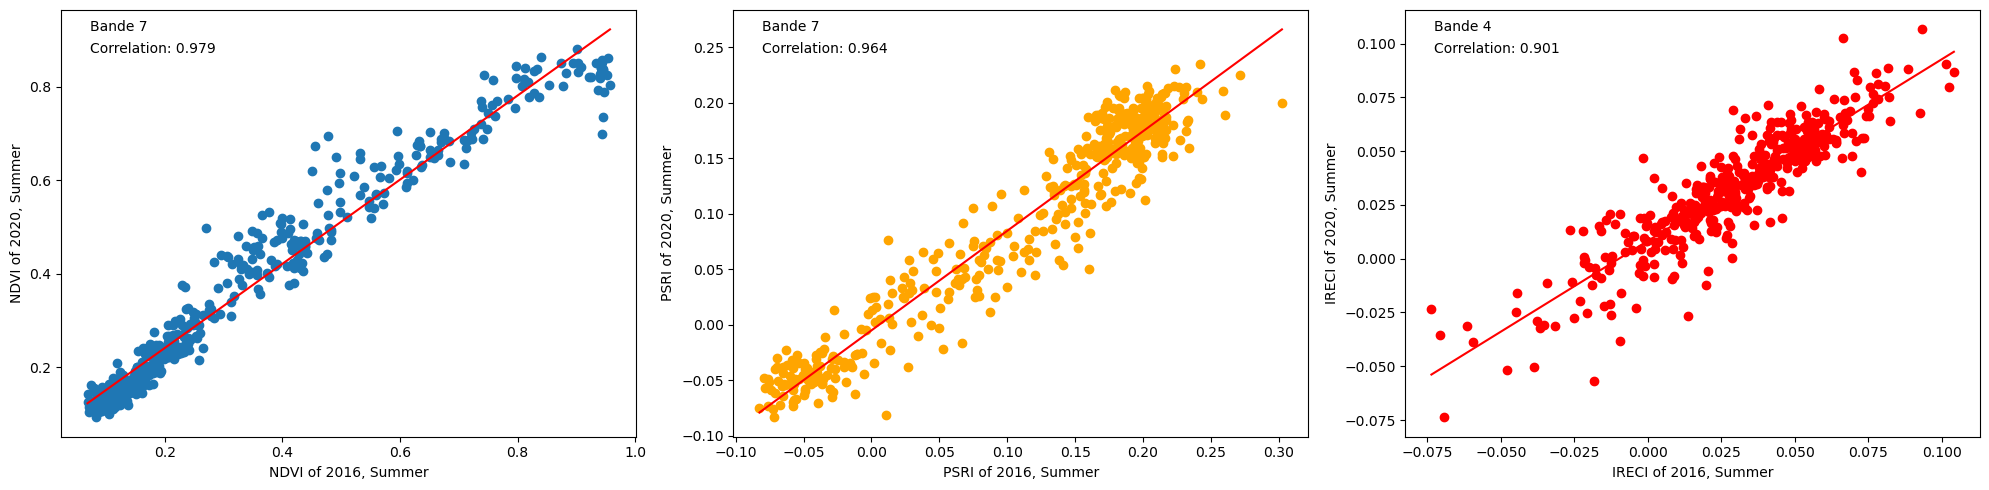

In [24]:
ndvi_16_summer=[]
ndvi_20_summer=[]
PSRI_20_summer=[]
PSRI_16_summer=[]
IRECI_16_summer=[]
IRECI_20_summer=[]
for i in range(len(liste)):
    for j in range(len(bande_rouge_16_summer[i])):
        ndvi_16_summer.append( (bande_infrarouge_16_summer[i][j] - bande_rouge_16_summer[i][j]) / (bande_infrarouge_16_summer[i][j] + bande_rouge_16_summer[i][j]))
        ndvi_20_summer.append((bande_infrarouge_20_summer[i][j] - bande_rouge_20_summer[i][j]) / (bande_infrarouge_20_summer[i][j] + bande_rouge_20_summer[i][j]))
        PSRI_20_summer.append((bande_rouge_20_summer[i][j]-bande_verte_20_summer[i][j])/bande_infrarouge_20_summer[i][j])
        PSRI_16_summer.append((bande_rouge_16_summer[i][j]-bande_verte_16_summer[i][j])/bande_infrarouge_16_summer[i][j])
        IRECI_20_summer.append((bande_infrarouge_20_summer_ireci[i][j] - bande_rouge_20_summer[i][j])/(bande_RE1_20_summer[i][j]/bande_RE2_20_summer[i][j]))
        IRECI_16_summer.append((bande_infrarouge_16_summer_ireci[i][j] - bande_rouge_16_summer[i][j])/(bande_RE1_16_summer[i][j]/bande_RE2_16_summer[i][j]))
        
ndvi_16_summer=np.array(ndvi_16_summer)
ndvi_20_summer=np.array(ndvi_20_summer)
coefficients_ndvi_16_20_summer = np.polyfit(ndvi_16_summer, ndvi_20_summer, 1)
x_reg_ndvi_16_20_summer = np.linspace(ndvi_16_summer.min(), ndvi_16_summer.max(), len(ndvi_16_summer))
y_reg_ndvi_16_20_summer = np.polyval(coefficients_ndvi_16_20_summer, x_reg_ndvi_16_20_summer)

PSRI_16_summer=np.array(PSRI_16_summer)
PSRI_20_summer=np.array(PSRI_20_summer)
coefficients_psri_16_20_summer = np.polyfit(PSRI_16_summer, PSRI_20_summer, 1)
x_reg_PSRI_16_20_summer = np.linspace(PSRI_16_summer.min(), PSRI_16_summer.max(), len(PSRI_16_summer))
y_reg_PSRI_16_20_summer = np.polyval(coefficients_psri_16_20_summer, x_reg_PSRI_16_20_summer)

IRECI_16_summer=np.array(IRECI_16_summer)
IRECI_20_summer=np.array(IRECI_20_summer)
coefficients_IRECI_16_20_summer = np.polyfit(IRECI_16_summer, IRECI_20_summer, 1)
x_reg_IRECI_16_20_summer = np.linspace(IRECI_16_summer.min(), IRECI_16_summer.max(), len(IRECI_16_summer))
y_reg_IRECI_16_20_summer = np.polyval(coefficients_IRECI_16_20_summer, x_reg_IRECI_16_20_summer)

Corr_matrixNDVI_2=np.corrcoef(ndvi_16_summer,ndvi_20_summer)
Corr_matrixPSRI_2=np.corrcoef(PSRI_16_summer,PSRI_20_summer)
Corr_matrixIRECI_2=np.corrcoef(IRECI_16_summer,IRECI_20_summer)   
CorrNDVI_2=round(Corr_matrixNDVI_2[0,1],3)
CorrPSRI_2=round(Corr_matrixPSRI_2[0,1],3)
CorrIRECI_2=round(Corr_matrixIRECI_2[0,1],3)
        
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
# Subplot pour le graphique de corrélation NDVI
axs[0].scatter(ndvi_16_summer, ndvi_20_summer)
axs[0].plot(x_reg_ndvi_16_20_summer, y_reg_ndvi_16_20_summer, color='r')
axs[0].set_xlabel('NDVI of 2016, Summer')
axs[0].set_ylabel('NDVI of 2020, Summer')
#axs[0].set_title('NDVI correlation between summer 2016 and summer 2020')
axs[0].text(0.05, 0.95, 'Bande 7', transform=axs[0].transAxes)
axs[0].text(0.05, 0.90, 'Correlation: {}'.format(CorrNDVI_2), transform=axs[0].transAxes)
# Subplot pour le graphique de corrélation PSRI
axs[1].scatter(PSRI_16_summer, PSRI_20_summer, c='orange')
axs[1].plot(x_reg_PSRI_16_20_summer, y_reg_PSRI_16_20_summer, color='r')
axs[1].set_xlabel('PSRI of 2016, Summer')
axs[1].set_ylabel('PSRI of 2020, Summer')
#axs[1].set_title('PSRI correlation between summer 2016 and summer 2020')
axs[1].text(0.05, 0.95, 'Bande 7',transform=axs[1].transAxes )
axs[1].text(0.05, 0.90, 'Correlation: {}'.format(CorrPSRI_2), transform=axs[1].transAxes)
# Subplot pour le graphique de corrélation IRECI
axs[2].scatter(IRECI_16_summer, IRECI_20_summer, c='red')
axs[2].plot(x_reg_IRECI_16_20_summer, y_reg_IRECI_16_20_summer, color='r')
axs[2].set_xlabel('IRECI of 2016, Summer')
axs[2].set_ylabel('IRECI of 2020, Summer')
#axs[2].set_title('IRECI correlation between summer 2016 and summer 2020')
axs[2].text(0.05, 0.95, 'Bande 4', transform=axs[2].transAxes)
axs[2].text(0.05, 0.90, 'Correlation: {}'.format(CorrIRECI_2), transform=axs[2].transAxes)
# Afficher la figure
plt.tight_layout()
plt.show()

### Automn 2016

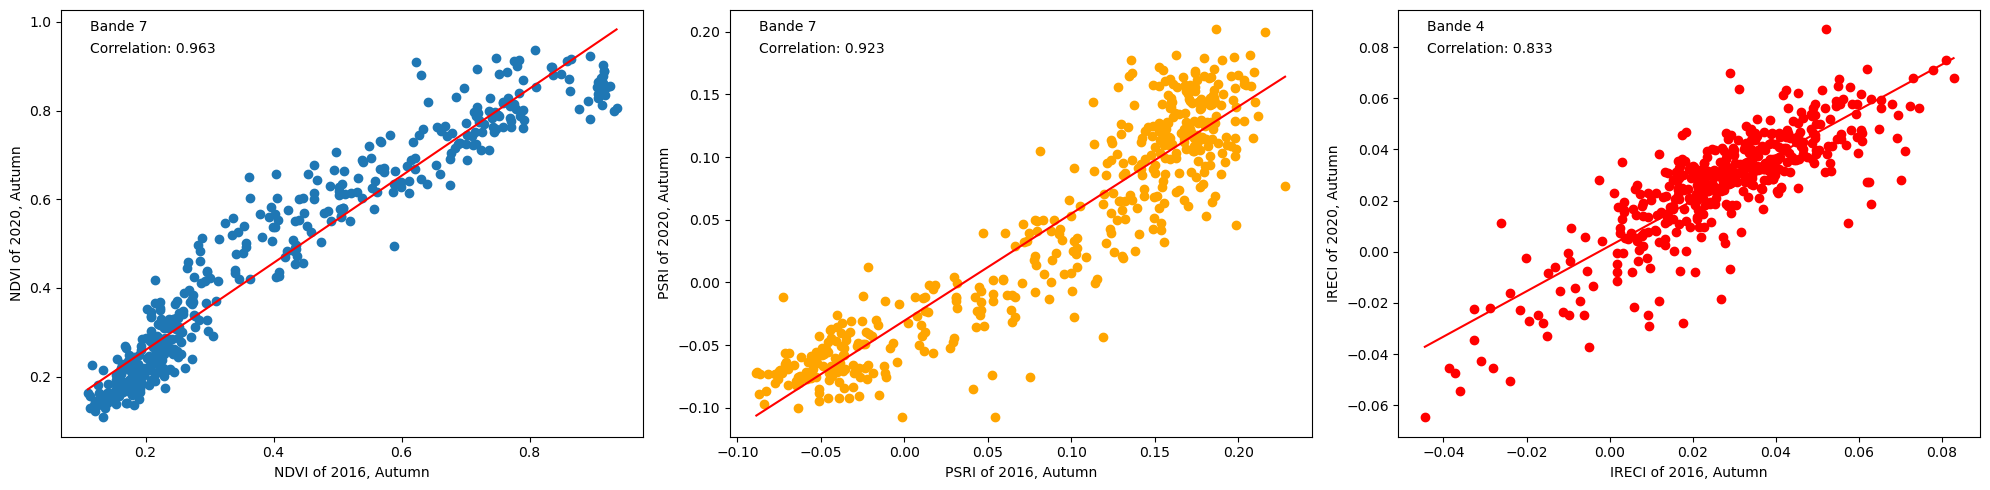

In [25]:
ndvi_16_autumn=[]
ndvi_20_autumn=[]
PSRI_20_autumn=[]
PSRI_16_autumn=[]
IRECI_16_autumn=[]
IRECI_20_autumn=[]
for i in range(len(liste)):
    for j in range(len(bande_rouge_16_autumn[i])):
        ndvi_16_autumn.append( (bande_infrarouge_16_autumn[i][j] - bande_rouge_16_autumn[i][j]) / (bande_infrarouge_16_autumn[i][j] + bande_rouge_16_autumn[i][j]))
        ndvi_20_autumn.append((bande_infrarouge_20_autumn[i][j] - bande_rouge_20_autumn[i][j]) / (bande_infrarouge_20_autumn[i][j] + bande_rouge_20_autumn[i][j]))
        PSRI_20_autumn.append((bande_rouge_20_autumn[i][j]-bande_verte_20_autumn[i][j])/bande_infrarouge_20_autumn[i][j])
        PSRI_16_autumn.append((bande_rouge_16_autumn[i][j]-bande_verte_16_autumn[i][j])/bande_infrarouge_16_autumn[i][j])
        IRECI_20_autumn.append((bande_infrarouge_20_autumn_ireci[i][j] - bande_rouge_20_autumn[i][j])/(bande_RE1_20_autumn[i][j]/bande_RE2_20_autumn[i][j]))
        IRECI_16_autumn.append((bande_infrarouge_16_autumn_ireci[i][j] - bande_rouge_16_autumn[i][j])/(bande_RE1_16_autumn[i][j]/bande_RE2_16_autumn[i][j]))
        
ndvi_16_autumn=np.array(ndvi_16_autumn)
ndvi_20_autumn=np.array(ndvi_20_autumn)
coefficients_ndvi_16_20_autumn = np.polyfit(ndvi_16_autumn, ndvi_20_autumn, 1)
x_reg_ndvi_16_20_autumn = np.linspace(ndvi_16_autumn.min(), ndvi_16_autumn.max(), len(ndvi_16_autumn))
y_reg_ndvi_16_20_autumn = np.polyval(coefficients_ndvi_16_20_autumn, x_reg_ndvi_16_20_autumn)

PSRI_16_autumn=np.array(PSRI_16_autumn)
PSRI_20_autumn=np.array(PSRI_20_autumn)
coefficients_psri_16_20_autumn = np.polyfit(PSRI_16_autumn, PSRI_20_autumn, 1)
x_reg_PSRI_16_20_autumn = np.linspace(PSRI_16_autumn.min(), PSRI_16_autumn.max(), len(PSRI_16_autumn))
y_reg_PSRI_16_20_autumn = np.polyval(coefficients_psri_16_20_autumn, x_reg_PSRI_16_20_autumn)

IRECI_16_autumn=np.array(IRECI_16_autumn)
IRECI_20_autumn=np.array(IRECI_20_autumn)
coefficients_IRECI_16_20_autumn = np.polyfit(IRECI_16_autumn, IRECI_20_autumn, 1)
x_reg_IRECI_16_20_autumn = np.linspace(IRECI_16_autumn.min(), IRECI_16_autumn.max(), len(IRECI_16_autumn))
y_reg_IRECI_16_20_autumn = np.polyval(coefficients_IRECI_16_20_autumn, x_reg_IRECI_16_20_autumn)

Corr_matrixNDVI_2=np.corrcoef(ndvi_16_autumn,ndvi_20_autumn)
Corr_matrixPSRI_2=np.corrcoef(PSRI_16_autumn,PSRI_20_autumn)
Corr_matrixIRECI_2=np.corrcoef(IRECI_16_autumn,IRECI_20_autumn)   
CorrNDVI_2=round(Corr_matrixNDVI_2[0,1],3)
CorrPSRI_2=round(Corr_matrixPSRI_2[0,1],3)
CorrIRECI_2=round(Corr_matrixIRECI_2[0,1],3)
        
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
# Subplot pour le graphique de corrélation NDVI
axs[0].scatter(ndvi_16_autumn, ndvi_20_autumn)
axs[0].plot(x_reg_ndvi_16_20_autumn, y_reg_ndvi_16_20_autumn, color='r')
axs[0].set_xlabel('NDVI of 2016, Autumn')
axs[0].set_ylabel('NDVI of 2020, Autumn')
#axs[0].set_title('NDVI correlation between autumn 2016 and autumn 2020')
axs[0].text(0.05, 0.95, 'Bande 7', transform=axs[0].transAxes)
axs[0].text(0.05, 0.90, 'Correlation: {}'.format(CorrNDVI_2), transform=axs[0].transAxes)
# Subplot pour le graphique de corrélation PSRI
axs[1].scatter(PSRI_16_autumn, PSRI_20_autumn, c='orange')
axs[1].plot(x_reg_PSRI_16_20_autumn, y_reg_PSRI_16_20_autumn, color='r')
axs[1].set_xlabel('PSRI of 2016, Autumn')
axs[1].set_ylabel('PSRI of 2020, Autumn')
#axs[1].set_title('PSRI correlation between autumn 2016 and autumn 2020')
axs[1].text(0.05, 0.95, 'Bande 7',transform=axs[1].transAxes )
axs[1].text(0.05, 0.90, 'Correlation: {}'.format(CorrPSRI_2), transform=axs[1].transAxes)
# Subplot pour le graphique de corrélation IRECI
axs[2].scatter(IRECI_16_autumn, IRECI_20_autumn, c='red')
axs[2].plot(x_reg_IRECI_16_20_autumn, y_reg_IRECI_16_20_autumn, color='r')
axs[2].set_xlabel('IRECI of 2016, Autumn')
axs[2].set_ylabel('IRECI of 2020, Autumn')
#axs[2].set_title('IRECI correlation between autumn 2016 and autumn 2020')
axs[2].text(0.05, 0.95, 'Bande 4', transform=axs[2].transAxes)
axs[2].text(0.05, 0.90, 'Correlation: {}'.format(CorrIRECI_2), transform=axs[2].transAxes)
# Afficher la figure
plt.tight_layout()
plt.show()

### 2017

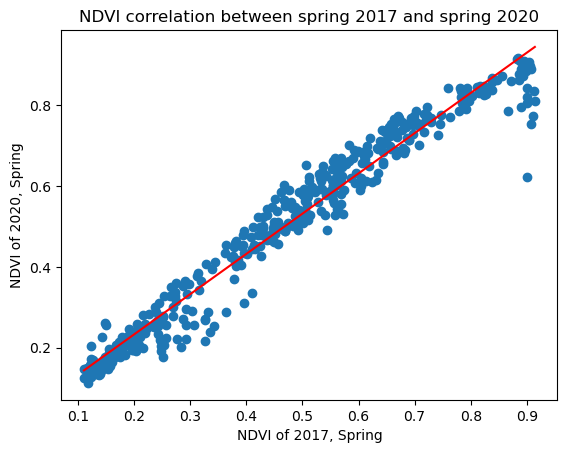

La corrélation entre la liste des coefficient NDVI de 2017 et la liste des coefficient NDVI de 2020 est : 0.98


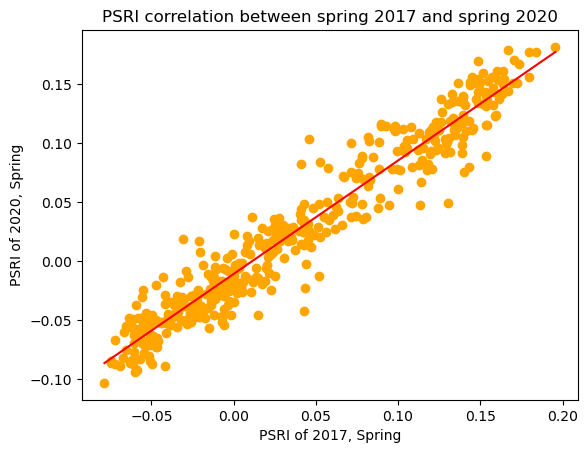

La corrélation entre la liste des coefficient PSRI de 2017 et la liste des coefficient PSRI de 2020 est : 0.967


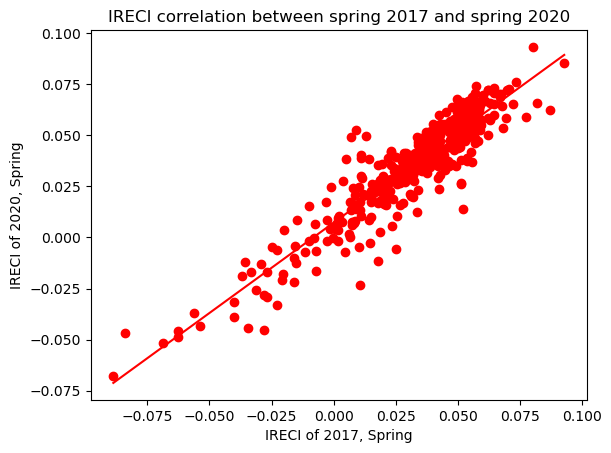

La corrélation entre la liste des coefficient IRECI de 2017 et la liste des coefficient IRECI de 2020 est : 0.924


In [26]:
ndvi_17_spring=[]
ndvi_20_spring=[]
PSRI_20_spring=[]
PSRI_17_spring=[]
IRECI_17_spring=[]
IRECI_20_spring=[]
for i in range(len(liste)):
    for j in range(len(bande_rouge_16_spring[i])):
        ndvi_17_spring.append( (bande_infrarouge_17_spring[i][j] - bande_rouge_17_spring[i][j]) / (bande_infrarouge_17_spring[i][j] + bande_rouge_17_spring[i][j]))
        ndvi_20_spring.append((bande_infrarouge_20_spring[i][j] - bande_rouge_20_spring[i][j]) / (bande_infrarouge_20_spring[i][j] + bande_rouge_20_spring[i][j]))
        PSRI_20_spring.append((bande_rouge_20_spring[i][j]-bande_verte_20_spring[i][j])/bande_infrarouge_20_spring[i][j])
        PSRI_17_spring.append((bande_rouge_17_spring[i][j]-bande_verte_17_spring[i][j])/bande_infrarouge_17_spring[i][j])
        IRECI_20_spring.append((bande_infrarouge_20_spring_ireci[i][j] - bande_rouge_20_spring[i][j])/(bande_RE1_20_spring[i][j]/bande_RE2_20_spring[i][j]))
        IRECI_17_spring.append((bande_infrarouge_17_spring_ireci[i][j] - bande_rouge_17_spring[i][j])/(bande_RE1_17_spring[i][j]/bande_RE2_17_spring[i][j]))

Corr_matrixNDVI=np.corrcoef(ndvi_17_spring,ndvi_20_spring)
Corr_matrixPSRI=np.corrcoef(PSRI_17_spring,PSRI_20_spring)
Corr_matrixIRECI=np.corrcoef(IRECI_17_spring,IRECI_20_spring)

ndvi_17_spring=np.array(ndvi_17_spring)
ndvi_20_spring=np.array(ndvi_20_spring)
coefficients_ndvi_17_20_spring = np.polyfit(ndvi_17_spring, ndvi_20_spring, 1)
x_reg_ndvi_17_20_spring = np.linspace(ndvi_17_spring.min(), ndvi_17_spring.max(), len(ndvi_17_spring))
y_reg_ndvi_17_20_spring = np.polyval(coefficients_ndvi_17_20_spring, x_reg_ndvi_17_20_spring)

plt.scatter(ndvi_17_spring,ndvi_20_spring)
plt.plot(x_reg_ndvi_17_20_spring, y_reg_ndvi_17_20_spring, color='r')
plt.xlabel('NDVI of 2017, Spring')
plt.ylabel('NDVI of 2020, Spring')
plt.title('NDVI correlation between spring 2017 and spring 2020')
plt.show()
CorrNDVI=round(Corr_matrixNDVI[0,1],3)
print("La corrélation entre la liste des coefficient NDVI de 2017 et la liste des coefficient NDVI de 2020 est :", CorrNDVI)

PSRI_17_spring=np.array(PSRI_17_spring)
PSRI_20_spring=np.array(PSRI_20_spring)
coefficients_psri_17_20_spring = np.polyfit(PSRI_17_spring, PSRI_20_spring, 1)
x_reg_PSRI_17_20_spring = np.linspace(PSRI_17_spring.min(), PSRI_17_spring.max(), len(PSRI_17_spring))
y_reg_PSRI_17_20_spring = np.polyval(coefficients_psri_17_20_spring, x_reg_PSRI_17_20_spring)

plt.scatter(PSRI_17_spring,PSRI_20_spring,c='orange')
plt.plot(x_reg_PSRI_17_20_spring, y_reg_PSRI_17_20_spring, color='r')
plt.xlabel('PSRI of 2017, Spring')
plt.ylabel('PSRI of 2020, Spring')
plt.title('PSRI correlation between spring 2017 and spring 2020')
plt.show()
CorrPSRI=round(Corr_matrixPSRI[0,1],3)
print("La corrélation entre la liste des coefficient PSRI de 2017 et la liste des coefficient PSRI de 2020 est :", CorrPSRI)

IRECI_17_spring=np.array(IRECI_17_spring)
IRECI_20_spring=np.array(IRECI_20_spring)
coefficients_IRECI_17_20_spring = np.polyfit(IRECI_17_spring, IRECI_20_spring, 1)
x_reg_IRECI_17_20_spring = np.linspace(IRECI_17_spring.min(), IRECI_17_spring.max(), len(IRECI_17_spring))
y_reg_IRECI_17_20_spring = np.polyval(coefficients_IRECI_17_20_spring, x_reg_IRECI_17_20_spring)

plt.scatter(IRECI_17_spring,IRECI_20_spring,c='red')
plt.plot(x_reg_IRECI_17_20_spring, y_reg_IRECI_17_20_spring, color='r')
plt.xlabel('IRECI of 2017, Spring')
plt.ylabel('IRECI of 2020, Spring')
plt.title('IRECI correlation between spring 2017 and spring 2020')
plt.show()
CorrIRECI=round(Corr_matrixIRECI[0,1],3)
print("La corrélation entre la liste des coefficient IRECI de 2017 et la liste des coefficient IRECI de 2020 est :", CorrIRECI)


## Fonctions d'affichages

In [40]:
def distance_point_droite(a, b, x0, y0):
    c=(y0+x0/a-b)/(a+1/a)
    distance = np.sqrt((c-x0)**2+((a*c+b)-(y0))**2 )
    return distance

def ordonnées_plus_et_moins(a,b,threshold):
    x1=-a*threshold/np.sqrt(1+a**2)
    y1=(-x1/a)+b
    b1=y1-a*x1
    x2=a*threshold/np.sqrt(1+a**2)
    y2=b-x2/a
    b2=y2-a*x2
    return (b1,b2)

#### Fonctions affichages pour le printemps 2016

In [41]:
def affichage_ndvi_16_spring(a,b,threshold):
    distances_ndvi=[]
    for i in range (len(ndvi_16_spring)):
        distances_ndvi.append(distance_point_droite(a,b,ndvi_16_spring[i],ndvi_20_spring[i]))        
    x_threshold_plus=np.linspace(ndvi_16_spring.min(), ndvi_16_spring.max(), len(ndvi_16_spring))
    y_threshold_plus= a* x_threshold_plus+ordonnées_plus_et_moins(a,b,threshold)[0]
    x_threshold_moins=np.linspace(ndvi_16_spring.min(), ndvi_16_spring.max(), len(ndvi_16_spring))
    y_threshold_moins= a*x_threshold_plus+ordonnées_plus_et_moins(a,b,threshold)[1]
    ndvi_in_x=[]
    ndvi_out_x=[]
    ndvi_in_y=[]
    ndvi_out_y=[]
    #x_reg_ndvi
    for i in range(len(distances_ndvi)):
        if distances_ndvi[i]>threshold:
            ndvi_out_x.append(ndvi_16_spring[i])
            ndvi_out_y.append(ndvi_20_spring[i])
        else:
            ndvi_in_x.append(ndvi_16_spring[i])
            ndvi_in_y.append(ndvi_20_spring[i])
    return(ndvi_in_x,ndvi_out_x,ndvi_in_y,ndvi_out_y,x_threshold_plus,y_threshold_plus,x_threshold_moins,y_threshold_moins,distances_ndvi)

In [42]:
def affichage_psri_16_spring(a,b,threshold):
    distances_psri=[]
    for i in range (len(PSRI_16_spring)):
        distances_psri.append(distance_point_droite(a,b,PSRI_16_spring[i],PSRI_20_spring[i]))        
    x2_threshold_plus=np.linspace(PSRI_16_spring.min(), PSRI_16_spring.max(), len(PSRI_16_spring))
    y2_threshold_plus= a* x2_threshold_plus+ordonnées_plus_et_moins(a,b,threshold)[0]
    x2_threshold_moins=np.linspace(PSRI_16_spring.min(), PSRI_16_spring.max(), len(PSRI_16_spring))
    y2_threshold_moins= a*x2_threshold_plus+ordonnées_plus_et_moins(a,b,threshold)[1]
    psri_in_x=[]
    psri_out_x=[]
    psri_in_y=[]
    psri_out_y=[]
    for i in range(len(distances_psri)):
        if distances_psri[i]>threshold:
            psri_out_x.append(PSRI_16_spring[i])
            psri_out_y.append(PSRI_20_spring[i])
        else:
            psri_in_x.append(PSRI_16_spring[i])
            psri_in_y.append(PSRI_20_spring[i])
    return(psri_in_x,psri_out_x,psri_in_y,psri_out_y,x2_threshold_plus,y2_threshold_plus,x2_threshold_moins,y2_threshold_moins,distances_psri)

In [43]:
def affichage_IRECI_16_spring(a,b,threshold):
    distances_IRECI=[]
    for i in range (len(IRECI_16_spring)):
        distances_IRECI.append(distance_point_droite(a,b,IRECI_16_spring[i],IRECI_20_spring[i]))        
    x_threshold_plus=np.linspace(IRECI_16_spring.min(), IRECI_16_spring.max(), len(IRECI_16_spring))
    y_threshold_plus= a* x_threshold_plus+ordonnées_plus_et_moins(a,b,threshold)[0]
    x_threshold_moins=np.linspace(IRECI_16_spring.min(), IRECI_16_spring.max(), len(IRECI_16_spring))
    y_threshold_moins= a*x_threshold_plus+ordonnées_plus_et_moins(a,b,threshold)[1]
    IRECI_in_x=[]
    IRECI_out_x=[]
    IRECI_in_y=[]
    IRECI_out_y=[]
    #x_reg_IRECI
    for i in range(len(distances_IRECI)):
        if distances_IRECI[i]>threshold:
            IRECI_out_x.append(IRECI_16_spring[i])
            IRECI_out_y.append(IRECI_20_spring[i])
        else:
            IRECI_in_x.append(IRECI_16_spring[i])
            IRECI_in_y.append(IRECI_20_spring[i])
    return(IRECI_in_x,IRECI_out_x,IRECI_in_y,IRECI_out_y,x_threshold_plus,y_threshold_plus,x_threshold_moins,y_threshold_moins,distances_IRECI)

#### Fonctions affichages pour l'été 2016

In [44]:
def affichage_ndvi_16_summer(a,b,threshold):
    distances_ndvi=[]
    for i in range(len(ndvi_16_summer)):
        distances_ndvi.append(distance_point_droite(a,b,ndvi_16_summer[i],ndvi_20_summer[i]))        
    x_threshold_plus=np.linspace(ndvi_16_summer.min(), ndvi_16_summer.max(), len(ndvi_16_summer))
    y_threshold_plus= a* x_threshold_plus+ordonnées_plus_et_moins(a,b,threshold)[0]
    x_threshold_moins=np.linspace(ndvi_16_summer.min(), ndvi_16_summer.max(), len(ndvi_16_summer))
    y_threshold_moins= a*x_threshold_plus+ordonnées_plus_et_moins(a,b,threshold)[1]
    ndvi_in_x=[]
    ndvi_out_x=[]
    ndvi_in_y=[]
    ndvi_out_y=[]
    #x_reg_ndvi
    for i in range(len(distances_ndvi)):
        if distances_ndvi[i]>threshold:
            ndvi_out_x.append(ndvi_16_summer[i])
            ndvi_out_y.append(ndvi_20_summer[i])
        else:
            ndvi_in_x.append(ndvi_16_summer[i])
            ndvi_in_y.append(ndvi_20_summer[i])
    return(ndvi_in_x,ndvi_out_x,ndvi_in_y,ndvi_out_y,x_threshold_plus,y_threshold_plus,x_threshold_moins,y_threshold_moins,distances_ndvi)

In [45]:
def affichage_psri_16_summer(a,b,threshold):
    distances_psri=[]
    for i in range (len(PSRI_16_summer)):
        distances_psri.append(distance_point_droite(a,b,PSRI_16_summer[i],PSRI_20_summer[i]))        
    x2_threshold_plus=np.linspace(PSRI_16_summer.min(), PSRI_16_summer.max(), len(PSRI_16_summer))
    y2_threshold_plus= a* x2_threshold_plus+ordonnées_plus_et_moins(a,b,threshold)[0]
    x2_threshold_moins=np.linspace(PSRI_16_summer.min(), PSRI_16_summer.max(), len(PSRI_16_summer))
    y2_threshold_moins= a*x2_threshold_plus+ordonnées_plus_et_moins(a,b,threshold)[1]
    psri_in_x=[]
    psri_out_x=[]
    psri_in_y=[]
    psri_out_y=[]
    for i in range(len(distances_psri)):
        if distances_psri[i]>threshold:
            psri_out_x.append(PSRI_16_summer[i])
            psri_out_y.append(PSRI_20_summer[i])
        else:
            psri_in_x.append(PSRI_16_summer[i])
            psri_in_y.append(PSRI_20_summer[i])
    return(psri_in_x,psri_out_x,psri_in_y,psri_out_y,x2_threshold_plus,y2_threshold_plus,x2_threshold_moins,y2_threshold_moins,distances_psri)

In [46]:
def affichage_IRECI_16_summer(a,b,threshold):
    distances_IRECI=[]
    for i in range (len(IRECI_16_summer)):
        distances_IRECI.append(distance_point_droite(a,b,IRECI_16_summer[i],IRECI_20_summer[i]))        
    x_threshold_plus=np.linspace(IRECI_16_summer.min(), IRECI_16_summer.max(), len(IRECI_16_summer))
    y_threshold_plus= a* x_threshold_plus+ordonnées_plus_et_moins(a,b,threshold)[0]
    x_threshold_moins=np.linspace(IRECI_16_summer.min(), IRECI_16_summer.max(), len(IRECI_16_summer))
    y_threshold_moins= a*x_threshold_plus+ordonnées_plus_et_moins(a,b,threshold)[1]
    IRECI_in_x=[]
    IRECI_out_x=[]
    IRECI_in_y=[]
    IRECI_out_y=[]
    #x_reg_IRECI
    for i in range(len(distances_IRECI)):
        if distances_IRECI[i]>threshold:
            IRECI_out_x.append(IRECI_16_summer[i])
            IRECI_out_y.append(IRECI_20_summer[i])
        else:
            IRECI_in_x.append(IRECI_16_summer[i])
            IRECI_in_y.append(IRECI_20_summer[i])
    return(IRECI_in_x,IRECI_out_x,IRECI_in_y,IRECI_out_y,x_threshold_plus,y_threshold_plus,x_threshold_moins,y_threshold_moins,distances_IRECI)

#### Fonctions affichages pour automne 2016

In [47]:
def affichage_ndvi_16_autumn(a,b,threshold):
    distances_ndvi=[]
    for i in range(len(ndvi_16_autumn)):
        distances_ndvi.append(distance_point_droite(a,b,ndvi_16_autumn[i],ndvi_20_autumn[i]))        
    x_threshold_plus=np.linspace(ndvi_16_autumn.min(), ndvi_16_autumn.max(), len(ndvi_16_autumn))
    y_threshold_plus= a* x_threshold_plus+ordonnées_plus_et_moins(a,b,threshold)[0]
    x_threshold_moins=np.linspace(ndvi_16_autumn.min(), ndvi_16_autumn.max(), len(ndvi_16_autumn))
    y_threshold_moins= a*x_threshold_plus+ordonnées_plus_et_moins(a,b,threshold)[1]
    ndvi_in_x=[]
    ndvi_out_x=[]
    ndvi_in_y=[]
    ndvi_out_y=[]
    #x_reg_ndvi
    for i in range(len(distances_ndvi)):
        if distances_ndvi[i]>threshold:
            ndvi_out_x.append(ndvi_16_autumn[i])
            ndvi_out_y.append(ndvi_20_autumn[i])
        else:
            ndvi_in_x.append(ndvi_16_autumn[i])
            ndvi_in_y.append(ndvi_20_autumn[i])
    return(ndvi_in_x,ndvi_out_x,ndvi_in_y,ndvi_out_y,x_threshold_plus,y_threshold_plus,x_threshold_moins,y_threshold_moins,distances_ndvi)

In [48]:
def affichage_psri_16_autumn(a,b,threshold):
    distances_psri=[]
    for i in range (len(PSRI_16_autumn)):
        distances_psri.append(distance_point_droite(a,b,PSRI_16_autumn[i],PSRI_20_autumn[i]))        
    x2_threshold_plus=np.linspace(PSRI_16_autumn.min(), PSRI_16_autumn.max(), len(PSRI_16_autumn))
    y2_threshold_plus= a* x2_threshold_plus+ordonnées_plus_et_moins(a,b,threshold)[0]
    x2_threshold_moins=np.linspace(PSRI_16_autumn.min(), PSRI_16_autumn.max(), len(PSRI_16_autumn))
    y2_threshold_moins= a*x2_threshold_plus+ordonnées_plus_et_moins(a,b,threshold)[1]
    psri_in_x=[]
    psri_out_x=[]
    psri_in_y=[]
    psri_out_y=[]
    for i in range(len(distances_psri)):
        if distances_psri[i]>threshold:
            psri_out_x.append(PSRI_16_autumn[i])
            psri_out_y.append(PSRI_20_autumn[i])
        else:
            psri_in_x.append(PSRI_16_autumn[i])
            psri_in_y.append(PSRI_20_autumn[i])
    return(psri_in_x,psri_out_x,psri_in_y,psri_out_y,x2_threshold_plus,y2_threshold_plus,x2_threshold_moins,y2_threshold_moins,distances_psri)

In [49]:
def affichage_IRECI_16_autumn(a,b,threshold):
    distances_IRECI=[]
    for i in range (len(IRECI_16_autumn)):
        distances_IRECI.append(distance_point_droite(a,b,IRECI_16_autumn[i],IRECI_20_autumn[i]))        
    x_threshold_plus=np.linspace(IRECI_16_autumn.min(), IRECI_16_autumn.max(), len(IRECI_16_autumn))
    y_threshold_plus= a* x_threshold_plus+ordonnées_plus_et_moins(a,b,threshold)[0]
    x_threshold_moins=np.linspace(IRECI_16_autumn.min(), IRECI_16_autumn.max(), len(IRECI_16_autumn))
    y_threshold_moins= a*x_threshold_plus+ordonnées_plus_et_moins(a,b,threshold)[1]
    IRECI_in_x=[]
    IRECI_out_x=[]
    IRECI_in_y=[]
    IRECI_out_y=[]
    #x_reg_IRECI
    for i in range(len(distances_IRECI)):
        if distances_IRECI[i]>threshold:
            IRECI_out_x.append(IRECI_16_autumn[i])
            IRECI_out_y.append(IRECI_20_autumn[i])
        else:
            IRECI_in_x.append(IRECI_16_autumn[i])
            IRECI_in_y.append(IRECI_20_autumn[i])
    return(IRECI_in_x,IRECI_out_x,IRECI_in_y,IRECI_out_y,x_threshold_plus,y_threshold_plus,x_threshold_moins,y_threshold_moins,distances_IRECI)

#### Fonctions affichages pour printemps 2017

In [50]:
def affichage_ndvi_17_spring(a,b,threshold):
    distances_ndvi=[]
    for i in range (len(ndvi_17_spring)):
        distances_ndvi.append(distance_point_droite(a,b,ndvi_17_spring[i],ndvi_20_spring[i]))        
    x_threshold_plus=np.linspace(ndvi_17_spring.min(), ndvi_17_spring.max(), len(ndvi_17_spring))
    y_threshold_plus= a* x_threshold_plus+ordonnées_plus_et_moins(a,b,threshold)[0]
    x_threshold_moins=np.linspace(ndvi_17_spring.min(), ndvi_17_spring.max(), len(ndvi_17_spring))
    y_threshold_moins= a*x_threshold_plus+ordonnées_plus_et_moins(a,b,threshold)[1]
    ndvi_in_x=[]
    ndvi_out_x=[]
    ndvi_in_y=[]
    ndvi_out_y=[]
    #x_reg_ndvi
    for i in range(len(distances_ndvi)):
        if distances_ndvi[i]>threshold:
            ndvi_out_x.append(ndvi_17_spring[i])
            ndvi_out_y.append(ndvi_20_spring[i])
        else:
            ndvi_in_x.append(ndvi_17_spring[i])
            ndvi_in_y.append(ndvi_20_spring[i])
    return(ndvi_in_x,ndvi_out_x,ndvi_in_y,ndvi_out_y,x_threshold_plus,y_threshold_plus,x_threshold_moins,y_threshold_moins,distances_ndvi)

In [51]:
def affichage_psri_17_spring(a,b,threshold):
    distances_psri=[]
    for i in range (len(PSRI_17_spring)):
        distances_psri.append(distance_point_droite(a,b,PSRI_17_spring[i],PSRI_20_spring[i]))        
    x2_threshold_plus=np.linspace(PSRI_17_spring.min(), PSRI_17_spring.max(), len(PSRI_17_spring))
    y2_threshold_plus= a* x2_threshold_plus+ordonnées_plus_et_moins(a,b,threshold)[0]
    x2_threshold_moins=np.linspace(PSRI_17_spring.min(), PSRI_17_spring.max(), len(PSRI_17_spring))
    y2_threshold_moins= a*x2_threshold_plus+ordonnées_plus_et_moins(a,b,threshold)[1]
    psri_in_x=[]
    psri_out_x=[]
    psri_in_y=[]
    psri_out_y=[]
    for i in range(len(distances_psri)):
        if distances_psri[i]>threshold:
            psri_out_x.append(PSRI_17_spring[i])
            psri_out_y.append(PSRI_20_spring[i])
        else:
            psri_in_x.append(PSRI_17_spring[i])
            psri_in_y.append(PSRI_20_spring[i])
    return(psri_in_x,psri_out_x,psri_in_y,psri_out_y,x2_threshold_plus,y2_threshold_plus,x2_threshold_moins,y2_threshold_moins,distances_psri)

In [52]:
a0, b0 = coefficients_ndvi_16_20_spring
a1, b1 = coefficients_psri_16_20_spring
a2, b2 = coefficients_ndvi_16_20_summer
a3, b3 = coefficients_psri_16_20_summer
a4, b4 = coefficients_ndvi_17_20_spring
a5, b5 = coefficients_psri_17_20_spring
a6, b6 = coefficients_ndvi_16_20_autumn
a7, b7 = coefficients_psri_16_20_autumn
a8, b8 = coefficients_IRECI_16_20_spring
a9, b9 = coefficients_IRECI_16_20_summer
a10, b10 = coefficients_IRECI_16_20_autumn

## Affichages avec thresholds
### NDVI spring 2016 - 2020

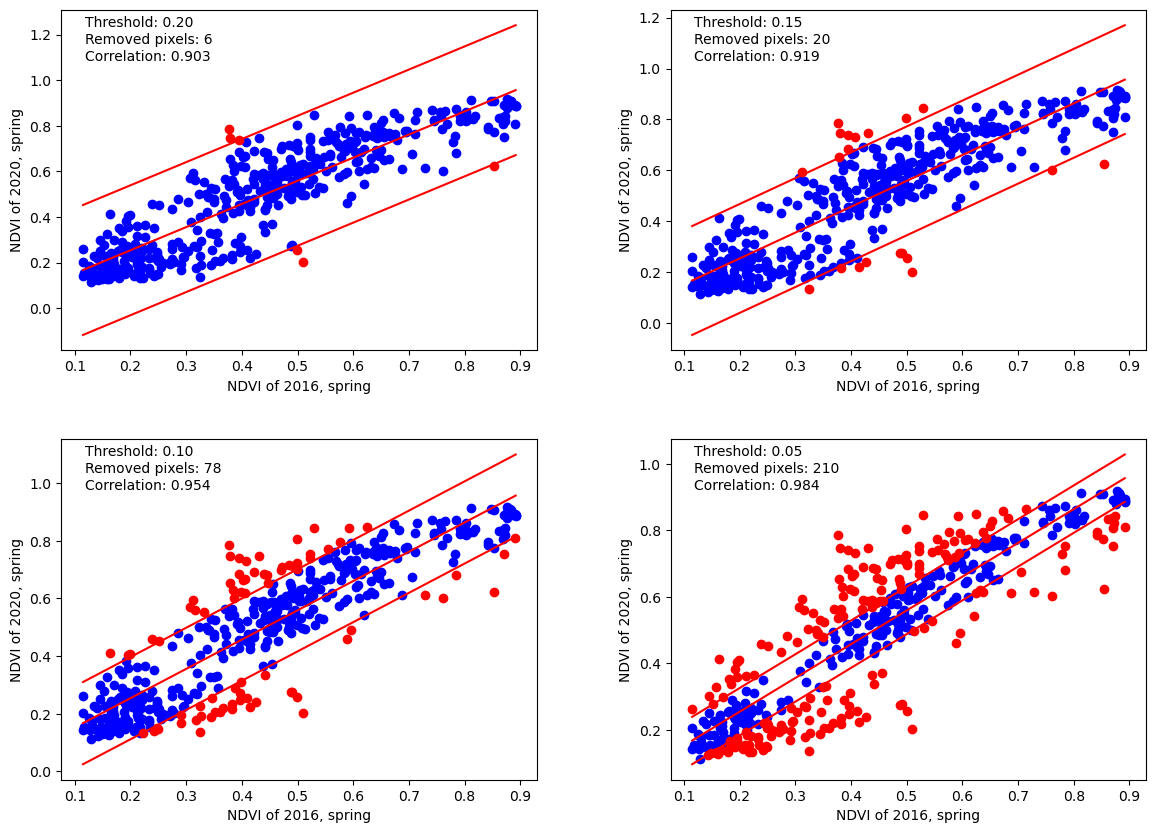

In [53]:
print("")
thresholds = [0.20, 0.15, 0.10, 0.05]
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
for i, threshold in enumerate(thresholds):
    data = affichage_ndvi_16_spring(a0, b0, threshold)
    Corr_matrixNDVI = np.corrcoef(data[0], data[2])
    CorrNDVI = round(Corr_matrixNDVI[0, 1], 3)
    ax = axs[i // 2, i % 2]
    ax.scatter(data[0], data[2], color='b')
    ax.scatter(data[1], data[3], color='r')
    ax.plot(x_reg_ndvi_16_20_spring, y_reg_ndvi_16_20_spring, color='r')
    ax.plot(data[4], data[5], color='r')
    ax.plot(data[6], data[7], color='r')
    ax.set_xlabel('NDVI of 2016, spring')
    ax.set_ylabel('NDVI of 2020, spring')
    ax.text(0.05, 0.95, 'Threshold: {:.2f}'.format(threshold), transform=ax.transAxes)
    ax.text(0.05, 0.90, 'Removed pixels: {}'.format(len(data[1])), transform=ax.transAxes)
    ax.text(0.05, 0.85, 'Correlation: {}'.format(CorrNDVI), transform=ax.transAxes)

plt.subplots_adjust(hspace=0.26, wspace=0.28)
plt.show()

### NDVI summer 2016 - 2020

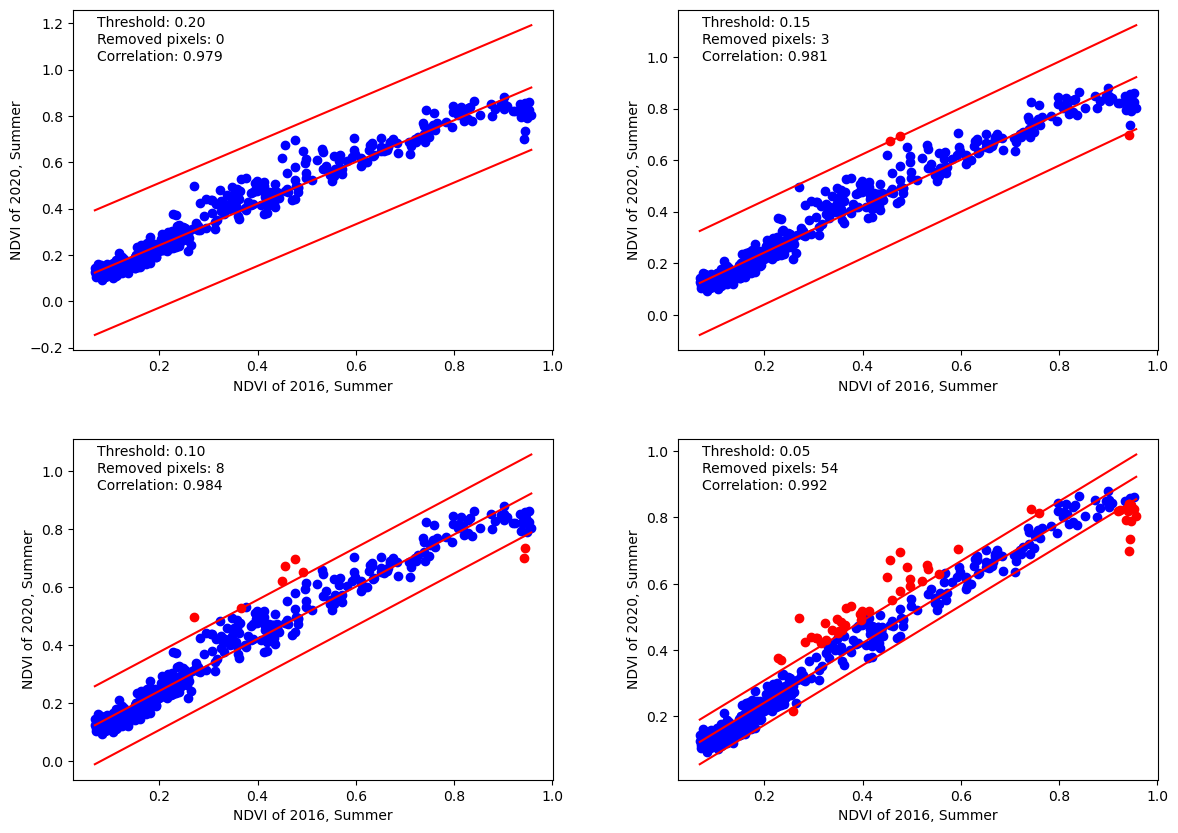

In [57]:
print(" ")
thresholds = [0.20, 0.15, 0.10, 0.05]
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
for i, threshold in enumerate(thresholds):
    data = affichage_ndvi_16_summer(a2, b2, threshold)
    Corr_matrixNDVI_2 = np.corrcoef(data[0], data[2])
    CorrNDVI_2 = round(Corr_matrixNDVI_2[0, 1], 3)
    ax = axs[i // 2, i % 2]
    ax.scatter(data[0], data[2], color='b')
    ax.scatter(data[1], data[3], color='r')
    ax.plot(x_reg_ndvi_16_20_summer, y_reg_ndvi_16_20_summer, color='r')
    ax.plot(data[4], data[5], color='r')
    ax.plot(data[6], data[7], color='r')
    ax.set_xlabel('NDVI of 2016, Summer')
    ax.set_ylabel('NDVI of 2020, Summer')
    ax.text(0.05, 0.95, 'Threshold: {:.2f}'.format(threshold), transform=ax.transAxes)
    ax.text(0.05, 0.90, 'Removed pixels: {}'.format(len(data[1])), transform=ax.transAxes)
    ax.text(0.05, 0.85, 'Correlation: {}'.format(CorrNDVI_2), transform=ax.transAxes)

plt.subplots_adjust(hspace=0.26, wspace=0.26)
plt.show()

### NDVI automn 2016 - 2020

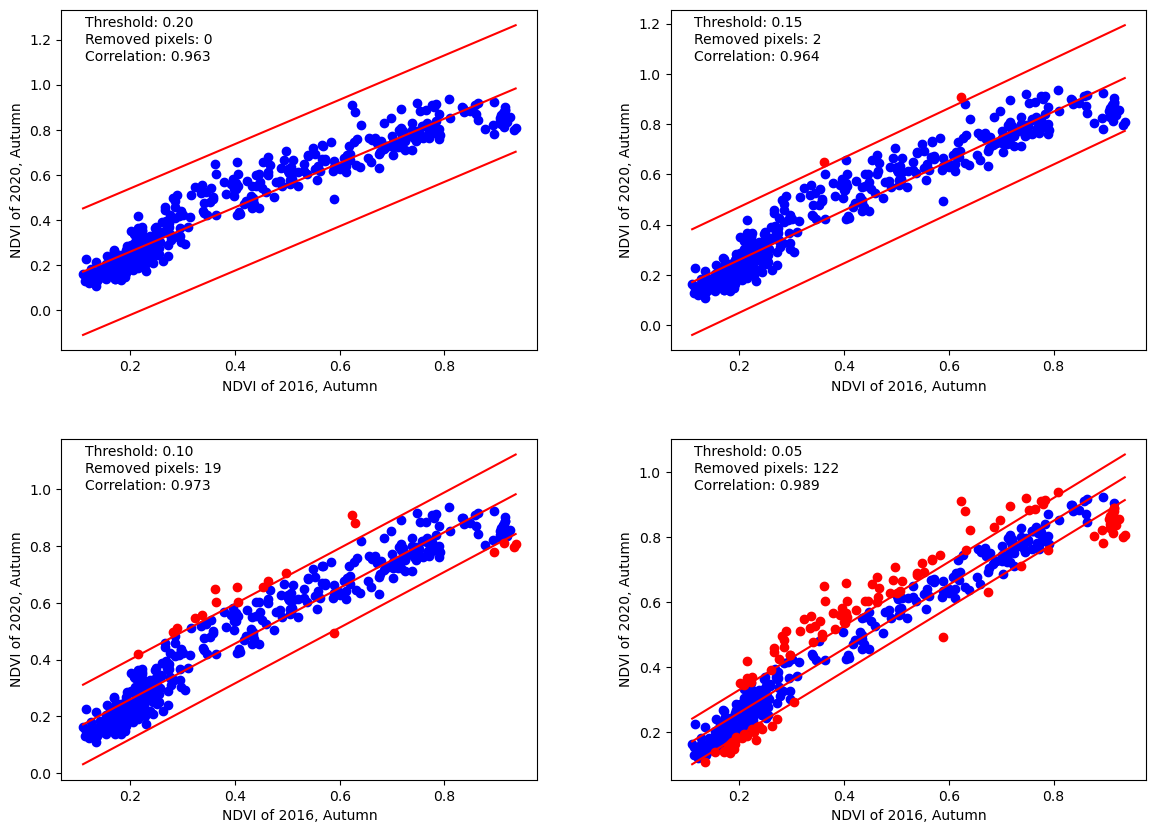

In [58]:
print("")
thresholds = [0.20, 0.15, 0.10, 0.05]
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
for i, threshold in enumerate(thresholds):
    data = affichage_ndvi_16_autumn(a6, b6, threshold)
    Corr_matrixNDVI = np.corrcoef(data[0], data[2])
    CorrNDVI = round(Corr_matrixNDVI[0, 1], 3)
    ax = axs[i // 2, i % 2]
    ax.scatter(data[0], data[2], color='b')
    ax.scatter(data[1], data[3], color='r')
    ax.plot(x_reg_ndvi_16_20_autumn, y_reg_ndvi_16_20_autumn, color='r')
    ax.plot(data[4], data[5], color='r')
    ax.plot(data[6], data[7], color='r')
    ax.set_xlabel('NDVI of 2016, Autumn')
    ax.set_ylabel('NDVI of 2020, Autumn')
    ax.text(0.05, 0.95, 'Threshold: {:.2f}'.format(threshold), transform=ax.transAxes)
    ax.text(0.05, 0.90, 'Removed pixels: {}'.format(len(data[1])), transform=ax.transAxes)
    ax.text(0.05, 0.85, 'Correlation: {}'.format(CorrNDVI), transform=ax.transAxes)

plt.subplots_adjust(hspace=0.26, wspace=0.28)
plt.show()

### PSRI spring 2016 - 2020

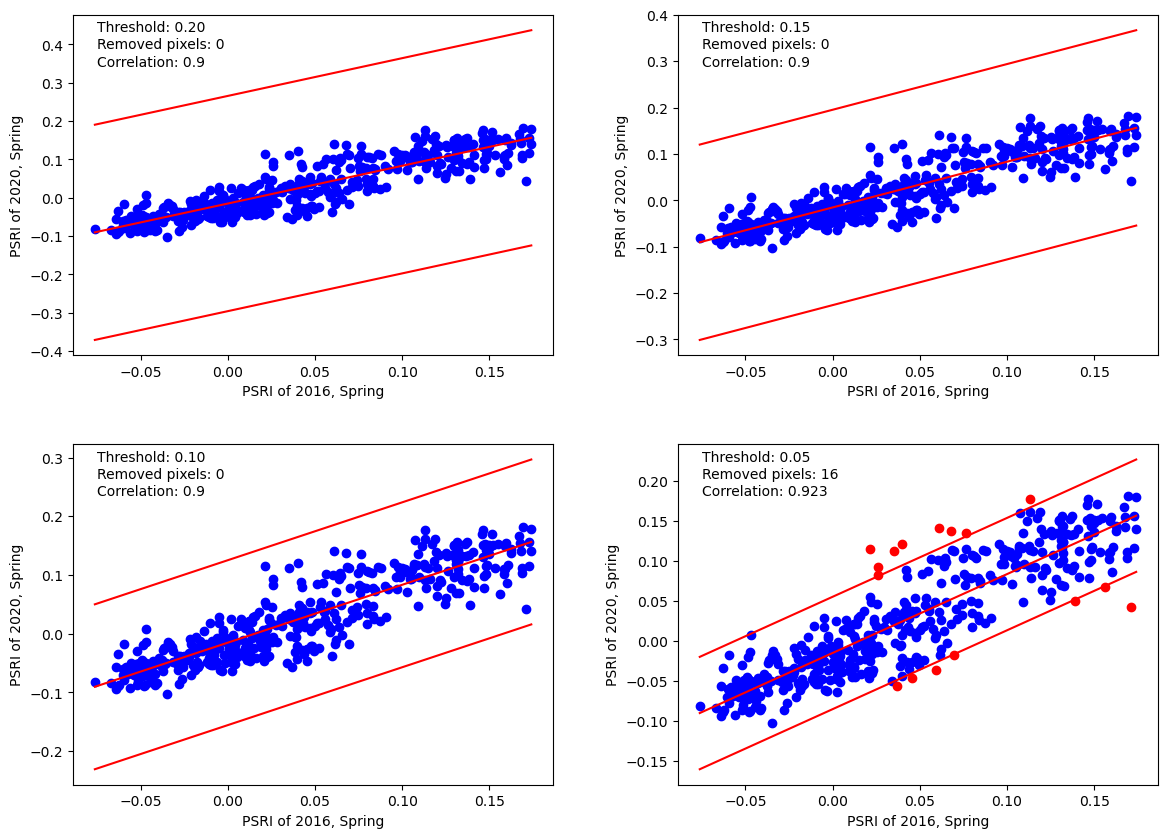

In [59]:
print(" ")
thresholds = [0.20, 0.15, 0.10, 0.05]
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
for i, threshold in enumerate(thresholds):
    data = affichage_psri_16_spring(a1, b1, threshold)
    Corr_matrixPSRI = np.corrcoef(data[0], data[2])
    CorrPSRI = round(Corr_matrixPSRI[0, 1], 3)
    ax = axs[i // 2, i % 2]
    ax.scatter(data[0], data[2], color='b')
    ax.scatter(data[1], data[3], color='r')
    ax.plot(x_reg_PSRI_16_20_spring, y_reg_PSRI_16_20_spring, color='r')
    ax.plot(data[4], data[5], color='r')
    ax.plot(data[6], data[7], color='r')
    ax.set_xlabel('PSRI of 2016, Spring')
    ax.set_ylabel('PSRI of 2020, Spring')
    ax.text(0.05, 0.95, 'Threshold: {:.2f}'.format(threshold), transform=ax.transAxes)
    ax.text(0.05, 0.90, 'Removed pixels: {}'.format(len(data[1])), transform=ax.transAxes)
    ax.text(0.05, 0.85, 'Correlation: {}'.format(CorrPSRI), transform=ax.transAxes)

plt.subplots_adjust(hspace=0.26, wspace=0.26)
plt.show()

### PSRI summer 2016 - 2020

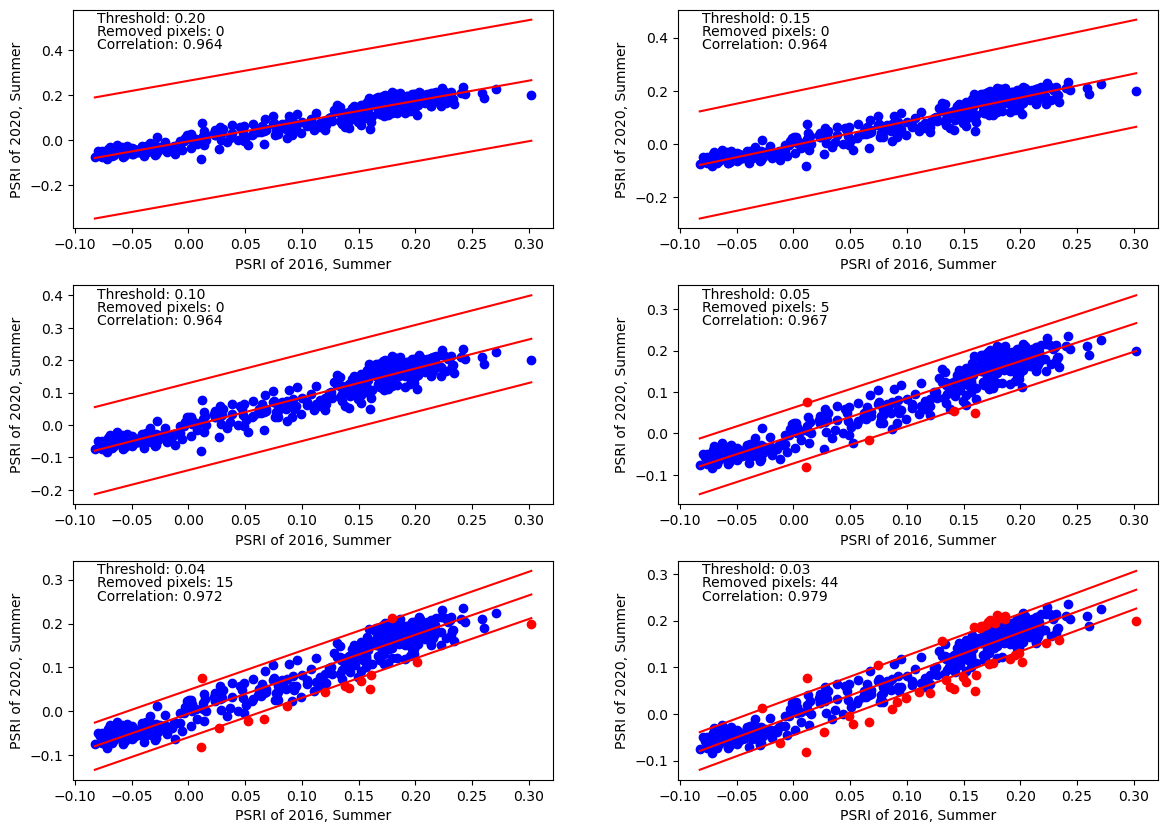

In [63]:
print(" ")
thresholds = [0.20, 0.15, 0.10, 0.05, 0.04, 0.03]
fig, axs = plt.subplots(3, 2, figsize=(14, 10))
for i, threshold in enumerate(thresholds):
    data = affichage_psri_16_summer(a3, b3, threshold)
    Corr_matrixPSRI = np.corrcoef(data[0], data[2])
    CorrPSRI = round(Corr_matrixPSRI[0, 1], 3)
    ax = axs[i // 2, i % 2]
    ax.scatter(data[0], data[2], color='b')
    ax.scatter(data[1], data[3], color='r')
    ax.plot(x_reg_PSRI_16_20_summer, y_reg_PSRI_16_20_summer, color='r')
    ax.plot(data[4], data[5], color='r')
    ax.plot(data[6], data[7], color='r')
    ax.set_xlabel('PSRI of 2016, Summer')
    ax.set_ylabel('PSRI of 2020, Summer')
    ax.text(0.05, 0.94, 'Threshold: {:.2f}'.format(threshold), transform=ax.transAxes)
    ax.text(0.05, 0.88, 'Removed pixels: {}'.format(len(data[1])), transform=ax.transAxes)
    ax.text(0.05, 0.82, 'Correlation: {}'.format(CorrPSRI), transform=ax.transAxes)

plt.subplots_adjust(hspace=0.26, wspace=0.26)
plt.show()

### PSRI automn 2016 - 2020

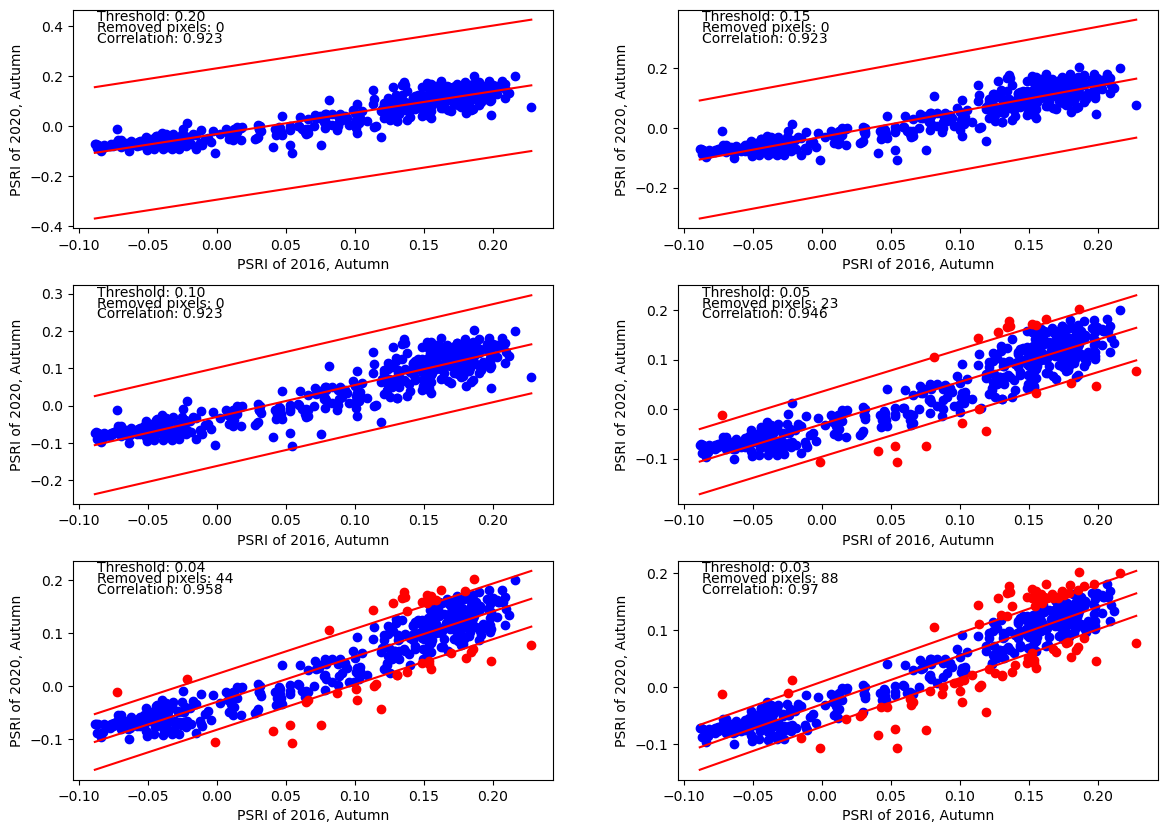

In [65]:
print(" ")
thresholds = [0.20, 0.15, 0.10, 0.05, 0.04, 0.03]
fig, axs = plt.subplots(3, 2, figsize=(14, 10))
for i, threshold in enumerate(thresholds):
    data = affichage_psri_16_autumn(a7, b7, threshold)
    Corr_matrixPSRI = np.corrcoef(data[0], data[2])
    CorrPSRI = round(Corr_matrixPSRI[0, 1], 3)
    ax = axs[i // 2, i % 2]
    ax.scatter(data[0], data[2], color='b')
    ax.scatter(data[1], data[3], color='r')
    ax.plot(x_reg_PSRI_16_20_autumn, y_reg_PSRI_16_20_autumn, color='r')
    ax.plot(data[4], data[5], color='r')
    ax.plot(data[6], data[7], color='r')
    ax.set_xlabel('PSRI of 2016, Autumn')
    ax.set_ylabel('PSRI of 2020, Autumn')
    ax.text(0.05, 0.95, 'Threshold: {:.2f}'.format(threshold), transform=ax.transAxes)
    ax.text(0.05, 0.90, 'Removed pixels: {}'.format(len(data[1])), transform=ax.transAxes)
    ax.text(0.05, 0.85, 'Correlation: {}'.format(CorrPSRI), transform=ax.transAxes)

plt.subplots_adjust(hspace=0.26, wspace=0.26)
plt.show()

### IRECI spring 2016 - 2020

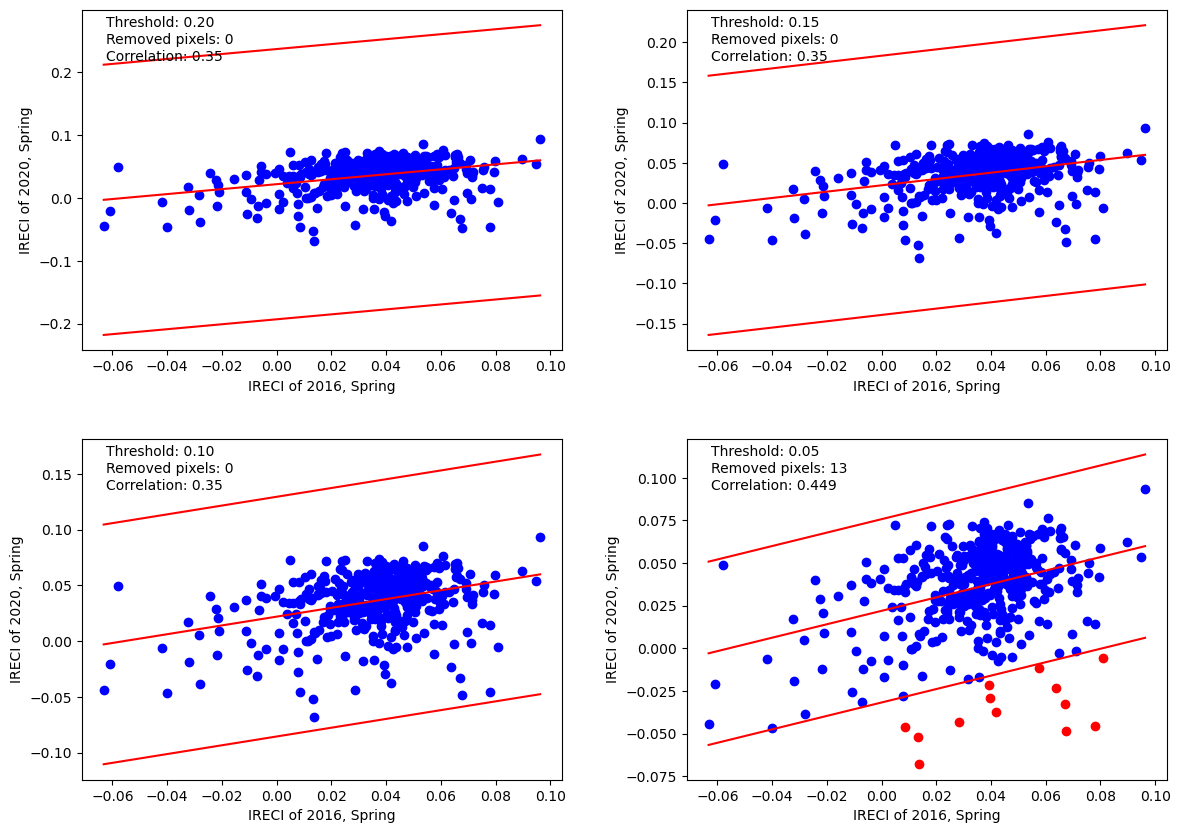

In [66]:
print(" ")
thresholds = [0.20, 0.15, 0.10, 0.05]
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
for i, threshold in enumerate(thresholds):
    data = affichage_IRECI_16_spring(a8, b8, threshold)
    Corr_matrixIRECI = np.corrcoef(data[0], data[2])
    CorrIRECI = round(Corr_matrixIRECI[0, 1], 3)
    ax = axs[i // 2, i % 2]
    ax.scatter(data[0], data[2], color='b')
    ax.scatter(data[1], data[3], color='r')
    ax.plot(x_reg_IRECI_16_20_spring, y_reg_IRECI_16_20_spring, color='r')
    ax.plot(data[4], data[5], color='r')
    ax.plot(data[6], data[7], color='r')
    ax.set_xlabel('IRECI of 2016, Spring')
    ax.set_ylabel('IRECI of 2020, Spring')
    ax.text(0.05, 0.95, 'Threshold: {:.2f}'.format(threshold), transform=ax.transAxes)
    ax.text(0.05, 0.90, 'Removed pixels: {}'.format(len(data[1])), transform=ax.transAxes)
    ax.text(0.05, 0.85, 'Correlation: {}'.format(CorrIRECI), transform=ax.transAxes)

plt.subplots_adjust(hspace=0.26, wspace=0.26)
plt.show()

### IRECI summer 2016 - 2020

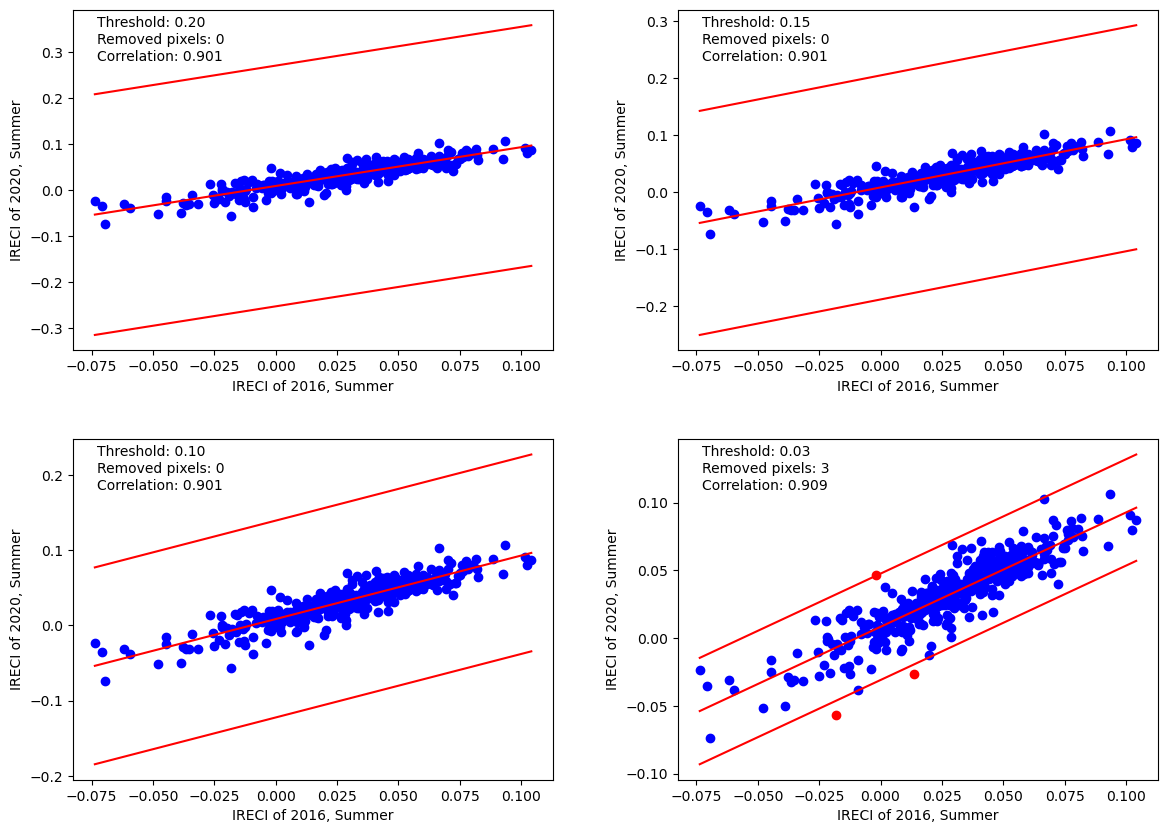

In [67]:
print(" ")
thresholds = [0.20, 0.15, 0.10, 0.03]
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
for i, threshold in enumerate(thresholds):
    data = affichage_IRECI_16_summer(a9, b9, threshold)
    Corr_matrixIRECI = np.corrcoef(data[0], data[2])
    CorrIRECI = round(Corr_matrixIRECI[0, 1], 3)
    ax = axs[i // 2, i % 2]
    ax.scatter(data[0], data[2], color='b')
    ax.scatter(data[1], data[3], color='r')
    ax.plot(x_reg_IRECI_16_20_summer, y_reg_IRECI_16_20_summer, color='r')
    ax.plot(data[4], data[5], color='r')
    ax.plot(data[6], data[7], color='r')
    ax.set_xlabel('IRECI of 2016, Summer')
    ax.set_ylabel('IRECI of 2020, Summer')
    ax.text(0.05, 0.95, 'Threshold: {:.2f}'.format(threshold), transform=ax.transAxes)
    ax.text(0.05, 0.90, 'Removed pixels: {}'.format(len(data[1])), transform=ax.transAxes)
    ax.text(0.05, 0.85, 'Correlation: {}'.format(CorrIRECI), transform=ax.transAxes)

plt.subplots_adjust(hspace=0.26, wspace=0.26)
plt.show()

### IRECI automn 2016 - 2020

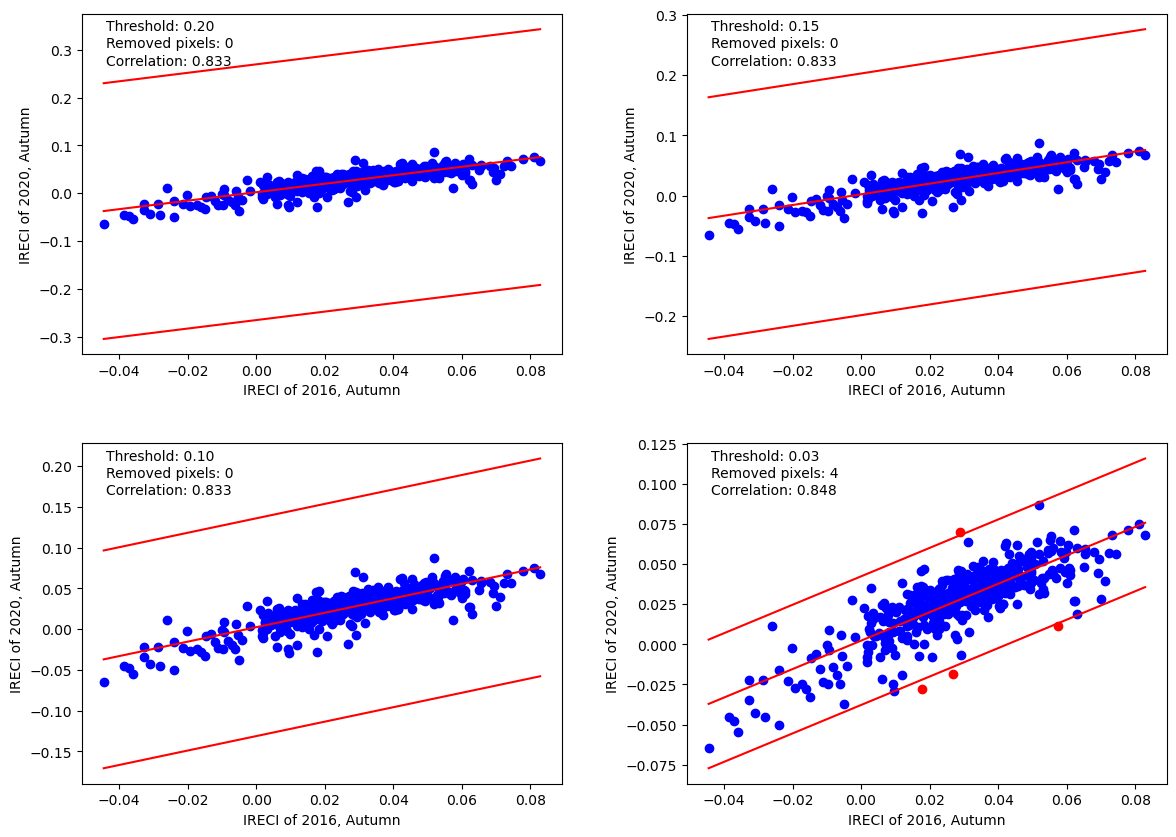

In [69]:
print(" ")
thresholds = [0.20, 0.15, 0.10, 0.03]
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
for i, threshold in enumerate(thresholds):
    data = affichage_IRECI_16_autumn(a10, b10, threshold)
    Corr_matrixIRECI = np.corrcoef(data[0], data[2])
    CorrIRECI = round(Corr_matrixIRECI[0, 1], 3)
    ax = axs[i // 2, i % 2]
    ax.scatter(data[0], data[2], color='b')
    ax.scatter(data[1], data[3], color='r')
    ax.plot(x_reg_IRECI_16_20_autumn, y_reg_IRECI_16_20_autumn, color='r')
    ax.plot(data[4], data[5], color='r')
    ax.plot(data[6], data[7], color='r')
    ax.set_xlabel('IRECI of 2016, Autumn')
    ax.set_ylabel('IRECI of 2020, Autumn')
    ax.text(0.05, 0.95, 'Threshold: {:.2f}'.format(threshold), transform=ax.transAxes)
    ax.text(0.05, 0.90, 'Removed pixels: {}'.format(len(data[1])), transform=ax.transAxes)
    ax.text(0.05, 0.85, 'Correlation: {}'.format(CorrIRECI), transform=ax.transAxes)

plt.subplots_adjust(hspace=0.26, wspace=0.26)
plt.show()

### NDVI spring 2017 - 2020

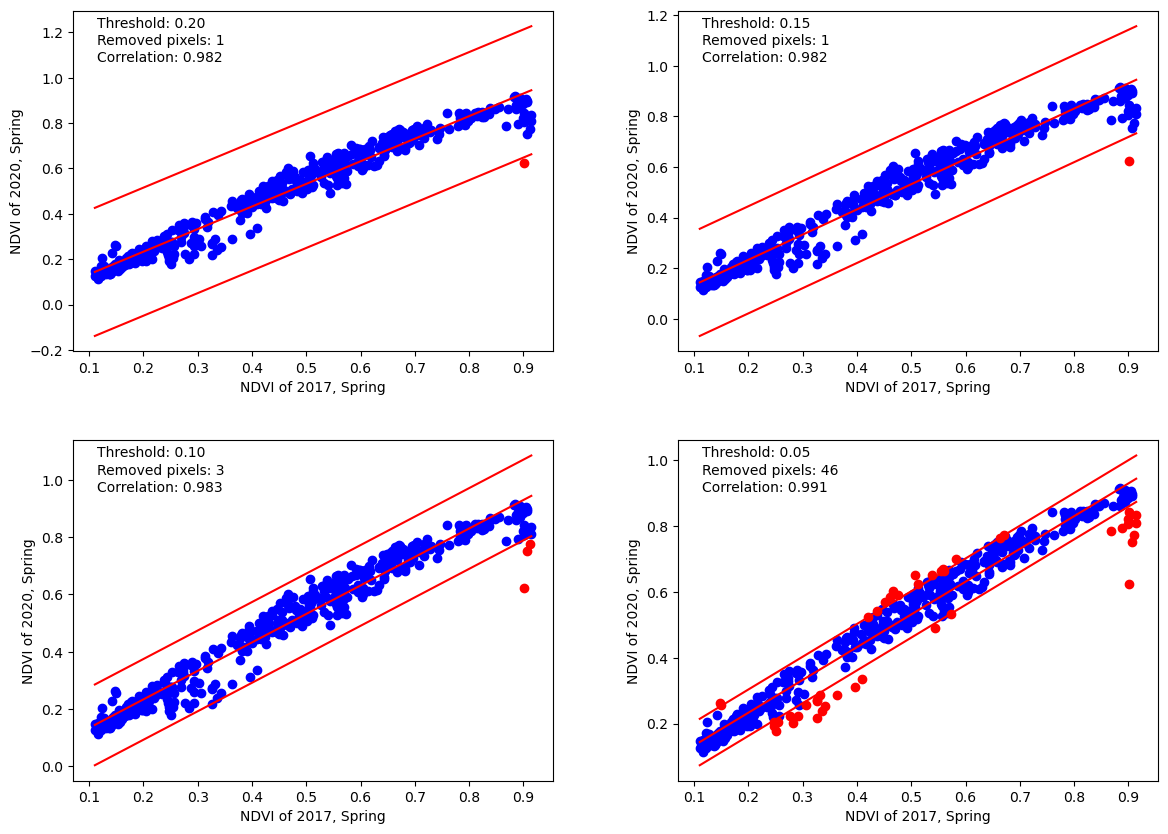

In [70]:
print(" ")
thresholds = [0.20, 0.15, 0.10, 0.05]
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
for i, threshold in enumerate(thresholds):
    data = affichage_ndvi_17_spring(a4, b4, threshold)
    Corr_matrixNDVI_17_20 = np.corrcoef(data[0], data[2])
    CorrNDVI_17_20 = round(Corr_matrixNDVI_17_20[0, 1], 3)
    ax = axs[i // 2, i % 2]
    ax.scatter(data[0], data[2], color='b')
    ax.scatter(data[1], data[3], color='r')
    ax.plot(x_reg_ndvi_17_20_spring, y_reg_ndvi_17_20_spring, color='r')
    ax.plot(data[4], data[5], color='r')
    ax.plot(data[6], data[7], color='r')
    ax.set_xlabel('NDVI of 2017, Spring')
    ax.set_ylabel('NDVI of 2020, Spring')
    ax.text(0.05, 0.95, 'Threshold: {:.2f}'.format(threshold), transform=ax.transAxes)
    ax.text(0.05, 0.90, 'Removed pixels: {}'.format(len(data[1])), transform=ax.transAxes)
    ax.text(0.05, 0.85, 'Correlation: {}'.format(CorrNDVI_17_20), transform=ax.transAxes)

plt.subplots_adjust(hspace=0.26, wspace=0.26)
plt.show()

### PSRI spring 2017 - 2020

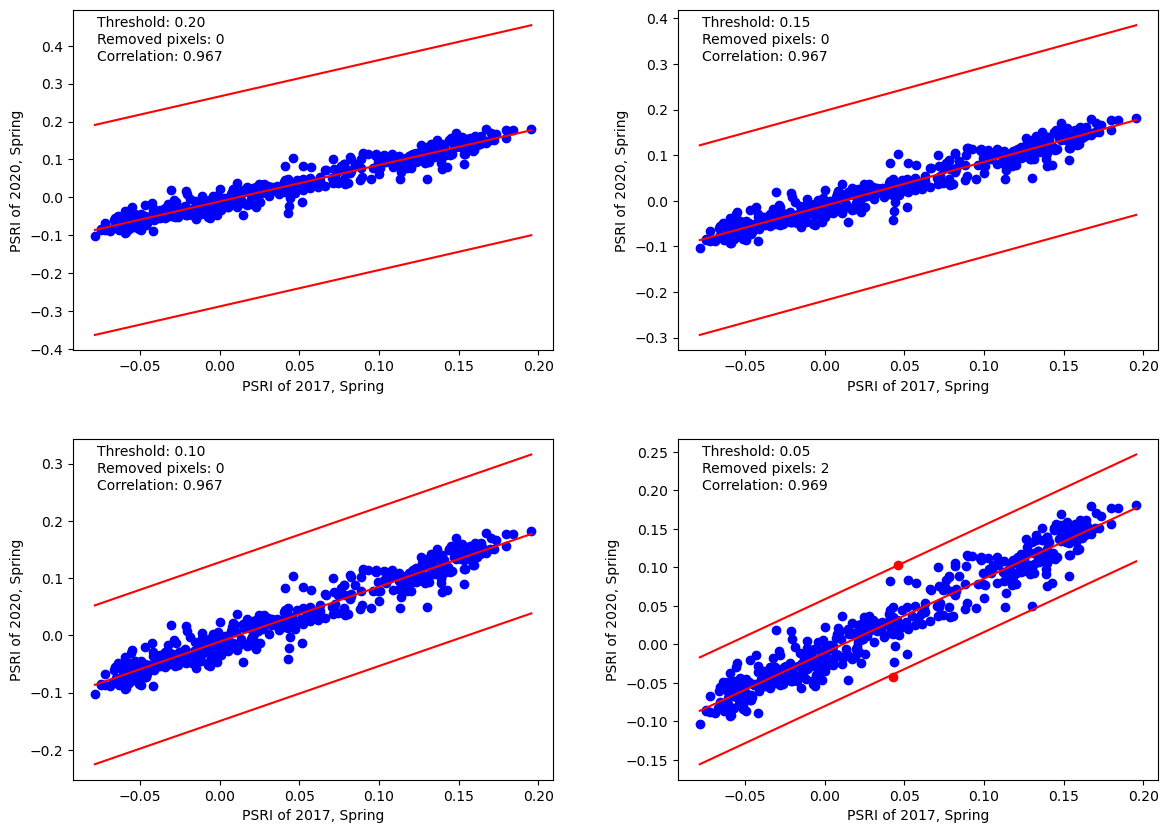

In [71]:
print(" ")
thresholds = [0.20, 0.15, 0.10, 0.05]
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
for i, threshold in enumerate(thresholds):
    data = affichage_psri_17_spring(a5, b5, threshold)
    Corr_matrixPSRI = np.corrcoef(data[0], data[2])
    CorrPSRI = round(Corr_matrixPSRI[0, 1], 3)
    ax = axs[i // 2, i % 2]
    ax.scatter(data[0], data[2], color='b')
    ax.scatter(data[1], data[3], color='r')
    ax.plot(x_reg_PSRI_17_20_spring, y_reg_PSRI_17_20_spring, color='r')
    ax.plot(data[4], data[5], color='r')
    ax.plot(data[6], data[7], color='r')
    ax.set_xlabel('PSRI of 2017, Spring')
    ax.set_ylabel('PSRI of 2020, Spring')
    ax.text(0.05, 0.95, 'Threshold: {:.2f}'.format(threshold), transform=ax.transAxes)
    ax.text(0.05, 0.90, 'Removed pixels: {}'.format(len(data[1])), transform=ax.transAxes)
    ax.text(0.05, 0.85, 'Correlation: {}'.format(CorrPSRI), transform=ax.transAxes)

plt.subplots_adjust(hspace=0.26, wspace=0.26)
plt.show()

## Création des couches QGIS

In [88]:
coord=[]
for i in range(len(liste)):
    poly=gdf.iloc[i]['geometry'].geoms[0]
    poly_transformed = mapping(poly)
    poly_pixels = rasterio.features.geometry_mask([poly_transformed], out_shape=(height, width), transform=transform, invert=True)
    pixels_inside_poly = image[poly_pixels]
    coord.append((np.where(poly_pixels==True)))

ndvi_16_spring_2=np.copy(coord)
ndvi_20_spring_2=np.copy(coord)
ndvi_16_spring_2_float = [[arr.astype(float) for arr in sublst] for sublst in ndvi_16_spring_2]
ndvi_20_spring_2_float = [[arr.astype(float) for arr in sublst] for sublst in ndvi_20_spring_2]

for i in range(len(liste)):
    for j in range(len(bande_rouge_16_spring[i])):
        ndvi_16_spring_2_float[i][0][j]=ndvi_16_spring_2_float[i][1][j]=((bande_infrarouge_16_spring[i][j] - bande_rouge_16_spring[i][j]) / (bande_infrarouge_16_spring[i][j] + bande_rouge_16_spring[i][j]))
        ndvi_20_spring_2_float[i][0][j]=ndvi_20_spring_2_float[i][1][j]=((bande_infrarouge_20_spring[i][j] - bande_rouge_20_spring[i][j]) / (bande_infrarouge_20_spring[i][j] + bande_rouge_20_spring[i][j]))

distances_ndvi_2_float=np.copy(ndvi_16_spring_2_float)
coord_2_kept=np.copy(coord)
coord_2_removed=np.copy(coord)
coord_2_kept_float = [[arr.astype(float) for arr in sublst] for sublst in coord_2_kept]
coord_2_removed_float = [[arr.astype(float) for arr in sublst] for sublst in coord_2_removed]

threshold=0.20
for i in range(len(liste)):
    for j in range(len(bande_rouge_16_spring[i])):
        distances_ndvi_2_float[i][0][j]=distances_ndvi_2_float[i][1][j]=(distance_point_droite(a0,b0,ndvi_16_spring_2_float[i][0][j],ndvi_20_spring_2_float[i][0][j]))
        if distances_ndvi_2_float[i][0][j]>threshold:
            #On supprime les coordonnées dans le vecteur des coordonnées gardées, on garde dans le vecteur des coordonnées supprimées
            coord_2_kept_float[i][0][j]=coord_2_kept_float[i][1][j]=0.0
        else :
            #On supprime les coordonnées dans le vecteur des coordonnées supprimées, on garde dans le vecteur des coordonnées gardées
            coord_2_removed_float[i][0][j]=coord_2_removed_float[i][1][j]=0.0

C:\Users\duval\anaconda3\lib\site-packages\numpy\lib\function_base.py:804: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, order=order, subok=subok, copy=True)


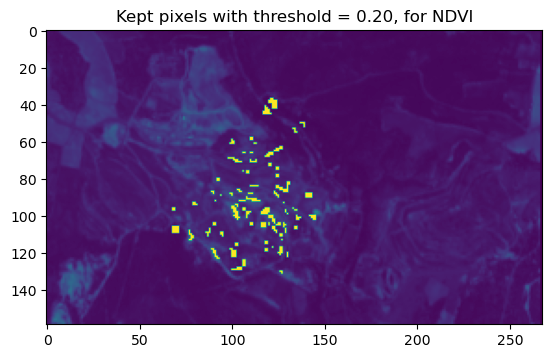

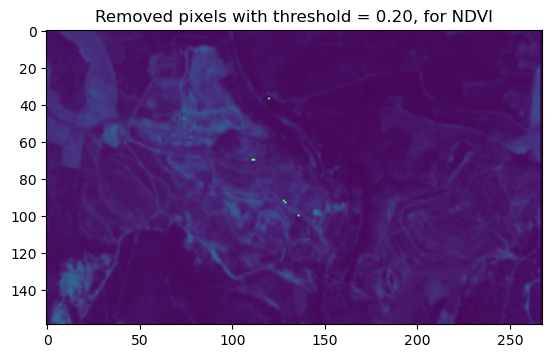

Le nombre de pixels supprimés, avec threshold = 0.20, est de : 6
On trouve bien le même nombre de pixels supprimés qu'avec le graphique.


In [89]:
with rasterio.open('DATA_S2_extrait/SENTINEL2A_20160521-105553-553_L2A_T31TDJ_D_V1-1_FRE_extrait_stack_gain.bsq') as src:
    # On lit les données en tant que tableau numpy
    data = src.read()
    for i in range(len(liste)):
        for j in range(len(bande_rouge_16_spring[i])):
            if(coord_2_kept_float[i][0][j]!=0):
                data[2,int(coord_2_kept_float[i][0][j]),int(coord_2_kept_float[i][1][j])]=1
            
    # On écrit les nouvelles données dans un nouveau fichier raster
    with rasterio.open('nouveau_fichier.bsq', 'w', **src.profile) as dst:
        dst.write(data)
    
    # On lit le canal modifié à partir du nouveau fichier raster et l'afficher
    with rasterio.open('nouveau_fichier.bsq') as src:
        plt.imshow(src.read(3))
        plt.title("Kept pixels with threshold = 0.20, for NDVI")
        plt.show()

with rasterio.open('DATA_S2_extrait/SENTINEL2A_20160521-105553-553_L2A_T31TDJ_D_V1-1_FRE_extrait_stack_gain.bsq') as src:
    # On lit les données en tant que tableau numpy
    data = src.read()
    compteur=0
    for i in range(len(liste)):
        for j in range(len(bande_rouge_16_spring[i])):
            if(coord_2_removed_float[i][0][j]!=0):
                compteur+=1
                data[2,int(coord_2_removed_float[i][0][j]),int(coord_2_removed_float[i][1][j])]=1
            
    # On écrit les nouvelles données dans un nouveau fichier raster
    with rasterio.open('NDVI=0.20_2016_spring.tif', 'w', **src.profile) as dst:
        dst.write(data)
    
    # On lit le canal modifié à partir du nouveau fichier raster et l'afficher
    with rasterio.open('NDVI=0.20_2016_spring.tif') as src:
        plt.imshow(src.read(3))
        plt.title("Removed pixels with threshold = 0.20, for NDVI")
        plt.show()
        print("Le nombre de pixels supprimés, avec threshold = 0.20, est de :",compteur) 
        print("On trouve bien le même nombre de pixels supprimés qu'avec le graphique.")

In [90]:
coord=[]
for i in range(len(liste)):
    poly=gdf.iloc[i]['geometry'].geoms[0]
    poly_transformed = mapping(poly)
    poly_pixels = rasterio.features.geometry_mask([poly_transformed], out_shape=(height, width), transform=transform, invert=True)
    pixels_inside_poly = image[poly_pixels]
    coord.append((np.where(poly_pixels==True)))

ndvi_16_spring_2=np.copy(coord)
ndvi_20_spring_2=np.copy(coord)
ndvi_16_spring_2_float = [[arr.astype(float) for arr in sublst] for sublst in ndvi_16_spring_2]
ndvi_20_spring_2_float = [[arr.astype(float) for arr in sublst] for sublst in ndvi_20_spring_2]

for i in range(len(liste)):
    for j in range(len(bande_rouge_16_spring[i])):
        ndvi_16_spring_2_float[i][0][j]=ndvi_16_spring_2_float[i][1][j]=((bande_infrarouge_16_spring[i][j] - bande_rouge_16_spring[i][j]) / (bande_infrarouge_16_spring[i][j] + bande_rouge_16_spring[i][j]))
        ndvi_20_spring_2_float[i][0][j]=ndvi_20_spring_2_float[i][1][j]=((bande_infrarouge_20_spring[i][j] - bande_rouge_20_spring[i][j]) / (bande_infrarouge_20_spring[i][j] + bande_rouge_20_spring[i][j]))

distances_ndvi_2_float=np.copy(ndvi_16_spring_2_float)
coord_2_kept=np.copy(coord)
coord_2_removed=np.copy(coord)
coord_2_kept_float = [[arr.astype(float) for arr in sublst] for sublst in coord_2_kept]
coord_2_removed_float = [[arr.astype(float) for arr in sublst] for sublst in coord_2_removed]

threshold=0.15
for i in range(len(liste)):
    for j in range(len(bande_rouge_16_spring[i])):
        distances_ndvi_2_float[i][0][j]=distances_ndvi_2_float[i][1][j]=(distance_point_droite(a0,b0,ndvi_16_spring_2_float[i][0][j],ndvi_20_spring_2_float[i][0][j]))
        if distances_ndvi_2_float[i][0][j]>threshold:
            #On supprime les coordonnées dans le vecteur des coordonnées gardées, on garde dans le vecteur des coordonnées supprimées
            coord_2_kept_float[i][0][j]=coord_2_kept_float[i][1][j]=0.0
        else :
            #On supprime les coordonnées dans le vecteur des coordonnées supprimées, on garde dans le vecteur des coordonnées gardées
            coord_2_removed_float[i][0][j]=coord_2_removed_float[i][1][j]=0.0

C:\Users\duval\anaconda3\lib\site-packages\numpy\lib\function_base.py:804: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, order=order, subok=subok, copy=True)


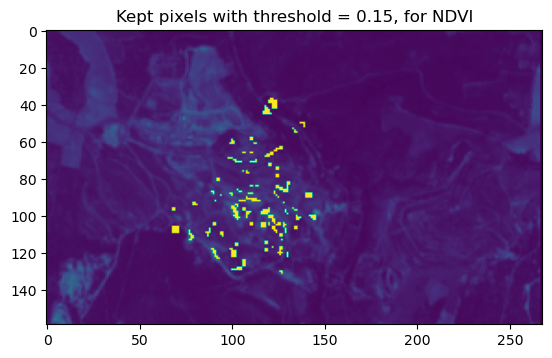

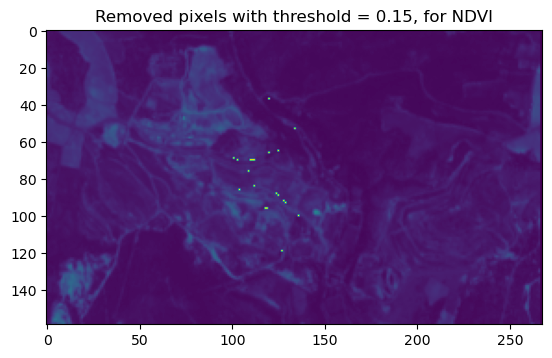

Le nombre de pixels supprimés, avec threshold = 0.15, est de : 20
On trouve bien le même nombre de pixels supprimés qu'avec le graphique.


In [91]:
with rasterio.open('DATA_S2_extrait/SENTINEL2A_20160521-105553-553_L2A_T31TDJ_D_V1-1_FRE_extrait_stack_gain.bsq') as src:
    # On lit les données en tant que tableau numpy
    data = src.read()
    for i in range(len(liste)):
        for j in range(len(bande_rouge_16_spring[i])):
            if(coord_2_kept_float[i][0][j]!=0):
                data[2,int(coord_2_kept_float[i][0][j]),int(coord_2_kept_float[i][1][j])]=1
            
    # On écrit les nouvelles données dans un nouveau fichier raster
    with rasterio.open('nouveau_fichier.bsq', 'w', **src.profile) as dst:
        dst.write(data)
    
    # On lit le canal modifié à partir du nouveau fichier raster et l'afficher
    with rasterio.open('nouveau_fichier.bsq') as src:
        plt.imshow(src.read(3))
        plt.title("Kept pixels with threshold = 0.15, for NDVI")
        plt.show()

with rasterio.open('DATA_S2_extrait/SENTINEL2A_20160521-105553-553_L2A_T31TDJ_D_V1-1_FRE_extrait_stack_gain.bsq') as src:
    # On lit les données en tant que tableau numpy
    data = src.read()
    compteur=0
    for i in range(len(liste)):
        for j in range(len(bande_rouge_16_spring[i])):
            if(coord_2_removed_float[i][0][j]!=0):
                compteur+=1
                data[2,int(coord_2_removed_float[i][0][j]),int(coord_2_removed_float[i][1][j])]=1
            
    # On écrit les nouvelles données dans un nouveau fichier raster
    with rasterio.open('NDVI=0.15_2016_spring.tif', 'w', **src.profile) as dst:
        dst.write(data)
    
    # On lit le canal modifié à partir du nouveau fichier raster et l'afficher
    with rasterio.open('NDVI=0.15_2016_spring.tif') as src:
        plt.imshow(src.read(3))
        plt.title("Removed pixels with threshold = 0.15, for NDVI")
        plt.show()
        print("Le nombre de pixels supprimés, avec threshold = 0.15, est de :",compteur) 
        print("On trouve bien le même nombre de pixels supprimés qu'avec le graphique.")

In [92]:
coord=[]
for i in range(len(liste)):
    poly=gdf.iloc[i]['geometry'].geoms[0]
    poly_transformed = mapping(poly)
    poly_pixels = rasterio.features.geometry_mask([poly_transformed], out_shape=(height, width), transform=transform, invert=True)
    pixels_inside_poly = image[poly_pixels]
    coord.append((np.where(poly_pixels==True)))

ndvi_16_spring_2=np.copy(coord)
ndvi_20_spring_2=np.copy(coord)
ndvi_16_spring_2_float = [[arr.astype(float) for arr in sublst] for sublst in ndvi_16_spring_2]
ndvi_20_spring_2_float = [[arr.astype(float) for arr in sublst] for sublst in ndvi_20_spring_2]

for i in range(len(liste)):
    for j in range(len(bande_rouge_16_spring[i])):
        ndvi_16_spring_2_float[i][0][j]=ndvi_16_spring_2_float[i][1][j]=((bande_infrarouge_16_spring[i][j] - bande_rouge_16_spring[i][j]) / (bande_infrarouge_16_spring[i][j] + bande_rouge_16_spring[i][j]))
        ndvi_20_spring_2_float[i][0][j]=ndvi_20_spring_2_float[i][1][j]=((bande_infrarouge_20_spring[i][j] - bande_rouge_20_spring[i][j]) / (bande_infrarouge_20_spring[i][j] + bande_rouge_20_spring[i][j]))

distances_ndvi_2_float=np.copy(ndvi_16_spring_2_float)
coord_2_kept=np.copy(coord)
coord_2_removed=np.copy(coord)
coord_2_kept_float = [[arr.astype(float) for arr in sublst] for sublst in coord_2_kept]
coord_2_removed_float = [[arr.astype(float) for arr in sublst] for sublst in coord_2_removed]

threshold=0.10
for i in range(len(liste)):
    for j in range(len(bande_rouge_16_spring[i])):
        distances_ndvi_2_float[i][0][j]=distances_ndvi_2_float[i][1][j]=(distance_point_droite(a0,b0,ndvi_16_spring_2_float[i][0][j],ndvi_20_spring_2_float[i][0][j]))
        if distances_ndvi_2_float[i][0][j]>threshold:
            #On supprime les coordonnées dans le vecteur des coordonnées gardées, on garde dans le vecteur des coordonnées supprimées
            coord_2_kept_float[i][0][j]=coord_2_kept_float[i][1][j]=0.0
        else :
            #On supprime les coordonnées dans le vecteur des coordonnées supprimées, on garde dans le vecteur des coordonnées gardées
            coord_2_removed_float[i][0][j]=coord_2_removed_float[i][1][j]=0.0

C:\Users\duval\anaconda3\lib\site-packages\numpy\lib\function_base.py:804: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, order=order, subok=subok, copy=True)


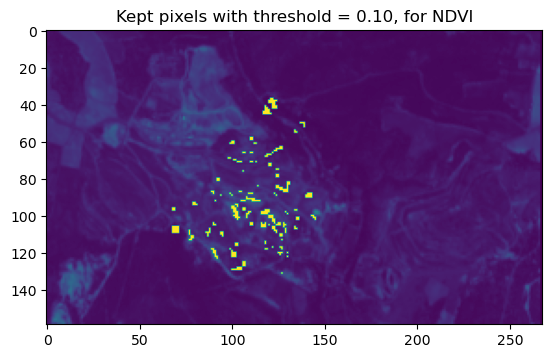

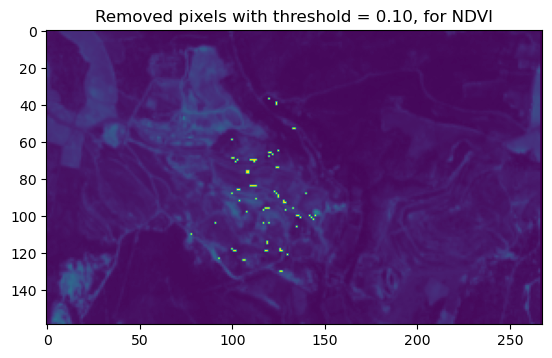

Le nombre de pixels supprimés, avec threshold = 0.10, est de : 78
On trouve bien le même nombre de pixels supprimés qu'avec le graphique.


In [93]:
with rasterio.open('DATA_S2_extrait/SENTINEL2A_20160521-105553-553_L2A_T31TDJ_D_V1-1_FRE_extrait_stack_gain.bsq') as src:
    # On lit les données en tant que tableau numpy
    data = src.read()
    for i in range(len(liste)):
        for j in range(len(bande_rouge_16_spring[i])):
            if(coord_2_kept_float[i][0][j]!=0):
                data[2,int(coord_2_kept_float[i][0][j]),int(coord_2_kept_float[i][1][j])]=1
            
    # On écrit les nouvelles données dans un nouveau fichier raster
    with rasterio.open('nouveau_fichier.bsq', 'w', **src.profile) as dst:
        dst.write(data)
    
    # On lit le canal modifié à partir du nouveau fichier raster et l'afficher
    with rasterio.open('nouveau_fichier.bsq') as src:
        plt.imshow(src.read(3))
        plt.title("Kept pixels with threshold = 0.10, for NDVI")
        plt.show()

with rasterio.open('DATA_S2_extrait/SENTINEL2A_20160521-105553-553_L2A_T31TDJ_D_V1-1_FRE_extrait_stack_gain.bsq') as src:
    # On lit les données en tant que tableau numpy
    data = src.read()
    compteur=0
    for i in range(len(liste)):
        for j in range(len(bande_rouge_16_spring[i])):
            if(coord_2_removed_float[i][0][j]!=0):
                compteur+=1
                data[2,int(coord_2_removed_float[i][0][j]),int(coord_2_removed_float[i][1][j])]=1
            
    # On écrit les nouvelles données dans un nouveau fichier raster
    with rasterio.open('NDVI=0.10_2016_spring.tif', 'w', **src.profile) as dst:
        dst.write(data)
    
    # On lit le canal modifié à partir du nouveau fichier raster et l'afficher
    with rasterio.open('NDVI=0.10_2016_spring.tif') as src:
        plt.imshow(src.read(3))
        plt.title("Removed pixels with threshold = 0.10, for NDVI")
        plt.show()
        print("Le nombre de pixels supprimés, avec threshold = 0.10, est de :",compteur) 
        print("On trouve bien le même nombre de pixels supprimés qu'avec le graphique.")

In [94]:
coord=[]
for i in range(len(liste)):
    poly=gdf.iloc[i]['geometry'].geoms[0]
    poly_transformed = mapping(poly)
    poly_pixels = rasterio.features.geometry_mask([poly_transformed], out_shape=(height, width), transform=transform, invert=True)
    pixels_inside_poly = image[poly_pixels]
    coord.append((np.where(poly_pixels==True)))

ndvi_16_spring_2=np.copy(coord)
ndvi_20_spring_2=np.copy(coord)
ndvi_16_spring_2_float = [[arr.astype(float) for arr in sublst] for sublst in ndvi_16_spring_2]
ndvi_20_spring_2_float = [[arr.astype(float) for arr in sublst] for sublst in ndvi_20_spring_2]

for i in range(len(liste)):
    for j in range(len(bande_rouge_16_spring[i])):
        ndvi_16_spring_2_float[i][0][j]=ndvi_16_spring_2_float[i][1][j]=((bande_infrarouge_16_spring[i][j] - bande_rouge_16_spring[i][j]) / (bande_infrarouge_16_spring[i][j] + bande_rouge_16_spring[i][j]))
        ndvi_20_spring_2_float[i][0][j]=ndvi_20_spring_2_float[i][1][j]=((bande_infrarouge_20_spring[i][j] - bande_rouge_20_spring[i][j]) / (bande_infrarouge_20_spring[i][j] + bande_rouge_20_spring[i][j]))

distances_ndvi_2_float=np.copy(ndvi_16_spring_2_float)
coord_2_kept=np.copy(coord)
coord_2_removed=np.copy(coord)
coord_2_kept_float = [[arr.astype(float) for arr in sublst] for sublst in coord_2_kept]
coord_2_removed_float = [[arr.astype(float) for arr in sublst] for sublst in coord_2_removed]

threshold=0.05
for i in range(len(liste)):
    for j in range(len(bande_rouge_16_spring[i])):
        distances_ndvi_2_float[i][0][j]=distances_ndvi_2_float[i][1][j]=(distance_point_droite(a0,b0,ndvi_16_spring_2_float[i][0][j],ndvi_20_spring_2_float[i][0][j]))
        if distances_ndvi_2_float[i][0][j]>threshold:
            #On supprime les coordonnées dans le vecteur des coordonnées gardées, on garde dans le vecteur des coordonnées supprimées
            coord_2_kept_float[i][0][j]=coord_2_kept_float[i][1][j]=0.0
        else :
            #On supprime les coordonnées dans le vecteur des coordonnées supprimées, on garde dans le vecteur des coordonnées gardées
            coord_2_removed_float[i][0][j]=coord_2_removed_float[i][1][j]=0.0

C:\Users\duval\anaconda3\lib\site-packages\numpy\lib\function_base.py:804: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, order=order, subok=subok, copy=True)


Le nombre de pixels gardés, avec threshold = 0.05, est de : 236


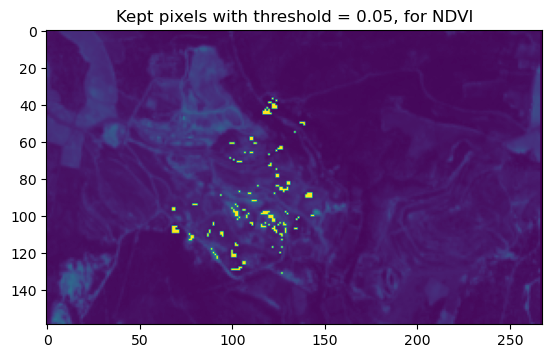

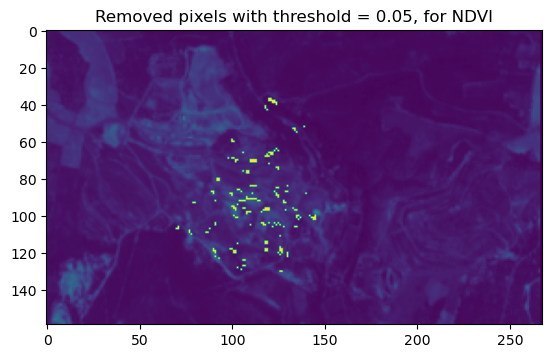

Le nombre de pixels supprimés, avec threshold = 0.05, est de : 210
On trouve bien le même nombre de pixels supprimés qu'avec le graphique.


In [95]:
with rasterio.open('DATA_S2_extrait/SENTINEL2A_20160521-105553-553_L2A_T31TDJ_D_V1-1_FRE_extrait_stack_gain.bsq') as src:
    # On lit les données en tant que tableau numpy
    data = src.read()
    c=0
    for i in range(len(liste)):
        for j in range(len(bande_rouge_16_spring[i])):
            if(coord_2_kept_float[i][0][j]!=0):
                c+=1
                data[2,int(coord_2_kept_float[i][0][j]),int(coord_2_kept_float[i][1][j])]=1
    print("Le nombre de pixels gardés, avec threshold = 0.05, est de :",c)
    # On écrit les nouvelles données dans un nouveau fichier raster
    with rasterio.open('nouveau_fichier.bsq', 'w', **src.profile) as dst:
        dst.write(data)
    
    # On lit le canal modifié à partir du nouveau fichier raster et l'afficher
    with rasterio.open('nouveau_fichier.bsq') as src:
        plt.imshow(src.read(3))
        plt.title("Kept pixels with threshold = 0.05, for NDVI")
        plt.show()

with rasterio.open('DATA_S2_extrait/SENTINEL2A_20160521-105553-553_L2A_T31TDJ_D_V1-1_FRE_extrait_stack_gain.bsq') as src:
    # On lit les données en tant que tableau numpy
    data = src.read()
    compteur=0
    for i in range(len(liste)):
        for j in range(len(bande_rouge_16_spring[i])):
            if(coord_2_removed_float[i][0][j]!=0):
                compteur+=1
                data[2,int(coord_2_removed_float[i][0][j]),int(coord_2_removed_float[i][1][j])]=1
            
    # On écrit les nouvelles données dans un nouveau fichier raster
    with rasterio.open('NDVI=0.05_2016_spring.tif', 'w', **src.profile) as dst:
        dst.write(data)
    
    # On lit le canal modifié à partir du nouveau fichier raster et l'afficher
    with rasterio.open('NDVI=0.05_2016_spring.tif') as src:
        plt.imshow(src.read(3))
        plt.title("Removed pixels with threshold = 0.05, for NDVI")
        plt.show()
        print("Le nombre de pixels supprimés, avec threshold = 0.05, est de :",compteur) 
        print("On trouve bien le même nombre de pixels supprimés qu'avec le graphique.")

In [96]:
coord=[]
for i in range(len(liste)):
    poly=gdf.iloc[i]['geometry'].geoms[0]
    poly_transformed = mapping(poly)
    poly_pixels = rasterio.features.geometry_mask([poly_transformed], out_shape=(height, width), transform=transform, invert=True)
    pixels_inside_poly = image[poly_pixels]
    coord.append((np.where(poly_pixels==True)))

ndvi_16_summer_2=np.copy(coord)
ndvi_20_summer_2=np.copy(coord)
ndvi_16_summer_2_float = [[arr.astype(float) for arr in sublst] for sublst in ndvi_16_summer_2]
ndvi_20_summer_2_float = [[arr.astype(float) for arr in sublst] for sublst in ndvi_20_summer_2]

for i in range(len(liste)):
    for j in range(len(bande_rouge_16_summer[i])):
        ndvi_16_summer_2_float[i][0][j]=ndvi_16_summer_2_float[i][1][j]=((bande_infrarouge_16_summer[i][j] - bande_rouge_16_summer[i][j]) / (bande_infrarouge_16_summer[i][j] + bande_rouge_16_summer[i][j]))
        ndvi_20_summer_2_float[i][0][j]=ndvi_20_summer_2_float[i][1][j]=((bande_infrarouge_20_summer[i][j] - bande_rouge_20_summer[i][j]) / (bande_infrarouge_20_summer[i][j] + bande_rouge_20_summer[i][j]))

distances_ndvi_2_float=np.copy(ndvi_16_summer_2_float)
coord_2_kept=np.copy(coord)
coord_2_removed=np.copy(coord)
coord_2_kept_float = [[arr.astype(float) for arr in sublst] for sublst in coord_2_kept]
coord_2_removed_float = [[arr.astype(float) for arr in sublst] for sublst in coord_2_removed]

threshold=0.05
for i in range(len(liste)):
    for j in range(len(bande_rouge_16_summer[i])):
        distances_ndvi_2_float[i][0][j]=distances_ndvi_2_float[i][1][j]=(distance_point_droite(a2,b2,ndvi_16_summer_2_float[i][0][j],ndvi_20_summer_2_float[i][0][j]))
        if distances_ndvi_2_float[i][0][j]>threshold:
            #On supprime les coordonnées dans le vecteur des coordonnées gardées, on garde dans le vecteur des coordonnées supprimées
            coord_2_kept_float[i][0][j]=coord_2_kept_float[i][1][j]=0.0
        else :
            #On supprime les coordonnées dans le vecteur des coordonnées supprimées, on garde dans le vecteur des coordonnées gardées
            coord_2_removed_float[i][0][j]=coord_2_removed_float[i][1][j]=0.0

C:\Users\duval\anaconda3\lib\site-packages\numpy\lib\function_base.py:804: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, order=order, subok=subok, copy=True)


Le nombre de pixels gardés, avec threshold = 0.05, est de : 392


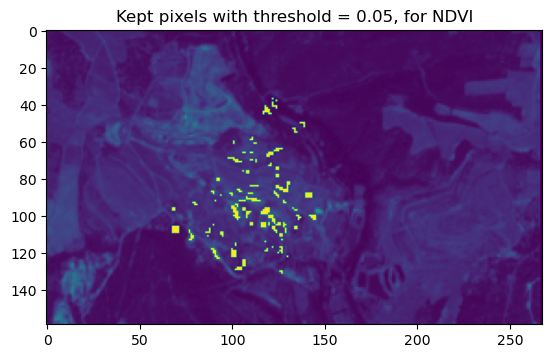

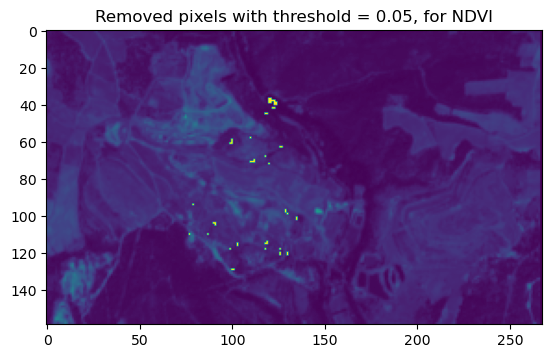

Le nombre de pixels supprimés, avec threshold = 0.05, est de : 54
On trouve bien le même nombre de pixels supprimés qu'avec le graphique.


In [97]:
with rasterio.open('SENTINEL2A_20160826-104023-461_L2A_T31TDJ_D_V1-1_FRE_extrait_stack_gain.bsq') as src:
    # On lit les données en tant que tableau numpy
    data = src.read()
    compteur1=0
    for i in range(len(liste)):
        for j in range(len(bande_rouge_16_spring[i])):
            if(coord_2_kept_float[i][0][j]!=0):
                compteur1+=1
                data[2,int(coord_2_kept_float[i][0][j]),int(coord_2_kept_float[i][1][j])]=1
    print("Le nombre de pixels gardés, avec threshold = 0.05, est de :",compteur1) 
            
    # On écrit les nouvelles données dans un nouveau fichier raster
    with rasterio.open('nouveau_fichier.bsq', 'w', **src.profile) as dst:
        dst.write(data)
    
    # On lit le canal modifié à partir du nouveau fichier raster et l'afficher
    with rasterio.open('nouveau_fichier.bsq') as src:
        plt.imshow(src.read(3))
        plt.title("Kept pixels with threshold = 0.05, for NDVI")
        plt.show()

with rasterio.open('SENTINEL2A_20160826-104023-461_L2A_T31TDJ_D_V1-1_FRE_extrait_stack_gain.bsq') as src:
    # On lit les données en tant que tableau numpy
    data = src.read()
    compteur=0
    for i in range(len(liste)):
        for j in range(len(bande_rouge_16_spring[i])):
            if(coord_2_removed_float[i][0][j]!=0):
                compteur+=1
                data[2,int(coord_2_removed_float[i][0][j]),int(coord_2_removed_float[i][1][j])]=1
            
    # On écrit les nouvelles données dans un nouveau fichier raster
    with rasterio.open('NDVI=0.05_2016_summer.tif', 'w', **src.profile) as dst:
        dst.write(data)
    
    # On lit le canal modifié à partir du nouveau fichier raster et l'afficher
    with rasterio.open('NDVI=0.05_2016_summer.tif') as src:
        plt.imshow(src.read(3))
        plt.title("Removed pixels with threshold = 0.05, for NDVI")
        plt.show()
        print("Le nombre de pixels supprimés, avec threshold = 0.05, est de :",compteur) 
        print("On trouve bien le même nombre de pixels supprimés qu'avec le graphique.")

In [98]:
coord=[]
for i in range(len(liste)):
    poly=gdf.iloc[i]['geometry'].geoms[0]
    poly_transformed = mapping(poly)
    poly_pixels = rasterio.features.geometry_mask([poly_transformed], out_shape=(height, width), transform=transform, invert=True)
    pixels_inside_poly = image[poly_pixels]
    coord.append((np.where(poly_pixels==True)))

ndvi_16_summer_2=np.copy(coord)
ndvi_20_summer_2=np.copy(coord)
ndvi_16_summer_2_float = [[arr.astype(float) for arr in sublst] for sublst in ndvi_16_summer_2]
ndvi_20_summer_2_float = [[arr.astype(float) for arr in sublst] for sublst in ndvi_20_summer_2]

for i in range(len(liste)):
    for j in range(len(bande_rouge_16_summer[i])):
        ndvi_16_summer_2_float[i][0][j]=ndvi_16_summer_2_float[i][1][j]=((bande_infrarouge_16_summer[i][j] - bande_rouge_16_summer[i][j]) / (bande_infrarouge_16_summer[i][j] + bande_rouge_16_summer[i][j]))
        ndvi_20_summer_2_float[i][0][j]=ndvi_20_summer_2_float[i][1][j]=((bande_infrarouge_20_summer[i][j] - bande_rouge_20_summer[i][j]) / (bande_infrarouge_20_summer[i][j] + bande_rouge_20_summer[i][j]))

distances_ndvi_2_float=np.copy(ndvi_16_summer_2_float)
coord_2_kept=np.copy(coord)
coord_2_removed=np.copy(coord)
coord_2_kept_float = [[arr.astype(float) for arr in sublst] for sublst in coord_2_kept]
coord_2_removed_float = [[arr.astype(float) for arr in sublst] for sublst in coord_2_removed]

threshold=0.10
for i in range(len(liste)):
    for j in range(len(bande_rouge_16_summer[i])):
        distances_ndvi_2_float[i][0][j]=distances_ndvi_2_float[i][1][j]=(distance_point_droite(a2,b2,ndvi_16_summer_2_float[i][0][j],ndvi_20_summer_2_float[i][0][j]))
        if distances_ndvi_2_float[i][0][j]>threshold:
            #On supprime les coordonnées dans le vecteur des coordonnées gardées, on garde dans le vecteur des coordonnées supprimées
            coord_2_kept_float[i][0][j]=coord_2_kept_float[i][1][j]=0.0
        else :
            #On supprime les coordonnées dans le vecteur des coordonnées supprimées, on garde dans le vecteur des coordonnées gardées
            coord_2_removed_float[i][0][j]=coord_2_removed_float[i][1][j]=0.0

C:\Users\duval\anaconda3\lib\site-packages\numpy\lib\function_base.py:804: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, order=order, subok=subok, copy=True)


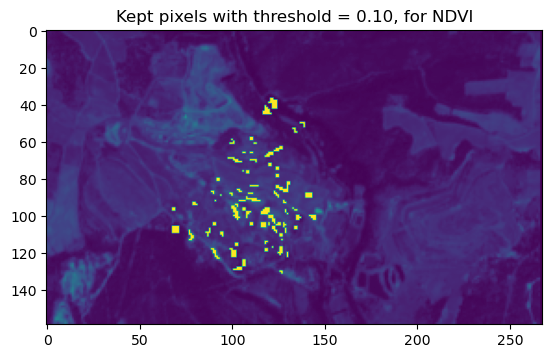

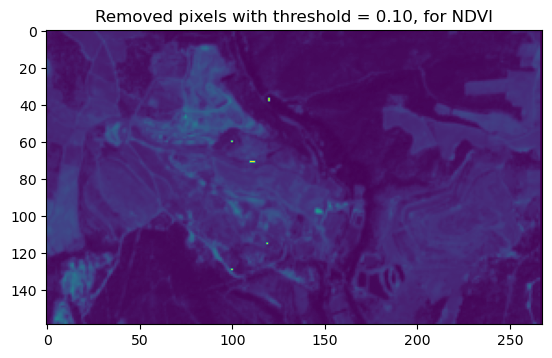

Le nombre de pixels supprimés, avec threshold = 0.10, est de : 8
On trouve bien le même nombre de pixels supprimés qu'avec le graphique.


In [99]:
with rasterio.open('SENTINEL2A_20160826-104023-461_L2A_T31TDJ_D_V1-1_FRE_extrait_stack_gain.bsq') as src:
    # On lit les données en tant que tableau numpy
    data = src.read()
    for i in range(len(liste)):
        for j in range(len(bande_rouge_16_spring[i])):
            if(coord_2_kept_float[i][0][j]!=0):
                data[2,int(coord_2_kept_float[i][0][j]),int(coord_2_kept_float[i][1][j])]=1
            
    # On écrit les nouvelles données dans un nouveau fichier raster
    with rasterio.open('nouveau_fichier.bsq', 'w', **src.profile) as dst:
        dst.write(data)
    
    # On lit le canal modifié à partir du nouveau fichier raster et l'afficher
    with rasterio.open('nouveau_fichier.bsq') as src:
        plt.imshow(src.read(3))
        plt.title("Kept pixels with threshold = 0.10, for NDVI")
        plt.show()

with rasterio.open('SENTINEL2A_20160826-104023-461_L2A_T31TDJ_D_V1-1_FRE_extrait_stack_gain.bsq') as src:
    # On lit les données en tant que tableau numpy
    data = src.read()
    compteur=0
    for i in range(len(liste)):
        for j in range(len(bande_rouge_16_spring[i])):
            if(coord_2_removed_float[i][0][j]!=0):
                compteur+=1
                data[2,int(coord_2_removed_float[i][0][j]),int(coord_2_removed_float[i][1][j])]=1
            
    # On écrit les nouvelles données dans un nouveau fichier raster
    with rasterio.open('NDVI=0.10_2016_summer.tif', 'w', **src.profile) as dst:
        dst.write(data)
    
    # On lit le canal modifié à partir du nouveau fichier raster et l'afficher
    with rasterio.open('NDVI=0.10_2016_summer.tif') as src:
        plt.imshow(src.read(3))
        plt.title("Removed pixels with threshold = 0.10, for NDVI")
        plt.show()
        print("Le nombre de pixels supprimés, avec threshold = 0.10, est de :",compteur) 
        print("On trouve bien le même nombre de pixels supprimés qu'avec le graphique.")

In [100]:
coord=[]
for i in range(len(liste)):
    poly=gdf.iloc[i]['geometry'].geoms[0]
    poly_transformed = mapping(poly)
    poly_pixels = rasterio.features.geometry_mask([poly_transformed], out_shape=(height, width), transform=transform, invert=True)
    pixels_inside_poly = image[poly_pixels]
    coord.append((np.where(poly_pixels==True)))

ndvi_16_autumn_2=np.copy(coord)
ndvi_20_autumn_2=np.copy(coord)
ndvi_16_autumn_2_float = [[arr.astype(float) for arr in sublst] for sublst in ndvi_16_autumn_2]
ndvi_20_autumn_2_float = [[arr.astype(float) for arr in sublst] for sublst in ndvi_20_autumn_2]

for i in range(len(liste)):
    for j in range(len(bande_rouge_16_autumn[i])):
        ndvi_16_autumn_2_float[i][0][j]=ndvi_16_autumn_2_float[i][1][j]=((bande_infrarouge_16_autumn[i][j] - bande_rouge_16_autumn[i][j]) / (bande_infrarouge_16_autumn[i][j] + bande_rouge_16_autumn[i][j]))
        ndvi_20_autumn_2_float[i][0][j]=ndvi_20_autumn_2_float[i][1][j]=((bande_infrarouge_20_autumn[i][j] - bande_rouge_20_autumn[i][j]) / (bande_infrarouge_20_autumn[i][j] + bande_rouge_20_autumn[i][j]))

distances_ndvi_2_float=np.copy(ndvi_16_autumn_2_float)
coord_2_kept=np.copy(coord)
coord_2_removed=np.copy(coord)
coord_2_kept_float = [[arr.astype(float) for arr in sublst] for sublst in coord_2_kept]
coord_2_removed_float = [[arr.astype(float) for arr in sublst] for sublst in coord_2_removed]

threshold=0.10
for i in range(len(liste)):
    for j in range(len(bande_rouge_16_autumn[i])):
        distances_ndvi_2_float[i][0][j]=distances_ndvi_2_float[i][1][j]=(distance_point_droite(a6,b6,ndvi_16_autumn_2_float[i][0][j],ndvi_20_autumn_2_float[i][0][j]))
        if distances_ndvi_2_float[i][0][j]>threshold:
            #On supprime les coordonnées dans le vecteur des coordonnées gardées, on garde dans le vecteur des coordonnées supprimées
            coord_2_kept_float[i][0][j]=coord_2_kept_float[i][1][j]=0.0
        else :
            #On supprime les coordonnées dans le vecteur des coordonnées supprimées, on garde dans le vecteur des coordonnées gardées
            coord_2_removed_float[i][0][j]=coord_2_removed_float[i][1][j]=0.0

C:\Users\duval\anaconda3\lib\site-packages\numpy\lib\function_base.py:804: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, order=order, subok=subok, copy=True)


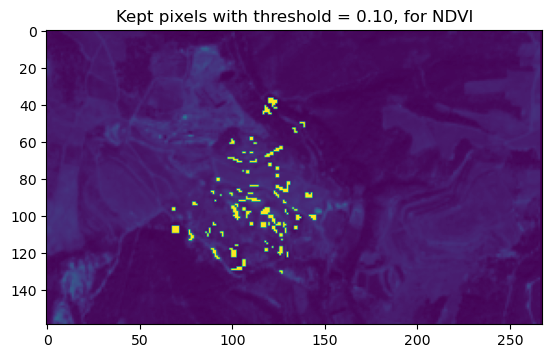

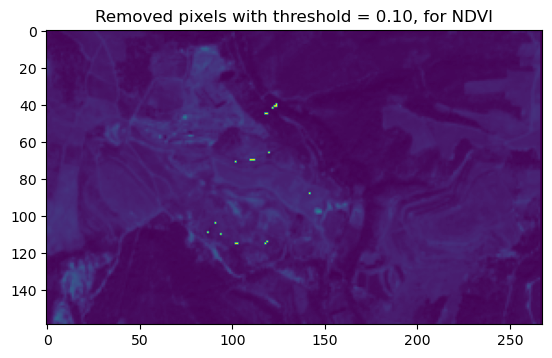

Le nombre de pixels supprimés, avec threshold = 0.10, est de : 19
On trouve bien le même nombre de pixels supprimés qu'avec le graphique.


In [101]:
with rasterio.open('SENTINEL2A_20161015-104513-300_L2A_T31TDJ_D_V1-1_FRE_extrait_stack_gain.bsq') as src:
    # On lit les données en tant que tableau numpy
    data = src.read()
    for i in range(len(liste)):
        for j in range(len(bande_rouge_16_autumn[i])):
            if(coord_2_kept_float[i][0][j]!=0):
                data[2,int(coord_2_kept_float[i][0][j]),int(coord_2_kept_float[i][1][j])]=1
            
    # On écrit les nouvelles données dans un nouveau fichier raster
    with rasterio.open('nouveau_fichier.bsq', 'w', **src.profile) as dst:
        dst.write(data)
    
    # On lit le canal modifié à partir du nouveau fichier raster et l'afficher
    with rasterio.open('nouveau_fichier.bsq') as src:
        plt.imshow(src.read(3))
        plt.title("Kept pixels with threshold = 0.10, for NDVI")
        plt.show()

with rasterio.open('SENTINEL2A_20161015-104513-300_L2A_T31TDJ_D_V1-1_FRE_extrait_stack_gain.bsq') as src:
    # On lit les données en tant que tableau numpy
    data = src.read()
    compteur=0
    for i in range(len(liste)):
        for j in range(len(bande_rouge_16_autumn[i])):
            if(coord_2_removed_float[i][0][j]!=0):
                compteur+=1
                data[2,int(coord_2_removed_float[i][0][j]),int(coord_2_removed_float[i][1][j])]=1
            
    # On écrit les nouvelles données dans un nouveau fichier raster
    with rasterio.open('NDVI=0.10_2016_autumn.tif', 'w', **src.profile) as dst:
        dst.write(data)
    
    # On lit le canal modifié à partir du nouveau fichier raster et l'afficher
    with rasterio.open('NDVI=0.10_2016_autumn.tif') as src:
        plt.imshow(src.read(3))
        plt.title("Removed pixels with threshold = 0.10, for NDVI")
        plt.show()
        print("Le nombre de pixels supprimés, avec threshold = 0.10, est de :",compteur) 
        print("On trouve bien le même nombre de pixels supprimés qu'avec le graphique.")

In [102]:
coord=[]
for i in range(len(liste)):
    poly=gdf.iloc[i]['geometry'].geoms[0]
    poly_transformed = mapping(poly)
    poly_pixels = rasterio.features.geometry_mask([poly_transformed], out_shape=(height, width), transform=transform, invert=True)
    pixels_inside_poly = image[poly_pixels]
    coord.append((np.where(poly_pixels==True)))

ndvi_16_autumn_2=np.copy(coord)
ndvi_20_autumn_2=np.copy(coord)
ndvi_16_autumn_2_float = [[arr.astype(float) for arr in sublst] for sublst in ndvi_16_autumn_2]
ndvi_20_autumn_2_float = [[arr.astype(float) for arr in sublst] for sublst in ndvi_20_autumn_2]

for i in range(len(liste)):
    for j in range(len(bande_rouge_16_autumn[i])):
        ndvi_16_autumn_2_float[i][0][j]=ndvi_16_autumn_2_float[i][1][j]=((bande_infrarouge_16_autumn[i][j] - bande_rouge_16_autumn[i][j]) / (bande_infrarouge_16_autumn[i][j] + bande_rouge_16_autumn[i][j]))
        ndvi_20_autumn_2_float[i][0][j]=ndvi_20_autumn_2_float[i][1][j]=((bande_infrarouge_20_autumn[i][j] - bande_rouge_20_autumn[i][j]) / (bande_infrarouge_20_autumn[i][j] + bande_rouge_20_autumn[i][j]))

distances_ndvi_2_float=np.copy(ndvi_16_autumn_2_float)
coord_2_kept=np.copy(coord)
coord_2_removed=np.copy(coord)
coord_2_kept_float = [[arr.astype(float) for arr in sublst] for sublst in coord_2_kept]
coord_2_removed_float = [[arr.astype(float) for arr in sublst] for sublst in coord_2_removed]

threshold=0.05
for i in range(len(liste)):
    for j in range(len(bande_rouge_16_autumn[i])):
        distances_ndvi_2_float[i][0][j]=distances_ndvi_2_float[i][1][j]=(distance_point_droite(a6,b6,ndvi_16_autumn_2_float[i][0][j],ndvi_20_autumn_2_float[i][0][j]))
        if distances_ndvi_2_float[i][0][j]>threshold:
            #On supprime les coordonnées dans le vecteur des coordonnées gardées, on garde dans le vecteur des coordonnées supprimées
            coord_2_kept_float[i][0][j]=coord_2_kept_float[i][1][j]=0.0
        else :
            #On supprime les coordonnées dans le vecteur des coordonnées supprimées, on garde dans le vecteur des coordonnées gardées
            coord_2_removed_float[i][0][j]=coord_2_removed_float[i][1][j]=0.0

C:\Users\duval\anaconda3\lib\site-packages\numpy\lib\function_base.py:804: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, order=order, subok=subok, copy=True)


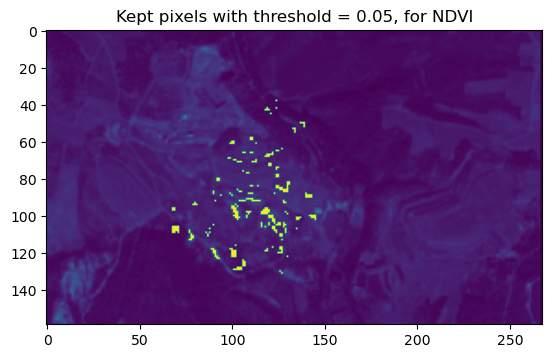

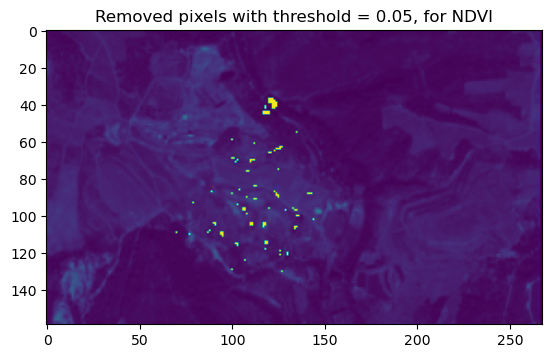

Le nombre de pixels supprimés, avec threshold = 0.05, est de : 122
On trouve bien le même nombre de pixels supprimés qu'avec le graphique.


In [103]:
with rasterio.open('SENTINEL2A_20161015-104513-300_L2A_T31TDJ_D_V1-1_FRE_extrait_stack_gain.bsq') as src:
    # On lit les données en tant que tableau numpy
    data = src.read()
    for i in range(len(liste)):
        for j in range(len(bande_rouge_16_autumn[i])):
            if(coord_2_kept_float[i][0][j]!=0):
                data[2,int(coord_2_kept_float[i][0][j]),int(coord_2_kept_float[i][1][j])]=1
            
    # On écrit les nouvelles données dans un nouveau fichier raster
    with rasterio.open('nouveau_fichier.bsq', 'w', **src.profile) as dst:
        dst.write(data)
    
    # On lit le canal modifié à partir du nouveau fichier raster et l'afficher
    with rasterio.open('nouveau_fichier.bsq') as src:
        plt.imshow(src.read(3))
        plt.title("Kept pixels with threshold = 0.05, for NDVI")
        plt.show()

with rasterio.open('SENTINEL2A_20161015-104513-300_L2A_T31TDJ_D_V1-1_FRE_extrait_stack_gain.bsq') as src:
    # On lit les données en tant que tableau numpy
    data = src.read()
    compteur=0
    for i in range(len(liste)):
        for j in range(len(bande_rouge_16_autumn[i])):
            if(coord_2_removed_float[i][0][j]!=0):
                compteur+=1
                data[2,int(coord_2_removed_float[i][0][j]),int(coord_2_removed_float[i][1][j])]=1
            
    # On écrit les nouvelles données dans un nouveau fichier raster
    with rasterio.open('NDVI=0.05_2016_autumn.tif', 'w', **src.profile) as dst:
        dst.write(data)
    
    # On lit le canal modifié à partir du nouveau fichier raster et l'afficher
    with rasterio.open('NDVI=0.05_2016_autumn.tif') as src:
        plt.imshow(src.read(3))
        plt.title("Removed pixels with threshold = 0.05, for NDVI")
        plt.show()
        print("Le nombre de pixels supprimés, avec threshold = 0.05, est de :",compteur) 
        print("On trouve bien le même nombre de pixels supprimés qu'avec le graphique.")

In [104]:
coord=[]
for i in range(len(liste)):
    poly=gdf.iloc[i]['geometry'].geoms[0]
    poly_transformed = mapping(poly)
    poly_pixels = rasterio.features.geometry_mask([poly_transformed], out_shape=(height, width), transform=transform, invert=True)
    pixels_inside_poly = image[poly_pixels]
    coord.append((np.where(poly_pixels==True)))

PSRI_16_spring_2=np.copy(coord)
PSRI_20_spring_2=np.copy(coord)
PSRI_16_spring_2_float = [[arr.astype(float) for arr in sublst] for sublst in PSRI_16_spring_2]
PSRI_20_spring_2_float = [[arr.astype(float) for arr in sublst] for sublst in PSRI_20_spring_2]

for i in range(len(liste)):
    for j in range(len(bande_rouge_16_spring[i])):
        PSRI_16_spring_2_float[i][0][j]=(bande_rouge_16_spring[i][j]-bande_verte_16_spring[i][j])/bande_infrarouge_16_spring[i][j]
        PSRI_20_spring_2_float[i][0][j]=(bande_rouge_20_spring[i][j]-bande_verte_20_spring[i][j])/bande_infrarouge_20_spring[i][j]

distances_PSRI_2_float=np.copy(PSRI_16_spring_2_float)
coord_2_kept=np.copy(coord)
coord_2_removed=np.copy(coord)
coord_2_kept_float = [[arr.astype(float) for arr in sublst] for sublst in coord_2_kept]
coord_2_removed_float = [[arr.astype(float) for arr in sublst] for sublst in coord_2_removed]

threshold=0.05
for i in range(len(liste)):
    for j in range(len(bande_rouge_16_spring[i])):
        distances_PSRI_2_float[i][0][j]=distances_PSRI_2_float[i][1][j]=(distance_point_droite(a1,b1,PSRI_16_spring_2_float[i][0][j],PSRI_20_spring_2_float[i][0][j]))
        if distances_PSRI_2_float[i][0][j]>threshold:
            #On supprime les coordonnées dans le vecteur des coordonnées gardées, on garde dans le vecteur des coordonnées supprimées
            coord_2_kept_float[i][0][j]=coord_2_kept_float[i][1][j]=0.0
        else :
            #On supprime les coordonnées dans le vecteur des coordonnées supprimées, on garde dans le vecteur des coordonnées gardées
            coord_2_removed_float[i][0][j]=coord_2_removed_float[i][1][j]=0.0

C:\Users\duval\anaconda3\lib\site-packages\numpy\lib\function_base.py:804: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, order=order, subok=subok, copy=True)


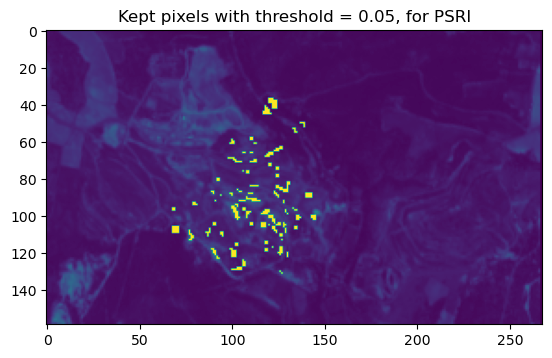

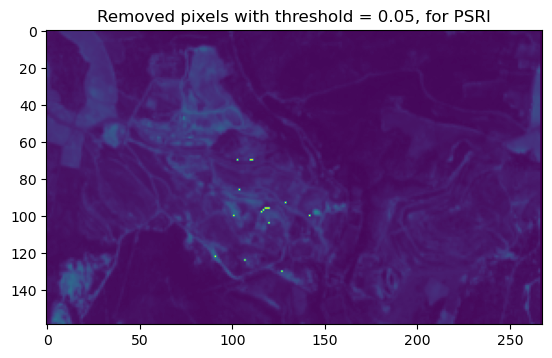

Le nombre de pixels supprimés, avec threshold = 0.05, est de : 16
On trouve bien le même nombre de pixels supprimés qu'avec le graphique.


In [105]:
with rasterio.open('DATA_S2_extrait/SENTINEL2A_20160521-105553-553_L2A_T31TDJ_D_V1-1_FRE_extrait_stack_gain.bsq') as src:
    # On lit les données en tant que tableau numpy
    data = src.read()
    for i in range(len(liste)):
        for j in range(len(bande_rouge_16_spring[i])):
            if(coord_2_kept_float[i][0][j]!=0):
                data[2,int(coord_2_kept_float[i][0][j]),int(coord_2_kept_float[i][1][j])]=1
            
    # On écrit les nouvelles données dans un nouveau fichier raster
    with rasterio.open('nouveau_fichier.bsq', 'w', **src.profile) as dst:
        dst.write(data)
    
    # On lit le canal modifié à partir du nouveau fichier raster et l'afficher
    with rasterio.open('nouveau_fichier.bsq') as src:
        plt.imshow(src.read(3))
        plt.title("Kept pixels with threshold = 0.05, for PSRI")
        plt.show()

with rasterio.open('DATA_S2_extrait/SENTINEL2A_20160521-105553-553_L2A_T31TDJ_D_V1-1_FRE_extrait_stack_gain.bsq') as src:
    # On lit les données en tant que tableau numpy
    data = src.read()
    compteur=0
    for i in range(len(liste)):
        for j in range(len(bande_rouge_16_spring[i])):
            if(coord_2_removed_float[i][0][j]!=0):
                compteur+=1
                data[2,int(coord_2_removed_float[i][0][j]),int(coord_2_removed_float[i][1][j])]=1
            
    # On écrit les nouvelles données dans un nouveau fichier raster
    with rasterio.open('PSRI=0.05_2016_spring.tif', 'w', **src.profile) as dst:
        dst.write(data)
    
    # On lit le canal modifié à partir du nouveau fichier raster et l'afficher
    with rasterio.open('PSRI=0.05_2016_spring.tif') as src:
        plt.imshow(src.read(3))
        plt.title("Removed pixels with threshold = 0.05, for PSRI")
        plt.show()
        print("Le nombre de pixels supprimés, avec threshold = 0.05, est de :",compteur) 
        print("On trouve bien le même nombre de pixels supprimés qu'avec le graphique.")

In [106]:
coord=[]
for i in range(len(liste)):
    poly=gdf.iloc[i]['geometry'].geoms[0]
    poly_transformed = mapping(poly)
    poly_pixels = rasterio.features.geometry_mask([poly_transformed], out_shape=(height, width), transform=transform, invert=True)
    pixels_inside_poly = image[poly_pixels]
    coord.append((np.where(poly_pixels==True)))

PSRI_16_summer_2=np.copy(coord)
PSRI_20_summer_2=np.copy(coord)
PSRI_16_summer_2_float = [[arr.astype(float) for arr in sublst] for sublst in PSRI_16_summer_2]
PSRI_20_summer_2_float = [[arr.astype(float) for arr in sublst] for sublst in PSRI_20_summer_2]

for i in range(len(liste)):
    for j in range(len(bande_rouge_16_summer[i])):
        PSRI_16_summer_2_float[i][0][j]=(bande_rouge_16_summer[i][j]-bande_verte_16_summer[i][j])/bande_infrarouge_16_summer[i][j]
        PSRI_20_summer_2_float[i][0][j]=(bande_rouge_20_summer[i][j]-bande_verte_20_summer[i][j])/bande_infrarouge_20_summer[i][j]

distances_PSRI_2_float=np.copy(PSRI_16_summer_2_float)
coord_2_kept=np.copy(coord)
coord_2_removed=np.copy(coord)
coord_2_kept_float = [[arr.astype(float) for arr in sublst] for sublst in coord_2_kept]
coord_2_removed_float = [[arr.astype(float) for arr in sublst] for sublst in coord_2_removed]

threshold=0.05
for i in range(len(liste)):
    for j in range(len(bande_rouge_16_summer[i])):
        distances_PSRI_2_float[i][0][j]=distances_PSRI_2_float[i][1][j]=(distance_point_droite(a3,b3,PSRI_16_summer_2_float[i][0][j],PSRI_20_summer_2_float[i][0][j]))
        if distances_PSRI_2_float[i][0][j]>threshold:
            #On supprime les coordonnées dans le vecteur des coordonnées gardées, on garde dans le vecteur des coordonnées supprimées
            coord_2_kept_float[i][0][j]=coord_2_kept_float[i][1][j]=0.0
        else :
            #On supprime les coordonnées dans le vecteur des coordonnées supprimées, on garde dans le vecteur des coordonnées gardées
            coord_2_removed_float[i][0][j]=coord_2_removed_float[i][1][j]=0.0

C:\Users\duval\anaconda3\lib\site-packages\numpy\lib\function_base.py:804: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, order=order, subok=subok, copy=True)


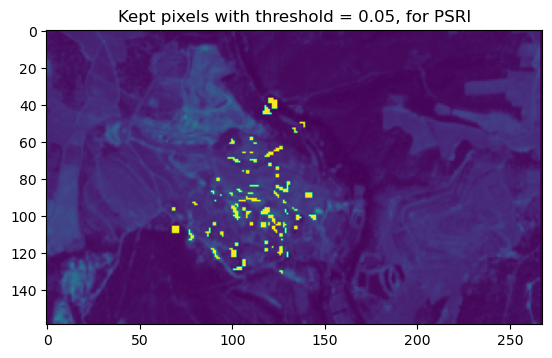

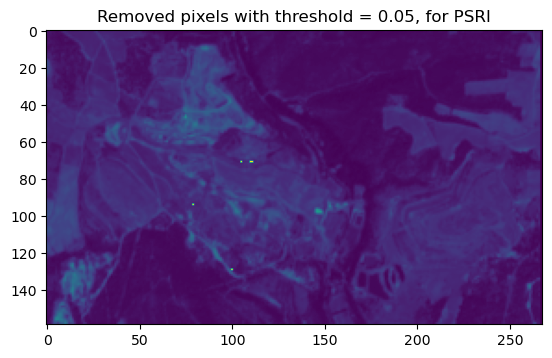

Le nombre de pixels supprimés, avec threshold = 0.05, est de : 5
On trouve bien le même nombre de pixels supprimés qu'avec le graphique.


In [107]:
with rasterio.open('SENTINEL2A_20160826-104023-461_L2A_T31TDJ_D_V1-1_FRE_extrait_stack_gain.bsq') as src:
    # On lit les données en tant que tableau numpy
    data = src.read()
    for i in range(len(liste)):
        for j in range(len(bande_rouge_16_summer[i])):
            if(coord_2_kept_float[i][0][j]!=0):
                data[2,int(coord_2_kept_float[i][0][j]),int(coord_2_kept_float[i][1][j])]=1
            
    # On écrit les nouvelles données dans un nouveau fichier raster
    with rasterio.open('nouveau_fichier.bsq', 'w', **src.profile) as dst:
        dst.write(data)
    
    # On lit le canal modifié à partir du nouveau fichier raster et l'afficher
    with rasterio.open('nouveau_fichier.bsq') as src:
        plt.imshow(src.read(3))
        plt.title("Kept pixels with threshold = 0.05, for PSRI")
        plt.show()

with rasterio.open('SENTINEL2A_20160826-104023-461_L2A_T31TDJ_D_V1-1_FRE_extrait_stack_gain.bsq') as src:
    # On lit les données en tant que tableau numpy
    data = src.read()
    compteur=0
    for i in range(len(liste)):
        for j in range(len(bande_rouge_16_summer[i])):
            if(coord_2_removed_float[i][0][j]!=0):
                compteur+=1
                data[2,int(coord_2_removed_float[i][0][j]),int(coord_2_removed_float[i][1][j])]=1
            
    # On écrit les nouvelles données dans un nouveau fichier raster
    with rasterio.open('PSRI=0.05_2016_summer.tif', 'w', **src.profile) as dst:
        dst.write(data)
    
    # On lit le canal modifié à partir du nouveau fichier raster et l'afficher
    with rasterio.open('PSRI=0.05_2016_summer.tif') as src:
        plt.imshow(src.read(3))
        plt.title("Removed pixels with threshold = 0.05, for PSRI")
        plt.show()
        print("Le nombre de pixels supprimés, avec threshold = 0.05, est de :",compteur) 
        print("On trouve bien le même nombre de pixels supprimés qu'avec le graphique.")

In [108]:
coord=[]
for i in range(len(liste)):
    poly=gdf.iloc[i]['geometry'].geoms[0]
    poly_transformed = mapping(poly)
    poly_pixels = rasterio.features.geometry_mask([poly_transformed], out_shape=(height, width), transform=transform, invert=True)
    pixels_inside_poly = image[poly_pixels]
    coord.append((np.where(poly_pixels==True)))

PSRI_16_summer_2=np.copy(coord)
PSRI_20_summer_2=np.copy(coord)
PSRI_16_summer_2_float = [[arr.astype(float) for arr in sublst] for sublst in PSRI_16_summer_2]
PSRI_20_summer_2_float = [[arr.astype(float) for arr in sublst] for sublst in PSRI_20_summer_2]

for i in range(len(liste)):
    for j in range(len(bande_rouge_16_summer[i])):
        PSRI_16_summer_2_float[i][0][j]=(bande_rouge_16_summer[i][j]-bande_verte_16_summer[i][j])/bande_infrarouge_16_summer[i][j]
        PSRI_20_summer_2_float[i][0][j]=(bande_rouge_20_summer[i][j]-bande_verte_20_summer[i][j])/bande_infrarouge_20_summer[i][j]

distances_PSRI_2_float=np.copy(PSRI_16_summer_2_float)
coord_2_kept=np.copy(coord)
coord_2_removed=np.copy(coord)
coord_2_kept_float_psri_summer = [[arr.astype(float) for arr in sublst] for sublst in coord_2_kept]
coord_2_removed_float_psri_summer = [[arr.astype(float) for arr in sublst] for sublst in coord_2_removed]

threshold=0.04
for i in range(len(liste)):
    for j in range(len(bande_rouge_16_summer[i])):
        distances_PSRI_2_float[i][0][j]=distances_PSRI_2_float[i][1][j]=(distance_point_droite(a3,b3,PSRI_16_summer_2_float[i][0][j],PSRI_20_summer_2_float[i][0][j]))
        if distances_PSRI_2_float[i][0][j]>threshold:
            #On supprime les coordonnées dans le vecteur des coordonnées gardées, on garde dans le vecteur des coordonnées supprimées
            coord_2_kept_float_psri_summer[i][0][j]=coord_2_kept_float_psri_summer[i][1][j]=0.0
        else :
            #On supprime les coordonnées dans le vecteur des coordonnées supprimées, on garde dans le vecteur des coordonnées gardées
            coord_2_removed_float_psri_summer[i][0][j]=coord_2_removed_float_psri_summer[i][1][j]=0.0

C:\Users\duval\anaconda3\lib\site-packages\numpy\lib\function_base.py:804: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, order=order, subok=subok, copy=True)


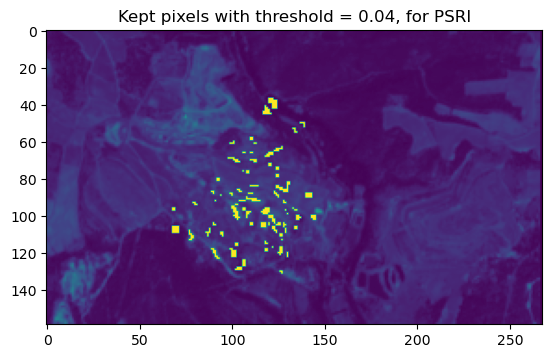

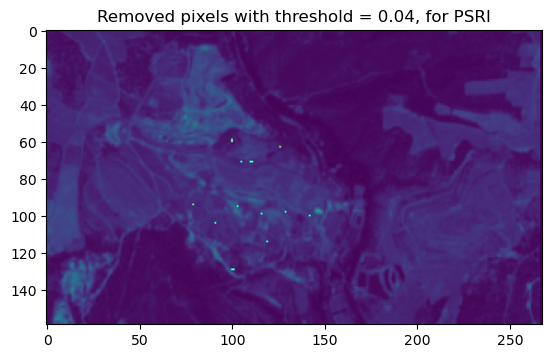

Le nombre de pixels supprimés, avec threshold = 0.04, est de : 15
On trouve bien le même nombre de pixels supprimés qu'avec le graphique.


In [109]:
with rasterio.open('SENTINEL2A_20160826-104023-461_L2A_T31TDJ_D_V1-1_FRE_extrait_stack_gain.bsq') as src:
    # On lit les données en tant que tableau numpy
    data = src.read()
    for i in range(len(liste)):
        for j in range(len(bande_rouge_16_summer[i])):
            if(coord_2_kept_float_psri_summer[i][0][j]!=0):
                data[2,int(coord_2_kept_float_psri_summer[i][0][j]),int(coord_2_kept_float_psri_summer[i][1][j])]=1
            
    # On écrit les nouvelles données dans un nouveau fichier raster
    with rasterio.open('nouveau_fichier.bsq', 'w', **src.profile) as dst:
        dst.write(data)
    
    # On lit le canal modifié à partir du nouveau fichier raster et l'afficher
    with rasterio.open('nouveau_fichier.bsq') as src:
        plt.imshow(src.read(3))
        plt.title("Kept pixels with threshold = 0.04, for PSRI")
        plt.show()

with rasterio.open('SENTINEL2A_20160826-104023-461_L2A_T31TDJ_D_V1-1_FRE_extrait_stack_gain.bsq') as src:
    # On lit les données en tant que tableau numpy
    data = src.read()
    compteur=0
    for i in range(len(liste)):
        for j in range(len(bande_rouge_16_summer[i])):
            if(coord_2_removed_float_psri_summer[i][0][j]!=0):
                compteur+=1
                data[2,int(coord_2_removed_float_psri_summer[i][0][j]),int(coord_2_removed_float_psri_summer[i][1][j])]=1
            
    # On écrit les nouvelles données dans un nouveau fichier raster
    with rasterio.open('PSRI=0.04_2016_summer.tif', 'w', **src.profile) as dst:
        dst.write(data)
    
    # On lit le canal modifié à partir du nouveau fichier raster et l'afficher
    with rasterio.open('PSRI=0.04_2016_summer.tif') as src:
        plt.imshow(src.read(3))
        plt.title("Removed pixels with threshold = 0.04, for PSRI")
        plt.show()
        print("Le nombre de pixels supprimés, avec threshold = 0.04, est de :",compteur) 
        print("On trouve bien le même nombre de pixels supprimés qu'avec le graphique.")

In [110]:
coord=[]
for i in range(len(liste)):
    poly=gdf.iloc[i]['geometry'].geoms[0]
    poly_transformed = mapping(poly)
    poly_pixels = rasterio.features.geometry_mask([poly_transformed], out_shape=(height, width), transform=transform, invert=True)
    pixels_inside_poly = image[poly_pixels]
    coord.append((np.where(poly_pixels==True)))

PSRI_16_summer_2=np.copy(coord)
PSRI_20_summer_2=np.copy(coord)
PSRI_16_summer_2_float = [[arr.astype(float) for arr in sublst] for sublst in PSRI_16_summer_2]
PSRI_20_summer_2_float = [[arr.astype(float) for arr in sublst] for sublst in PSRI_20_summer_2]

for i in range(len(liste)):
    for j in range(len(bande_rouge_16_summer[i])):
        PSRI_16_summer_2_float[i][0][j]=(bande_rouge_16_summer[i][j]-bande_verte_16_summer[i][j])/bande_infrarouge_16_summer[i][j]
        PSRI_20_summer_2_float[i][0][j]=(bande_rouge_20_summer[i][j]-bande_verte_20_summer[i][j])/bande_infrarouge_20_summer[i][j]

distances_PSRI_2_float=np.copy(PSRI_16_summer_2_float)
coord_2_kept=np.copy(coord)
coord_2_removed=np.copy(coord)
coord_2_kept_float = [[arr.astype(float) for arr in sublst] for sublst in coord_2_kept]
coord_2_removed_float = [[arr.astype(float) for arr in sublst] for sublst in coord_2_removed]

threshold=0.03
for i in range(len(liste)):
    for j in range(len(bande_rouge_16_summer[i])):
        distances_PSRI_2_float[i][0][j]=distances_PSRI_2_float[i][1][j]=(distance_point_droite(a3,b3,PSRI_16_summer_2_float[i][0][j],PSRI_20_summer_2_float[i][0][j]))
        if distances_PSRI_2_float[i][0][j]>threshold:
            #On supprime les coordonnées dans le vecteur des coordonnées gardées, on garde dans le vecteur des coordonnées supprimées
            coord_2_kept_float[i][0][j]=coord_2_kept_float[i][1][j]=0.0
        else :
            #On supprime les coordonnées dans le vecteur des coordonnées supprimées, on garde dans le vecteur des coordonnées gardées
            coord_2_removed_float[i][0][j]=coord_2_removed_float[i][1][j]=0.0

C:\Users\duval\anaconda3\lib\site-packages\numpy\lib\function_base.py:804: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, order=order, subok=subok, copy=True)


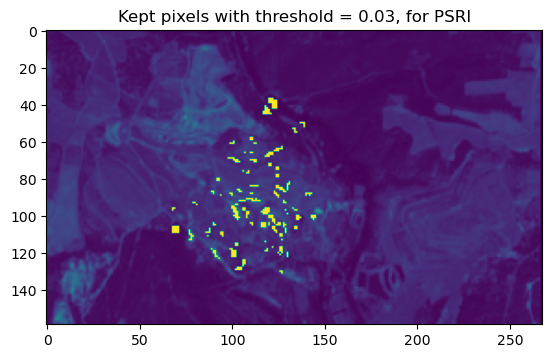

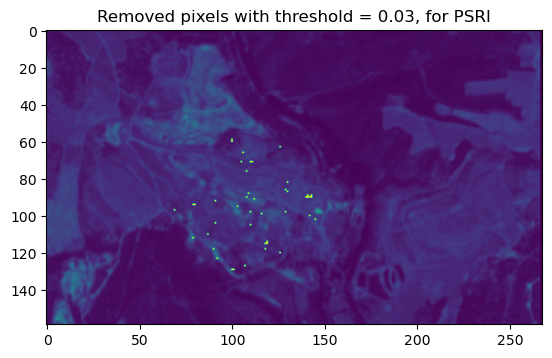

Le nombre de pixels supprimés, avec threshold = 0.03, est de : 44
On trouve bien le même nombre de pixels supprimés qu'avec le graphique.


In [111]:
with rasterio.open('SENTINEL2A_20160826-104023-461_L2A_T31TDJ_D_V1-1_FRE_extrait_stack_gain.bsq') as src:
    # On lit les données en tant que tableau numpy
    data = src.read()
    for i in range(len(liste)):
        for j in range(len(bande_rouge_16_summer[i])):
            if(coord_2_kept_float[i][0][j]!=0):
                data[2,int(coord_2_kept_float[i][0][j]),int(coord_2_kept_float[i][1][j])]=1
            
    # On écrit les nouvelles données dans un nouveau fichier raster
    with rasterio.open('nouveau_fichier.bsq', 'w', **src.profile) as dst:
        dst.write(data)
    
    # On lit le canal modifié à partir du nouveau fichier raster et l'afficher
    with rasterio.open('nouveau_fichier.bsq') as src:
        plt.imshow(src.read(3))
        plt.title("Kept pixels with threshold = 0.03, for PSRI")
        plt.show()

with rasterio.open('SENTINEL2A_20160826-104023-461_L2A_T31TDJ_D_V1-1_FRE_extrait_stack_gain.bsq') as src:
    # On lit les données en tant que tableau numpy
    data = src.read()
    compteur=0
    for i in range(len(liste)):
        for j in range(len(bande_rouge_16_summer[i])):
            if(coord_2_removed_float[i][0][j]!=0):
                compteur+=1
                data[2,int(coord_2_removed_float[i][0][j]),int(coord_2_removed_float[i][1][j])]=1
            
    # On écrit les nouvelles données dans un nouveau fichier raster
    with rasterio.open('PSRI=0.03_2016_summer.tif', 'w', **src.profile) as dst:
        dst.write(data)
    
    # On lit le canal modifié à partir du nouveau fichier raster et l'afficher
    with rasterio.open('PSRI=0.03_2016_summer.tif') as src:
        plt.imshow(src.read(3))
        plt.title("Removed pixels with threshold = 0.03, for PSRI")
        plt.show()
        print("Le nombre de pixels supprimés, avec threshold = 0.03, est de :",compteur) 
        print("On trouve bien le même nombre de pixels supprimés qu'avec le graphique.")

In [112]:
coord=[]
for i in range(len(liste)):
    poly=gdf.iloc[i]['geometry'].geoms[0]
    poly_transformed = mapping(poly)
    poly_pixels = rasterio.features.geometry_mask([poly_transformed], out_shape=(height, width), transform=transform, invert=True)
    pixels_inside_poly = image[poly_pixels]
    coord.append((np.where(poly_pixels==True)))

PSRI_16_autumn_2=np.copy(coord)
PSRI_20_autumn_2=np.copy(coord)
PSRI_16_autumn_2_float = [[arr.astype(float) for arr in sublst] for sublst in PSRI_16_autumn_2]
PSRI_20_autumn_2_float = [[arr.astype(float) for arr in sublst] for sublst in PSRI_20_autumn_2]

for i in range(len(liste)):
    for j in range(len(bande_rouge_16_autumn[i])):
        PSRI_16_autumn_2_float[i][0][j]=(bande_rouge_16_autumn[i][j]-bande_verte_16_autumn[i][j])/bande_infrarouge_16_autumn[i][j]
        PSRI_20_autumn_2_float[i][0][j]=(bande_rouge_20_autumn[i][j]-bande_verte_20_autumn[i][j])/bande_infrarouge_20_autumn[i][j]

distances_PSRI_2_float=np.copy(PSRI_16_autumn_2_float)
coord_2_kept=np.copy(coord)
coord_2_removed=np.copy(coord)
coord_2_kept_float = [[arr.astype(float) for arr in sublst] for sublst in coord_2_kept]
coord_2_removed_float = [[arr.astype(float) for arr in sublst] for sublst in coord_2_removed]

threshold=0.05
for i in range(len(liste)):
    for j in range(len(bande_rouge_16_autumn[i])):
        distances_PSRI_2_float[i][0][j]=distances_PSRI_2_float[i][1][j]=(distance_point_droite(a7,b7,PSRI_16_autumn_2_float[i][0][j],PSRI_20_autumn_2_float[i][0][j]))
        if distances_PSRI_2_float[i][0][j]>threshold:
            #On supprime les coordonnées dans le vecteur des coordonnées gardées, on garde dans le vecteur des coordonnées supprimées
            coord_2_kept_float[i][0][j]=coord_2_kept_float[i][1][j]=0.0
        else :
            #On supprime les coordonnées dans le vecteur des coordonnées supprimées, on garde dans le vecteur des coordonnées gardées
            coord_2_removed_float[i][0][j]=coord_2_removed_float[i][1][j]=0.0

C:\Users\duval\anaconda3\lib\site-packages\numpy\lib\function_base.py:804: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, order=order, subok=subok, copy=True)


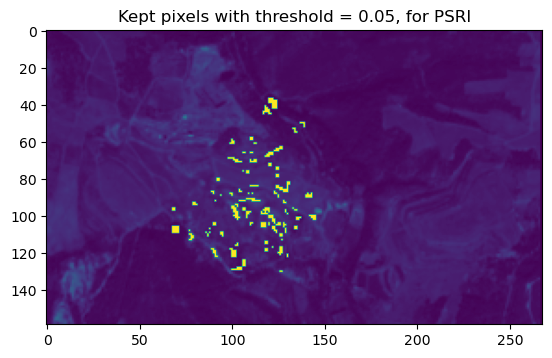

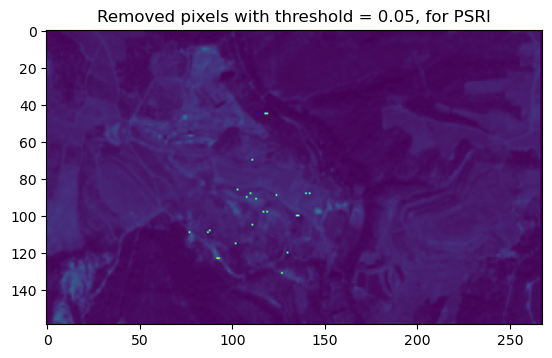

Le nombre de pixels supprimés, avec threshold = 0.05, est de : 23
On trouve bien le même nombre de pixels supprimés qu'avec le graphique.


In [113]:
with rasterio.open('SENTINEL2A_20161015-104513-300_L2A_T31TDJ_D_V1-1_FRE_extrait_stack_gain.bsq') as src:
    # On lit les données en tant que tableau numpy
    data = src.read()
    for i in range(len(liste)):
        for j in range(len(bande_rouge_16_autumn[i])):
            if(coord_2_kept_float[i][0][j]!=0):
                data[2,int(coord_2_kept_float[i][0][j]),int(coord_2_kept_float[i][1][j])]=1
            
    # On écrit les nouvelles données dans un nouveau fichier raster
    with rasterio.open('nouveau_fichier.bsq', 'w', **src.profile) as dst:
        dst.write(data)
    
    # On lit le canal modifié à partir du nouveau fichier raster et l'afficher
    with rasterio.open('nouveau_fichier.bsq') as src:
        plt.imshow(src.read(3))
        plt.title("Kept pixels with threshold = 0.05, for PSRI")
        plt.show()

with rasterio.open('SENTINEL2A_20161015-104513-300_L2A_T31TDJ_D_V1-1_FRE_extrait_stack_gain.bsq') as src:
    # On lit les données en tant que tableau numpy
    data = src.read()
    compteur=0
    for i in range(len(liste)):
        for j in range(len(bande_rouge_16_autumn[i])):
            if(coord_2_removed_float[i][0][j]!=0):
                compteur+=1
                data[2,int(coord_2_removed_float[i][0][j]),int(coord_2_removed_float[i][1][j])]=1
            
    # On écrit les nouvelles données dans un nouveau fichier raster
    with rasterio.open('PSRI=0.05_2016_autumn.tif', 'w', **src.profile) as dst:
        dst.write(data)
    
    # On lit le canal modifié à partir du nouveau fichier raster et l'afficher
    with rasterio.open('PSRI=0.05_2016_autumn.tif') as src:
        plt.imshow(src.read(3))
        plt.title("Removed pixels with threshold = 0.05, for PSRI")
        plt.show()
        print("Le nombre de pixels supprimés, avec threshold = 0.05, est de :",compteur) 
        print("On trouve bien le même nombre de pixels supprimés qu'avec le graphique.")


In [114]:
coord=[]
for i in range(len(liste)):
    poly=gdf.iloc[i]['geometry'].geoms[0]
    poly_transformed = mapping(poly)
    poly_pixels = rasterio.features.geometry_mask([poly_transformed], out_shape=(height, width), transform=transform, invert=True)
    pixels_inside_poly = image[poly_pixels]
    coord.append((np.where(poly_pixels==True)))

PSRI_16_autumn_2=np.copy(coord)
PSRI_20_autumn_2=np.copy(coord)
PSRI_16_autumn_2_float = [[arr.astype(float) for arr in sublst] for sublst in PSRI_16_autumn_2]
PSRI_20_autumn_2_float = [[arr.astype(float) for arr in sublst] for sublst in PSRI_20_autumn_2]

for i in range(len(liste)):
    for j in range(len(bande_rouge_16_autumn[i])):
        PSRI_16_autumn_2_float[i][0][j]=(bande_rouge_16_autumn[i][j]-bande_verte_16_autumn[i][j])/bande_infrarouge_16_autumn[i][j]
        PSRI_20_autumn_2_float[i][0][j]=(bande_rouge_20_autumn[i][j]-bande_verte_20_autumn[i][j])/bande_infrarouge_20_autumn[i][j]

distances_PSRI_2_float=np.copy(PSRI_16_autumn_2_float)
coord_2_kept=np.copy(coord)
coord_2_removed=np.copy(coord)
coord_2_kept_float_psri_autumn = [[arr.astype(float) for arr in sublst] for sublst in coord_2_kept]
coord_2_removed_float_psri_autumn = [[arr.astype(float) for arr in sublst] for sublst in coord_2_removed]

threshold=0.04
for i in range(len(liste)):
    for j in range(len(bande_rouge_16_autumn[i])):
        distances_PSRI_2_float[i][0][j]=distances_PSRI_2_float[i][1][j]=(distance_point_droite(a7,b7,PSRI_16_autumn_2_float[i][0][j],PSRI_20_autumn_2_float[i][0][j]))
        if distances_PSRI_2_float[i][0][j]>threshold:
            #On supprime les coordonnées dans le vecteur des coordonnées gardées, on garde dans le vecteur des coordonnées supprimées
            coord_2_kept_float_psri_autumn[i][0][j]=coord_2_kept_float_psri_autumn[i][1][j]=0.0
        else :
            #On supprime les coordonnées dans le vecteur des coordonnées supprimées, on garde dans le vecteur des coordonnées gardées
            coord_2_removed_float_psri_autumn[i][0][j]=coord_2_removed_float_psri_autumn[i][1][j]=0.0

C:\Users\duval\anaconda3\lib\site-packages\numpy\lib\function_base.py:804: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, order=order, subok=subok, copy=True)


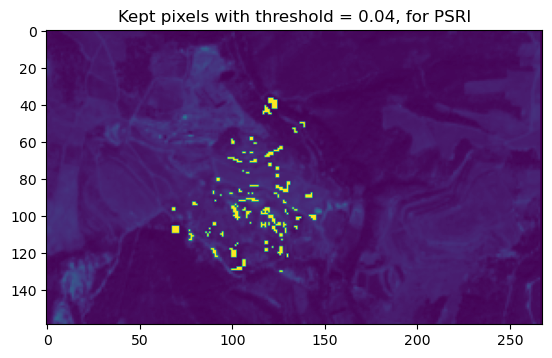

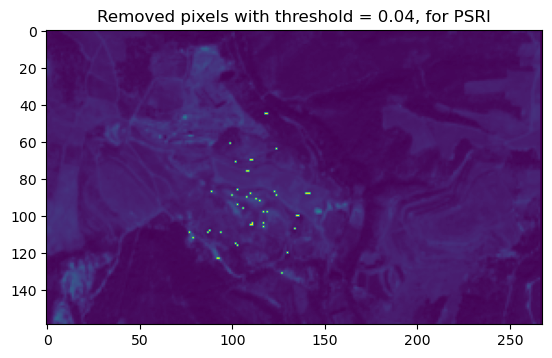

Le nombre de pixels supprimés, avec threshold = 0.04, est de : 44
On trouve bien le même nombre de pixels supprimés qu'avec le graphique.


In [115]:
with rasterio.open('SENTINEL2A_20161015-104513-300_L2A_T31TDJ_D_V1-1_FRE_extrait_stack_gain.bsq') as src:
    # On lit les données en tant que tableau numpy
    data = src.read()
    for i in range(len(liste)):
        for j in range(len(bande_rouge_16_autumn[i])):
            if(coord_2_kept_float_psri_autumn[i][0][j]!=0):
                data[2,int(coord_2_kept_float_psri_autumn[i][0][j]),int(coord_2_kept_float_psri_autumn[i][1][j])]=1
            
    # On écrit les nouvelles données dans un nouveau fichier raster
    with rasterio.open('nouveau_fichier.bsq', 'w', **src.profile) as dst:
        dst.write(data)
    
    # On lit le canal modifié à partir du nouveau fichier raster et l'afficher
    with rasterio.open('nouveau_fichier.bsq') as src:
        plt.imshow(src.read(3))
        plt.title("Kept pixels with threshold = 0.04, for PSRI")
        plt.show()

with rasterio.open('SENTINEL2A_20161015-104513-300_L2A_T31TDJ_D_V1-1_FRE_extrait_stack_gain.bsq') as src:
    # On lit les données en tant que tableau numpy
    data = src.read()
    compteur=0
    for i in range(len(liste)):
        for j in range(len(bande_rouge_16_autumn[i])):
            if(coord_2_removed_float_psri_autumn[i][0][j]!=0):
                compteur+=1
                data[2,int(coord_2_removed_float_psri_autumn[i][0][j]),int(coord_2_removed_float_psri_autumn[i][1][j])]=1
            
    # On écrit les nouvelles données dans un nouveau fichier raster
    with rasterio.open('PSRI=0.04_2016_autumn.tif', 'w', **src.profile) as dst:
        dst.write(data)
    
    # On lit le canal modifié à partir du nouveau fichier raster et l'afficher
    with rasterio.open('PSRI=0.04_2016_autumn.tif') as src:
        plt.imshow(src.read(3))
        plt.title("Removed pixels with threshold = 0.04, for PSRI")
        plt.show()
        print("Le nombre de pixels supprimés, avec threshold = 0.04, est de :",compteur) 
        print("On trouve bien le même nombre de pixels supprimés qu'avec le graphique.")

In [116]:
coord=[]
for i in range(len(liste)):
    poly=gdf.iloc[i]['geometry'].geoms[0]
    poly_transformed = mapping(poly)
    poly_pixels = rasterio.features.geometry_mask([poly_transformed], out_shape=(height, width), transform=transform, invert=True)
    pixels_inside_poly = image[poly_pixels]
    coord.append((np.where(poly_pixels==True)))

PSRI_16_autumn_2=np.copy(coord)
PSRI_20_autumn_2=np.copy(coord)
PSRI_16_autumn_2_float = [[arr.astype(float) for arr in sublst] for sublst in PSRI_16_autumn_2]
PSRI_20_autumn_2_float = [[arr.astype(float) for arr in sublst] for sublst in PSRI_20_autumn_2]

for i in range(len(liste)):
    for j in range(len(bande_rouge_16_autumn[i])):
        PSRI_16_autumn_2_float[i][0][j]=(bande_rouge_16_autumn[i][j]-bande_verte_16_autumn[i][j])/bande_infrarouge_16_autumn[i][j]
        PSRI_20_autumn_2_float[i][0][j]=(bande_rouge_20_autumn[i][j]-bande_verte_20_autumn[i][j])/bande_infrarouge_20_autumn[i][j]

distances_PSRI_2_float=np.copy(PSRI_16_autumn_2_float)
coord_2_kept=np.copy(coord)
coord_2_removed=np.copy(coord)
coord_2_kept_float = [[arr.astype(float) for arr in sublst] for sublst in coord_2_kept]
coord_2_removed_float = [[arr.astype(float) for arr in sublst] for sublst in coord_2_removed]

threshold=0.03
for i in range(len(liste)):
    for j in range(len(bande_rouge_16_autumn[i])):
        distances_PSRI_2_float[i][0][j]=distances_PSRI_2_float[i][1][j]=(distance_point_droite(a7,b7,PSRI_16_autumn_2_float[i][0][j],PSRI_20_autumn_2_float[i][0][j]))
        if distances_PSRI_2_float[i][0][j]>threshold:
            #On supprime les coordonnées dans le vecteur des coordonnées gardées, on garde dans le vecteur des coordonnées supprimées
            coord_2_kept_float[i][0][j]=coord_2_kept_float[i][1][j]=0.0
        else :
            #On supprime les coordonnées dans le vecteur des coordonnées supprimées, on garde dans le vecteur des coordonnées gardées
            coord_2_removed_float[i][0][j]=coord_2_removed_float[i][1][j]=0.0

C:\Users\duval\anaconda3\lib\site-packages\numpy\lib\function_base.py:804: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, order=order, subok=subok, copy=True)


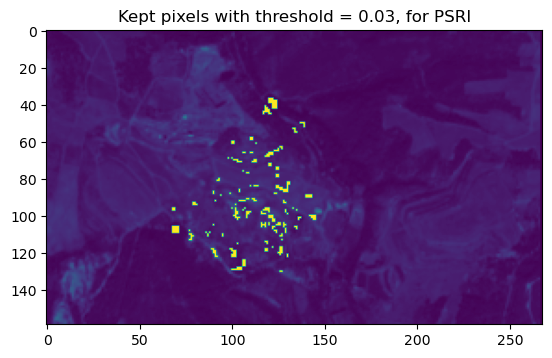

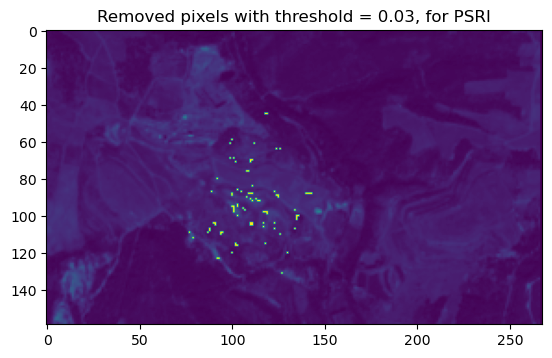

Le nombre de pixels supprimés, avec threshold = 0.03, est de : 88
On trouve bien le même nombre de pixels supprimés qu'avec le graphique.


In [117]:
with rasterio.open('SENTINEL2A_20161015-104513-300_L2A_T31TDJ_D_V1-1_FRE_extrait_stack_gain.bsq') as src:
    # On lit les données en tant que tableau numpy
    data = src.read()
    for i in range(len(liste)):
        for j in range(len(bande_rouge_16_autumn[i])):
            if(coord_2_kept_float[i][0][j]!=0):
                data[2,int(coord_2_kept_float[i][0][j]),int(coord_2_kept_float[i][1][j])]=1
            
    # On écrit les nouvelles données dans un nouveau fichier raster
    with rasterio.open('nouveau_fichier.bsq', 'w', **src.profile) as dst:
        dst.write(data)
    
    # On lit le canal modifié à partir du nouveau fichier raster et l'afficher
    with rasterio.open('nouveau_fichier.bsq') as src:
        plt.imshow(src.read(3))
        plt.title("Kept pixels with threshold = 0.03, for PSRI")
        plt.show()

with rasterio.open('SENTINEL2A_20161015-104513-300_L2A_T31TDJ_D_V1-1_FRE_extrait_stack_gain.bsq') as src:
    # On lit les données en tant que tableau numpy
    data = src.read()
    compteur=0
    for i in range(len(liste)):
        for j in range(len(bande_rouge_16_autumn[i])):
            if(coord_2_removed_float[i][0][j]!=0):
                compteur+=1
                data[2,int(coord_2_removed_float[i][0][j]),int(coord_2_removed_float[i][1][j])]=1
            
    # On écrit les nouvelles données dans un nouveau fichier raster
    with rasterio.open('PSRI=0.03_2016_autumn.tif', 'w', **src.profile) as dst:
        dst.write(data)
    
    # On lit le canal modifié à partir du nouveau fichier raster et l'afficher
    with rasterio.open('PSRI=0.03_2016_autumn.tif') as src:
        plt.imshow(src.read(3))
        plt.title("Removed pixels with threshold = 0.03, for PSRI")
        plt.show()
        print("Le nombre de pixels supprimés, avec threshold = 0.03, est de :",compteur) 
        print("On trouve bien le même nombre de pixels supprimés qu'avec le graphique.")

In [118]:
coord=[]
for i in range(len(liste)):
    poly=gdf.iloc[i]['geometry'].geoms[0]
    poly_transformed = mapping(poly)
    poly_pixels = rasterio.features.geometry_mask([poly_transformed], out_shape=(height, width), transform=transform, invert=True)
    pixels_inside_poly = image[poly_pixels]
    coord.append((np.where(poly_pixels==True)))

IRECI_16_summer_2=np.copy(coord)
IRECI_20_summer_2=np.copy(coord)
IRECI_16_summer_2_float = [[arr.astype(float) for arr in sublst] for sublst in IRECI_16_summer_2]
IRECI_20_summer_2_float = [[arr.astype(float) for arr in sublst] for sublst in IRECI_20_summer_2]

for i in range(len(liste)):
    for j in range(len(bande_rouge_16_summer[i])):
        IRECI_16_summer_2_float[i][0][j]=(bande_infrarouge_16_summer_ireci[i][j] - bande_rouge_16_summer[i][j])/(bande_RE1_16_summer[i][j]/bande_RE2_16_summer[i][j])
        IRECI_20_summer_2_float[i][0][j]=(bande_infrarouge_20_summer_ireci[i][j] - bande_rouge_20_summer[i][j])/(bande_RE1_20_summer[i][j]/bande_RE2_20_summer[i][j])

distances_IRECI_2_float=np.copy(IRECI_16_summer_2_float)
coord_2_kept=np.copy(coord)
coord_2_removed=np.copy(coord)
coord_2_kept_float = [[arr.astype(float) for arr in sublst] for sublst in coord_2_kept]
coord_2_removed_float = [[arr.astype(float) for arr in sublst] for sublst in coord_2_removed]

threshold=0.03
for i in range(len(liste)):
    for j in range(len(bande_rouge_16_summer[i])):
        distances_IRECI_2_float[i][0][j]=distances_IRECI_2_float[i][1][j]=(distance_point_droite(a9,b9,IRECI_16_summer_2_float[i][0][j],IRECI_20_summer_2_float[i][0][j]))
        if distances_IRECI_2_float[i][0][j]>threshold:
            #On supprime les coordonnées dans le vecteur des coordonnées gardées, on garde dans le vecteur des coordonnées supprimées
            coord_2_kept_float[i][0][j]=coord_2_kept_float[i][1][j]=0.0
        else :
            #On supprime les coordonnées dans le vecteur des coordonnées supprimées, on garde dans le vecteur des coordonnées gardées
            coord_2_removed_float[i][0][j]=coord_2_removed_float[i][1][j]=0.0

C:\Users\duval\anaconda3\lib\site-packages\numpy\lib\function_base.py:804: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, order=order, subok=subok, copy=True)


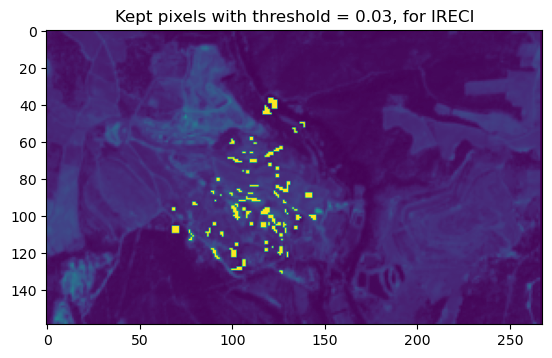

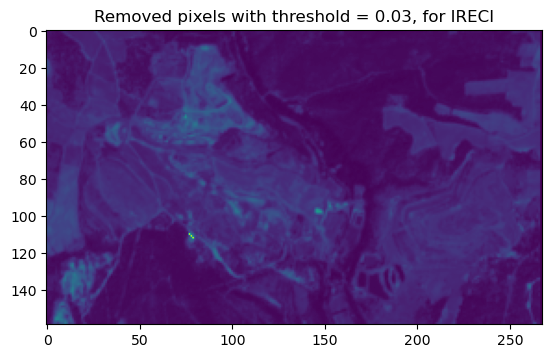

Le nombre de pixels supprimés, avec threshold = 0.03, est de : 3
On trouve bien le même nombre de pixels supprimés qu'avec le graphique.


In [119]:
with rasterio.open('SENTINEL2A_20160826-104023-461_L2A_T31TDJ_D_V1-1_FRE_extrait_stack_gain.bsq') as src:
    # On lit les données en tant que tableau numpy
    data = src.read()
    for i in range(len(liste)):
        for j in range(len(bande_rouge_16_summer[i])):
            if(coord_2_kept_float[i][0][j]!=0):
                data[2,int(coord_2_kept_float[i][0][j]),int(coord_2_kept_float[i][1][j])]=1
            
    # On écrit les nouvelles données dans un nouveau fichier raster
    with rasterio.open('nouveau_fichier.bsq', 'w', **src.profile) as dst:
        dst.write(data)
    
    # On lit le canal modifié à partir du nouveau fichier raster et l'afficher
    with rasterio.open('nouveau_fichier.bsq') as src:
        plt.imshow(src.read(3))
        plt.title("Kept pixels with threshold = 0.03, for IRECI")
        plt.show()

with rasterio.open('SENTINEL2A_20160826-104023-461_L2A_T31TDJ_D_V1-1_FRE_extrait_stack_gain.bsq') as src:
    # On lit les données en tant que tableau numpy
    data = src.read()
    compteur=0
    for i in range(len(liste)):
        for j in range(len(bande_rouge_16_summer[i])):
            if(coord_2_removed_float[i][0][j]!=0):
                compteur+=1
                data[2,int(coord_2_removed_float[i][0][j]),int(coord_2_removed_float[i][1][j])]=1
            
    # On écrit les nouvelles données dans un nouveau fichier raster
    with rasterio.open('IRECI=0.03_2016_summer.tif', 'w', **src.profile) as dst:
        dst.write(data)
    
    # On lit le canal modifié à partir du nouveau fichier raster et l'afficher
    with rasterio.open('IRECI=0.03_2016_summer.tif') as src:
        plt.imshow(src.read(3))
        plt.title("Removed pixels with threshold = 0.03, for IRECI")
        plt.show()
        print("Le nombre de pixels supprimés, avec threshold = 0.03, est de :",compteur) 
        print("On trouve bien le même nombre de pixels supprimés qu'avec le graphique.")

In [120]:
coord=[]
for i in range(len(liste)):
    poly=gdf.iloc[i]['geometry'].geoms[0]
    poly_transformed = mapping(poly)
    poly_pixels = rasterio.features.geometry_mask([poly_transformed], out_shape=(height, width), transform=transform, invert=True)
    pixels_inside_poly = image[poly_pixels]
    coord.append((np.where(poly_pixels==True)))

IRECI_16_autumn_2=np.copy(coord)
IRECI_20_autumn_2=np.copy(coord)
IRECI_16_autumn_2_float = [[arr.astype(float) for arr in sublst] for sublst in IRECI_16_autumn_2]
IRECI_20_autumn_2_float = [[arr.astype(float) for arr in sublst] for sublst in IRECI_20_autumn_2]

for i in range(len(liste)):
    for j in range(len(bande_rouge_16_autumn[i])):
        IRECI_16_autumn_2_float[i][0][j]=(bande_infrarouge_16_autumn_ireci[i][j] - bande_rouge_16_autumn[i][j])/(bande_RE1_16_autumn[i][j]/bande_RE2_16_autumn[i][j])
        IRECI_20_autumn_2_float[i][0][j]=(bande_infrarouge_20_autumn_ireci[i][j] - bande_rouge_20_autumn[i][j])/(bande_RE1_20_autumn[i][j]/bande_RE2_20_autumn[i][j])

distances_IRECI_2_float=np.copy(IRECI_16_autumn_2_float)
coord_2_kept=np.copy(coord)
coord_2_removed=np.copy(coord)
coord_2_kept_float = [[arr.astype(float) for arr in sublst] for sublst in coord_2_kept]
coord_2_removed_float = [[arr.astype(float) for arr in sublst] for sublst in coord_2_removed]

threshold=0.03
for i in range(len(liste)):
    for j in range(len(bande_rouge_16_autumn[i])):
        distances_IRECI_2_float[i][0][j]=distances_IRECI_2_float[i][1][j]=(distance_point_droite(a10,b10,IRECI_16_autumn_2_float[i][0][j],IRECI_20_autumn_2_float[i][0][j]))
        if distances_IRECI_2_float[i][0][j]>threshold:
            #On supprime les coordonnées dans le vecteur des coordonnées gardées, on garde dans le vecteur des coordonnées supprimées
            coord_2_kept_float[i][0][j]=coord_2_kept_float[i][1][j]=0.0
        else :
            #On supprime les coordonnées dans le vecteur des coordonnées supprimées, on garde dans le vecteur des coordonnées gardées
            coord_2_removed_float[i][0][j]=coord_2_removed_float[i][1][j]=0.0

C:\Users\duval\anaconda3\lib\site-packages\numpy\lib\function_base.py:804: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, order=order, subok=subok, copy=True)


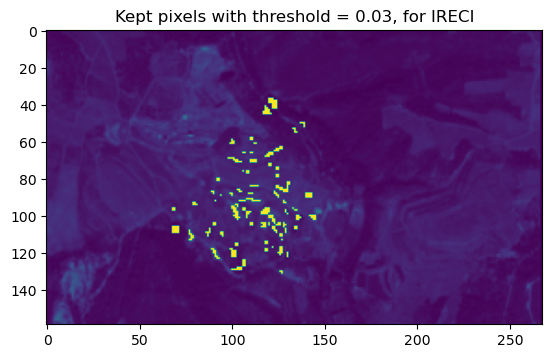

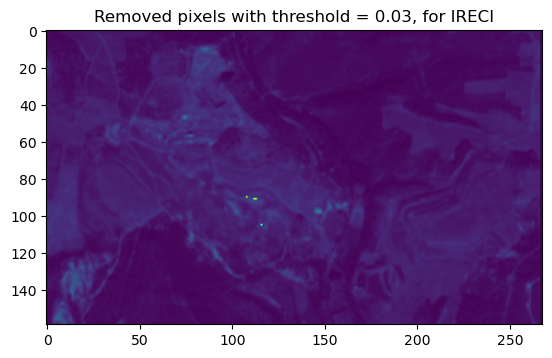

Le nombre de pixels supprimés, avec threshold = 0.03, est de : 4
On trouve bien le même nombre de pixels supprimés qu'avec le graphique.


In [121]:
with rasterio.open('SENTINEL2A_20161015-104513-300_L2A_T31TDJ_D_V1-1_FRE_extrait_stack_gain.bsq') as src:
    # On lit les données en tant que tableau numpy
    data = src.read()
    for i in range(len(liste)):
        for j in range(len(bande_rouge_16_autumn[i])):
            if(coord_2_kept_float[i][0][j]!=0):
                data[2,int(coord_2_kept_float[i][0][j]),int(coord_2_kept_float[i][1][j])]=1
            
    # On écrit les nouvelles données dans un nouveau fichier raster
    with rasterio.open('nouveau_fichier.bsq', 'w', **src.profile) as dst:
        dst.write(data)
    
    # On lit le canal modifié à partir du nouveau fichier raster et l'afficher
    with rasterio.open('nouveau_fichier.bsq') as src:
        plt.imshow(src.read(3))
        plt.title("Kept pixels with threshold = 0.03, for IRECI")
        plt.show()

with rasterio.open('SENTINEL2A_20161015-104513-300_L2A_T31TDJ_D_V1-1_FRE_extrait_stack_gain.bsq') as src:
    # On lit les données en tant que tableau numpy
    data = src.read()
    compteur=0
    for i in range(len(liste)):
        for j in range(len(bande_rouge_16_autumn[i])):
            if(coord_2_removed_float[i][0][j]!=0):
                compteur+=1
                data[2,int(coord_2_removed_float[i][0][j]),int(coord_2_removed_float[i][1][j])]=1
            
    # On écrit les nouvelles données dans un nouveau fichier raster
    with rasterio.open('IRECI=0.03_2016_autumn.tif', 'w', **src.profile) as dst:
        dst.write(data)
    
    # On lit le canal modifié à partir du nouveau fichier raster et l'afficher
    with rasterio.open('IRECI=0.03_2016_autumn.tif') as src:
        plt.imshow(src.read(3))
        plt.title("Removed pixels with threshold = 0.03, for IRECI")
        plt.show()
        print("Le nombre de pixels supprimés, avec threshold = 0.03, est de :",compteur) 
        print("On trouve bien le même nombre de pixels supprimés qu'avec le graphique.")

In [122]:
coord=[]
for i in range(len(liste)):
    poly=gdf.iloc[i]['geometry'].geoms[0]
    poly_transformed = mapping(poly)
    poly_pixels = rasterio.features.geometry_mask([poly_transformed], out_shape=(height, width), transform=transform, invert=True)
    pixels_inside_poly = image[poly_pixels]
    coord.append((np.where(poly_pixels==True)))

PSRI_16_summer_2=np.copy(coord)
PSRI_20_summer_2=np.copy(coord)
PSRI_16_summer_2_float = [[arr.astype(float) for arr in sublst] for sublst in PSRI_16_summer_2]
PSRI_20_summer_2_float = [[arr.astype(float) for arr in sublst] for sublst in PSRI_20_summer_2]

for i in range(len(liste)):
    for j in range(len(bande_rouge_16_summer[i])):
        PSRI_16_summer_2_float[i][0][j]=(bande_rouge_16_summer[i][j]-bande_verte_16_summer[i][j])/bande_infrarouge_16_summer[i][j]
        PSRI_20_summer_2_float[i][0][j]=(bande_rouge_20_summer[i][j]-bande_verte_20_summer[i][j])/bande_infrarouge_20_summer[i][j]

distances_PSRI_2_float_summer=np.copy(PSRI_16_summer_2_float)
coord_2_kept_PSRI_summer=np.copy(coord)
coord_2_removed_PSRI_summer=np.copy(coord)
coord_2_kept_float_PSRI_summer = [[arr.astype(float) for arr in sublst] for sublst in coord_2_kept_PSRI_summer]
coord_2_removed_float_PSRI_summer = [[arr.astype(float) for arr in sublst] for sublst in coord_2_removed_PSRI_summer]

threshold=0.04
for i in range(len(liste)):
    for j in range(len(bande_rouge_16_summer[i])):
        distances_PSRI_2_float_summer[i][0][j]=distances_PSRI_2_float_summer[i][1][j]=(distance_point_droite(a3,b3,PSRI_16_summer_2_float[i][0][j],PSRI_20_summer_2_float[i][0][j]))
        if distances_PSRI_2_float_summer[i][0][j]>threshold:
            #On supprime les coordonnées dans le vecteur des coordonnées gardées, on garde dans le vecteur des coordonnées supprimées
            coord_2_kept_float_PSRI_summer[i][0][j]=coord_2_kept_float_PSRI_summer[i][1][j]=0.0
        else :
            #On supprime les coordonnées dans le vecteur des coordonnées supprimées, on garde dans le vecteur des coordonnées gardées
            coord_2_removed_float_PSRI_summer[i][0][j]=coord_2_removed_float_PSRI_summer[i][1][j]=0.0

C:\Users\duval\anaconda3\lib\site-packages\numpy\lib\function_base.py:804: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, order=order, subok=subok, copy=True)


In [123]:
coord=[]
for i in range(len(liste)):
    poly=gdf.iloc[i]['geometry'].geoms[0]
    poly_transformed = mapping(poly)
    poly_pixels = rasterio.features.geometry_mask([poly_transformed], out_shape=(height, width), transform=transform, invert=True)
    pixels_inside_poly = image[poly_pixels]
    coord.append((np.where(poly_pixels==True)))

ndvi_16_autumn_2=np.copy(coord)
ndvi_20_autumn_2=np.copy(coord)
ndvi_16_autumn_2_float = [[arr.astype(float) for arr in sublst] for sublst in ndvi_16_autumn_2]
ndvi_20_autumn_2_float = [[arr.astype(float) for arr in sublst] for sublst in ndvi_20_autumn_2]

for i in range(len(liste)):
    for j in range(len(bande_rouge_16_autumn[i])):
        ndvi_16_autumn_2_float[i][0][j]=ndvi_16_autumn_2_float[i][1][j]=((bande_infrarouge_16_autumn[i][j] - bande_rouge_16_autumn[i][j]) / (bande_infrarouge_16_autumn[i][j] + bande_rouge_16_autumn[i][j]))
        ndvi_20_autumn_2_float[i][0][j]=ndvi_20_autumn_2_float[i][1][j]=((bande_infrarouge_20_autumn[i][j] - bande_rouge_20_autumn[i][j]) / (bande_infrarouge_20_autumn[i][j] + bande_rouge_20_autumn[i][j]))

distances_ndvi_2_float_autumn=np.copy(ndvi_16_autumn_2_float)
coord_2_kept_ndvi_autumn=np.copy(coord)
coord_2_removed_ndvi_autumn=np.copy(coord)
coord_2_kept_float_ndvi_autumn = [[arr.astype(float) for arr in sublst] for sublst in coord_2_kept_ndvi_autumn]
coord_2_removed_float_ndvi_autumn = [[arr.astype(float) for arr in sublst] for sublst in coord_2_removed_ndvi_autumn]

threshold=0.10
for i in range(len(liste)):
    for j in range(len(bande_rouge_16_autumn[i])):
        distances_ndvi_2_float_autumn[i][0][j]=distances_ndvi_2_float_autumn[i][1][j]=(distance_point_droite(a6,b6,ndvi_16_autumn_2_float[i][0][j],ndvi_20_autumn_2_float[i][0][j]))
        if distances_ndvi_2_float_autumn[i][0][j]>threshold:
            #On supprime les coordonnées dans le vecteur des coordonnées gardées, on garde dans le vecteur des coordonnées supprimées
            coord_2_kept_float_ndvi_autumn[i][0][j]=coord_2_kept_float_ndvi_autumn[i][1][j]=0.0
        else :
            #On supprime les coordonnées dans le vecteur des coordonnées supprimées, on garde dans le vecteur des coordonnées gardées
            coord_2_removed_float_ndvi_autumn[i][0][j]=coord_2_removed_float_ndvi_autumn[i][1][j]=0.0

C:\Users\duval\anaconda3\lib\site-packages\numpy\lib\function_base.py:804: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, order=order, subok=subok, copy=True)


In [124]:
coord=[]
for i in range(len(liste)):
    poly=gdf.iloc[i]['geometry'].geoms[0]
    poly_transformed = mapping(poly)
    poly_pixels = rasterio.features.geometry_mask([poly_transformed], out_shape=(height, width), transform=transform, invert=True)
    pixels_inside_poly = image[poly_pixels]
    coord.append((np.where(poly_pixels==True)))

PSRI_16_autumn_2=np.copy(coord)
PSRI_20_autumn_2=np.copy(coord)
PSRI_16_autumn_2_float = [[arr.astype(float) for arr in sublst] for sublst in PSRI_16_autumn_2]
PSRI_20_autumn_2_float = [[arr.astype(float) for arr in sublst] for sublst in PSRI_20_autumn_2]

for i in range(len(liste)):
    for j in range(len(bande_rouge_16_autumn[i])):
        PSRI_16_autumn_2_float[i][0][j]=(bande_rouge_16_autumn[i][j]-bande_verte_16_autumn[i][j])/bande_infrarouge_16_autumn[i][j]
        PSRI_20_autumn_2_float[i][0][j]=(bande_rouge_20_autumn[i][j]-bande_verte_20_autumn[i][j])/bande_infrarouge_20_autumn[i][j]

distances_PSRI_2_float_autumn=np.copy(PSRI_16_autumn_2_float)
coord_2_kept_PSRI_autumn=np.copy(coord)
coord_2_removed_PSRI_autumn=np.copy(coord)
coord_2_kept_float_PSRI_autumn = [[arr.astype(float) for arr in sublst] for sublst in coord_2_kept_PSRI_autumn]
coord_2_removed_float_PSRI_autumn = [[arr.astype(float) for arr in sublst] for sublst in coord_2_removed_PSRI_autumn]

threshold=0.04
for i in range(len(liste)):
    for j in range(len(bande_rouge_16_autumn[i])):
        distances_PSRI_2_float_autumn[i][0][j]=distances_PSRI_2_float_autumn[i][1][j]=(distance_point_droite(a7,b7,PSRI_16_autumn_2_float[i][0][j],PSRI_20_autumn_2_float[i][0][j]))
        if distances_PSRI_2_float_autumn[i][0][j]>threshold:
            #On supprime les coordonnées dans le vecteur des coordonnées gardées, on garde dans le vecteur des coordonnées supprimées
            coord_2_kept_float_PSRI_autumn[i][0][j]=coord_2_kept_float_PSRI_autumn[i][1][j]=0.0
        else :
            #On supprime les coordonnées dans le vecteur des coordonnées supprimées, on garde dans le vecteur des coordonnées gardées
            coord_2_removed_float_PSRI_autumn[i][0][j]=coord_2_removed_float_PSRI_autumn[i][1][j]=0.0

C:\Users\duval\anaconda3\lib\site-packages\numpy\lib\function_base.py:804: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, order=order, subok=subok, copy=True)


In [125]:
compteur1=0
compteur2=0
compteur3=0
for i in range(len(liste)):
    for j in range(len(bande_rouge_16_autumn[i])):
        if coord_2_removed_float_PSRI_autumn[i][0][j]!=0 :
            compteur1+=1
        if coord_2_removed_float_PSRI_summer[i][0][j]!=0 :
            compteur2+=1
        if((coord_2_removed_float_PSRI_autumn[i][0][j]!=0 or coord_2_removed_float_PSRI_summer[i][0][j]!=0)):
            compteur3+=1
print(compteur1)
print(compteur2)
print(compteur3)

44
15
59


In [128]:
coord=[]
for i in range(len(liste)):
    poly=gdf.iloc[i]['geometry'].geoms[0]
    poly_transformed = mapping(poly)
    poly_pixels = rasterio.features.geometry_mask([poly_transformed], out_shape=(height, width), transform=transform, invert=True)
    pixels_inside_poly = image[poly_pixels]
    coord.append((np.where(poly_pixels==True)))

PSRI_16_autumn_2=np.copy(coord)
PSRI_20_autumn_2=np.copy(coord)
PSRI_16_autumn_2_float = [[arr.astype(float) for arr in sublst] for sublst in PSRI_16_autumn_2]
PSRI_20_autumn_2_float = [[arr.astype(float) for arr in sublst] for sublst in PSRI_20_autumn_2]

for i in range(len(liste)):
    for j in range(len(bande_rouge_16_autumn[i])):
        PSRI_16_autumn_2_float[i][0][j]=(bande_rouge_16_autumn[i][j]-bande_verte_16_autumn[i][j])/bande_infrarouge_16_autumn[i][j]
        PSRI_20_autumn_2_float[i][0][j]=(bande_rouge_20_autumn[i][j]-bande_verte_20_autumn[i][j])/bande_infrarouge_20_autumn[i][j]

distances_PSRI_2_float=np.copy(PSRI_16_autumn_2_float)
coord_2_kept=np.copy(coord)
coord_2_removed=np.copy(coord)
coord_2_kept_float_psri_autumn_02 = [[arr.astype(float) for arr in sublst] for sublst in coord_2_kept]
coord_2_removed_float_psri_autumn_02 = [[arr.astype(float) for arr in sublst] for sublst in coord_2_removed]

threshold=0.02
for i in range(len(liste)):
    for j in range(len(bande_rouge_16_autumn[i])):
        distances_PSRI_2_float[i][0][j]=distances_PSRI_2_float[i][1][j]=(distance_point_droite(a7,b7,PSRI_16_autumn_2_float[i][0][j],PSRI_20_autumn_2_float[i][0][j]))
        if distances_PSRI_2_float[i][0][j]>threshold:
            #On supprime les coordonnées dans le vecteur des coordonnées gardées, on garde dans le vecteur des coordonnées supprimées
            coord_2_kept_float_psri_autumn_02[i][0][j]=coord_2_kept_float_psri_autumn_02[i][1][j]=0.0
        else :
            #On supprime les coordonnées dans le vecteur des coordonnées supprimées, on garde dans le vecteur des coordonnées gardées
            coord_2_removed_float_psri_autumn_02[i][0][j]=coord_2_removed_float_psri_autumn_02[i][1][j]=0.0

C:\Users\duval\anaconda3\lib\site-packages\numpy\lib\function_base.py:804: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, order=order, subok=subok, copy=True)


In [129]:
coord=[]
for i in range(len(liste)):
    poly=gdf.iloc[i]['geometry'].geoms[0]
    poly_transformed = mapping(poly)
    poly_pixels = rasterio.features.geometry_mask([poly_transformed], out_shape=(height, width), transform=transform, invert=True)
    pixels_inside_poly = image[poly_pixels]
    coord.append((np.where(poly_pixels==True)))

PSRI_16_summer_2=np.copy(coord)
PSRI_20_summer_2=np.copy(coord)
PSRI_16_summer_2_float = [[arr.astype(float) for arr in sublst] for sublst in PSRI_16_summer_2]
PSRI_20_summer_2_float = [[arr.astype(float) for arr in sublst] for sublst in PSRI_20_summer_2]

for i in range(len(liste)):
    for j in range(len(bande_rouge_16_summer[i])):
        PSRI_16_summer_2_float[i][0][j]=(bande_rouge_16_summer[i][j]-bande_verte_16_summer[i][j])/bande_infrarouge_16_summer[i][j]
        PSRI_20_summer_2_float[i][0][j]=(bande_rouge_20_summer[i][j]-bande_verte_20_summer[i][j])/bande_infrarouge_20_summer[i][j]

distances_PSRI_2_float=np.copy(PSRI_16_summer_2_float)
coord_2_kept=np.copy(coord)
coord_2_removed=np.copy(coord)
coord_2_kept_float_psri_summer_02 = [[arr.astype(float) for arr in sublst] for sublst in coord_2_kept]
coord_2_removed_float_psri_summer_02 = [[arr.astype(float) for arr in sublst] for sublst in coord_2_removed]

threshold=0.02
for i in range(len(liste)):
    for j in range(len(bande_rouge_16_summer[i])):
        distances_PSRI_2_float[i][0][j]=distances_PSRI_2_float[i][1][j]=(distance_point_droite(a3,b3,PSRI_16_summer_2_float[i][0][j],PSRI_20_summer_2_float[i][0][j]))
        if distances_PSRI_2_float[i][0][j]>threshold:
            #On supprime les coordonnées dans le vecteur des coordonnées gardées, on garde dans le vecteur des coordonnées supprimées
            coord_2_kept_float_psri_summer_02[i][0][j]=coord_2_kept_float_psri_summer_02[i][1][j]=0.0
        else :
            #On supprime les coordonnées dans le vecteur des coordonnées supprimées, on garde dans le vecteur des coordonnées gardées
            coord_2_removed_float_psri_summer_02[i][0][j]=coord_2_removed_float_psri_summer_02[i][1][j]=0.0

C:\Users\duval\anaconda3\lib\site-packages\numpy\lib\function_base.py:804: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, order=order, subok=subok, copy=True)


In [130]:
with rasterio.open('SENTINEL2A_20200520-105859-615_L2A_T31TDJ_C_V2-2_FRE_extrait_stack_gain.bsq', 'r') as rst:
    listedesclasses=[]
    for index, row in gdf.iterrows():
        multipolygon= row['Class']
        vals = rst.sample([(multipolygon)])
        listedesclasses.append(multipolygon)
        
PSRI_16_summer_classe_0=[]
PSRI_16_summer_classe_1=[]
PSRI_16_summer_classe_2=[]
PSRI_16_summer_classe_3=[]
PSRI_16_summer_classe_4=[]
PSRI_16_summer_classe_5=[]
PSRI_16_summer_classe_6=[]
PSRI_20_summer_classe_0=[]
PSRI_20_summer_classe_1=[]
PSRI_20_summer_classe_2=[]
PSRI_20_summer_classe_3=[]
PSRI_20_summer_classe_4=[]
PSRI_20_summer_classe_5=[]
PSRI_20_summer_classe_6=[]

anciennes_classes_summer=[]
listedesclasses2=np.copy(coord)
coord_summer_x=[]
coord_summer_y=[]

for i in range(79):
    for j in range(len(listedesclasses2[i][0])):
        listedesclasses2[i][0][j]=listedesclasses2[i][1][j]=listedesclasses[i]
        if (coord_2_kept_float_psri_summer[i][0][j]==0):
            coord_summer_x.append(coord_2_removed_float_psri_summer[i][0][j])
            coord_summer_y.append(coord_2_removed_float_psri_summer[i][1][j])
            anciennes_classes_summer.append(listedesclasses2[i][0][j])
            listedesclasses2[i][0][j]=listedesclasses2[i][1][j]=0
            PSRI_16_summer_classe_0.append(PSRI_16_summer_2_float[i][0][j])
            PSRI_20_summer_classe_0.append(PSRI_20_summer_2_float[i][0][j])
        if listedesclasses2[i][0][j]==1 and coord_2_removed_float_psri_summer_02[i][0][j]==0:
            PSRI_16_summer_classe_1.append(PSRI_16_summer_2_float[i][0][j])
            PSRI_20_summer_classe_1.append(PSRI_20_summer_2_float[i][0][j])  
        if listedesclasses2[i][0][j]==2 and coord_2_removed_float_psri_summer_02[i][0][j]==0:
            PSRI_16_summer_classe_2.append(PSRI_16_summer_2_float[i][0][j])
            PSRI_20_summer_classe_2.append(PSRI_20_summer_2_float[i][0][j])
        if listedesclasses2[i][0][j]==3 and coord_2_removed_float_psri_summer_02[i][0][j]==0:
            PSRI_16_summer_classe_3.append(PSRI_16_summer_2_float[i][0][j])
            PSRI_20_summer_classe_3.append(PSRI_20_summer_2_float[i][0][j])
        if listedesclasses2[i][0][j]==4 and coord_2_removed_float_psri_summer_02[i][0][j]==0:
            PSRI_16_summer_classe_4.append(PSRI_16_summer_2_float[i][0][j])
            PSRI_20_summer_classe_4.append(PSRI_20_summer_2_float[i][0][j])
        if listedesclasses2[i][0][j]==5 and coord_2_removed_float_psri_summer_02[i][0][j]==0:
            PSRI_16_summer_classe_5.append(PSRI_16_summer_2_float[i][0][j])
            PSRI_20_summer_classe_5.append(PSRI_20_summer_2_float[i][0][j])
        if listedesclasses2[i][0][j]==6 and coord_2_removed_float_psri_summer_02[i][0][j]==0:
            PSRI_16_summer_classe_6.append(PSRI_16_summer_2_float[i][0][j])
            PSRI_20_summer_classe_6.append(PSRI_20_summer_2_float[i][0][j])

In [131]:
with rasterio.open('SENTINEL2A_20200520-105859-615_L2A_T31TDJ_C_V2-2_FRE_extrait_stack_gain.bsq', 'r') as rst:
    listedesclasses=[]
    for index, row in gdf.iterrows():
        multipolygon= row['Class']
        vals = rst.sample([(multipolygon)])
        listedesclasses.append(multipolygon)
        
PSRI_16_autumn_classe_0=[]
PSRI_16_autumn_classe_1=[]
PSRI_16_autumn_classe_2=[]
PSRI_16_autumn_classe_3=[]
PSRI_16_autumn_classe_4=[]
PSRI_16_autumn_classe_5=[]
PSRI_16_autumn_classe_6=[]
PSRI_20_autumn_classe_0=[]
PSRI_20_autumn_classe_1=[]
PSRI_20_autumn_classe_2=[]
PSRI_20_autumn_classe_3=[]
PSRI_20_autumn_classe_4=[]
PSRI_20_autumn_classe_5=[]
PSRI_20_autumn_classe_6=[]

listedesclasses2=np.copy(coord)
anciennes_classes_autumn=[]
coord_autumn_x=[]
coord_autumn_y=[]
for i in range(79):
    for j in range(len(listedesclasses2[i][0])):
        listedesclasses2[i][0][j]=listedesclasses2[i][1][j]=listedesclasses[i]
        if (coord_2_kept_float_psri_autumn[i][0][j]==0):
            coord_autumn_x.append(coord_2_removed_float_psri_autumn[i][0][j])
            coord_autumn_y.append(coord_2_removed_float_psri_autumn[i][1][j])
            anciennes_classes_autumn.append(listedesclasses2[i][0][j])
            listedesclasses2[i][0][j]=listedesclasses2[i][1][j]=0
            PSRI_16_autumn_classe_0.append(PSRI_16_autumn_2_float[i][0][j])
            PSRI_20_autumn_classe_0.append(PSRI_20_autumn_2_float[i][0][j])
        if listedesclasses2[i][0][j]==1 and coord_2_removed_float_psri_autumn_02[i][0][j]==0:
            PSRI_16_autumn_classe_1.append(PSRI_16_autumn_2_float[i][0][j])
            PSRI_20_autumn_classe_1.append(PSRI_20_autumn_2_float[i][0][j])  
        if listedesclasses2[i][0][j]==2 and coord_2_removed_float_psri_autumn_02[i][0][j]==0:
            PSRI_16_autumn_classe_2.append(PSRI_16_autumn_2_float[i][0][j])
            PSRI_20_autumn_classe_2.append(PSRI_20_autumn_2_float[i][0][j])
        if listedesclasses2[i][0][j]==3 and coord_2_removed_float_psri_autumn_02[i][0][j]==0:
            PSRI_16_autumn_classe_3.append(PSRI_16_autumn_2_float[i][0][j])
            PSRI_20_autumn_classe_3.append(PSRI_20_autumn_2_float[i][0][j])
        if listedesclasses2[i][0][j]==4 and coord_2_removed_float_psri_autumn_02[i][0][j]==0:
            PSRI_16_autumn_classe_4.append(PSRI_16_autumn_2_float[i][0][j])
            PSRI_20_autumn_classe_4.append(PSRI_20_autumn_2_float[i][0][j])
        if listedesclasses2[i][0][j]==5 and coord_2_removed_float_psri_autumn_02[i][0][j]==0:
            PSRI_16_autumn_classe_5.append(PSRI_16_autumn_2_float[i][0][j])
            PSRI_20_autumn_classe_5.append(PSRI_20_autumn_2_float[i][0][j])
        if listedesclasses2[i][0][j]==6 and coord_2_removed_float_psri_autumn_02[i][0][j]==0:
            PSRI_16_autumn_classe_6.append(PSRI_16_autumn_2_float[i][0][j])
            PSRI_20_autumn_classe_6.append(PSRI_20_autumn_2_float[i][0][j])

In [136]:
CLASSE_PIXELS_SUPPRIMES=[]
for i in range(len(PSRI_16_summer_classe_0)):
    CORR=[]
    PSRI_16_summer_classe_1.append(PSRI_16_summer_classe_0[i])
    PSRI_20_summer_classe_1.append(PSRI_20_summer_classe_0[i])
    PSRI_16_summer_classe_2.append(PSRI_16_summer_classe_0[i])
    PSRI_20_summer_classe_2.append(PSRI_20_summer_classe_0[i])
    PSRI_16_summer_classe_3.append(PSRI_16_summer_classe_0[i])
    PSRI_20_summer_classe_3.append(PSRI_20_summer_classe_0[i])
    PSRI_16_summer_classe_4.append(PSRI_16_summer_classe_0[i])
    PSRI_20_summer_classe_4.append(PSRI_20_summer_classe_0[i])
    PSRI_16_summer_classe_5.append(PSRI_16_summer_classe_0[i])
    PSRI_20_summer_classe_5.append(PSRI_20_summer_classe_0[i])
    PSRI_16_summer_classe_6.append(PSRI_16_summer_classe_0[i])
    PSRI_20_summer_classe_6.append(PSRI_20_summer_classe_0[i])
    Corr_matrixNDVI1=np.corrcoef(PSRI_16_summer_classe_1,PSRI_20_summer_classe_1)
    CorrNDVI1=round(Corr_matrixNDVI1[0,1],3)
    Corr_matrixNDVI2=np.corrcoef(PSRI_16_summer_classe_2,PSRI_20_summer_classe_2)
    CorrNDVI2=round(Corr_matrixNDVI2[0,1],3)
    Corr_matrixNDVI3=np.corrcoef(PSRI_16_summer_classe_3,PSRI_20_summer_classe_3)
    CorrNDVI3=round(Corr_matrixNDVI3[0,1],3)
    Corr_matrixNDVI4=np.corrcoef(PSRI_16_summer_classe_4,PSRI_20_summer_classe_4)
    CorrNDVI4=round(Corr_matrixNDVI4[0,1],3)
    Corr_matrixNDVI5=np.corrcoef(PSRI_16_summer_classe_5,PSRI_20_summer_classe_5)
    CorrNDVI5=round(Corr_matrixNDVI5[0,1],3)
    Corr_matrixNDVI6=np.corrcoef(PSRI_16_summer_classe_6,PSRI_20_summer_classe_6)
    CorrNDVI6=round(Corr_matrixNDVI6[0,1],3)
    CORR.append(CorrNDVI1)
    CORR.append(CorrNDVI2)
    CORR.append(CorrNDVI3)
    CORR.append(CorrNDVI4)
    CORR.append(CorrNDVI5)
    CORR.append(CorrNDVI6)
    classe = CORR.index(max(CORR)) +1
    CLASSE_PIXELS_SUPPRIMES.append(classe)
    del(PSRI_16_summer_classe_1[-1])
    del(PSRI_20_summer_classe_1[-1])
    del(PSRI_16_summer_classe_2[-1])
    del(PSRI_20_summer_classe_2[-1])
    del(PSRI_16_summer_classe_3[-1])
    del(PSRI_20_summer_classe_3[-1])
    del(PSRI_16_summer_classe_4[-1])
    del(PSRI_20_summer_classe_4[-1])
    del(PSRI_16_summer_classe_5[-1])
    del(PSRI_20_summer_classe_5[-1])
    del(PSRI_16_summer_classe_6[-1])
    del(PSRI_20_summer_classe_6[-1])
print("Les anciennes classes sont :")
print(anciennes_classes_summer)
print("Les nv classes sont :")
print(CLASSE_PIXELS_SUPPRIMES)
k=0
for i in range(len(anciennes_classes_summer)):
    if anciennes_classes_summer[i]!=CLASSE_PIXELS_SUPPRIMES[i]:
        k+=1
print("Le nombre de pixels qui ont été reclassés dans une classe différente est de",k)
print("Le nombre total de pixels reclassés est de",len(anciennes_classes_summer))

Les anciennes classes sont :
[3, 4, 3, 4, 1, 1, 1, 1, 2, 2, 2, 6, 6, 6, 6]
Les nv classes sont :
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Le nombre de pixels qui ont été reclassés dans une classe différente est de 12
Le nombre total de pixels reclassés est de 15


In [137]:
print(len(PSRI_16_summer_classe_0))

15


In [138]:
CLASSE_PIXELS_SUPPRIMES=[]
for i in range(len(PSRI_16_autumn_classe_0)):
    CORR=[]
    PSRI_16_autumn_classe_1.append(PSRI_16_autumn_classe_0[i])
    PSRI_20_autumn_classe_1.append(PSRI_20_autumn_classe_0[i])
    PSRI_16_autumn_classe_2.append(PSRI_16_autumn_classe_0[i])
    PSRI_20_autumn_classe_2.append(PSRI_20_autumn_classe_0[i])
    PSRI_16_autumn_classe_3.append(PSRI_16_autumn_classe_0[i])
    PSRI_20_autumn_classe_3.append(PSRI_20_autumn_classe_0[i])
    PSRI_16_autumn_classe_4.append(PSRI_16_autumn_classe_0[i])
    PSRI_20_autumn_classe_4.append(PSRI_20_autumn_classe_0[i])
    PSRI_16_autumn_classe_5.append(PSRI_16_autumn_classe_0[i])
    PSRI_20_autumn_classe_5.append(PSRI_20_autumn_classe_0[i])
    PSRI_16_autumn_classe_6.append(PSRI_16_autumn_classe_0[i])
    PSRI_20_autumn_classe_6.append(PSRI_20_autumn_classe_0[i])
    Corr_matrixNDVI1=np.corrcoef(PSRI_16_autumn_classe_1,PSRI_20_autumn_classe_1)
    CorrNDVI1=round(Corr_matrixNDVI1[0,1],3)
    Corr_matrixNDVI2=np.corrcoef(PSRI_16_autumn_classe_2,PSRI_20_autumn_classe_2)
    CorrNDVI2=round(Corr_matrixNDVI2[0,1],3)
    Corr_matrixNDVI3=np.corrcoef(PSRI_16_autumn_classe_3,PSRI_20_autumn_classe_3)
    CorrNDVI3=round(Corr_matrixNDVI3[0,1],3)
    Corr_matrixNDVI4=np.corrcoef(PSRI_16_autumn_classe_4,PSRI_20_autumn_classe_4)
    CorrNDVI4=round(Corr_matrixNDVI4[0,1],3)
    Corr_matrixNDVI5=np.corrcoef(PSRI_16_autumn_classe_5,PSRI_20_autumn_classe_5)
    CorrNDVI5=round(Corr_matrixNDVI5[0,1],3)
    Corr_matrixNDVI6=np.corrcoef(PSRI_16_autumn_classe_6,PSRI_20_autumn_classe_6)
    CorrNDVI6=round(Corr_matrixNDVI6[0,1],3)
    CORR.append(CorrNDVI1)
    CORR.append(CorrNDVI2)
    CORR.append(CorrNDVI3)
    CORR.append(CorrNDVI4)
    CORR.append(CorrNDVI5)
    CORR.append(CorrNDVI6)
    classe = CORR.index(max(CORR)) +1
    CLASSE_PIXELS_SUPPRIMES.append(classe)
    del(PSRI_16_autumn_classe_1[-1])
    del(PSRI_20_autumn_classe_1[-1])
    del(PSRI_16_autumn_classe_2[-1])
    del(PSRI_20_autumn_classe_2[-1])
    del(PSRI_16_autumn_classe_3[-1])
    del(PSRI_20_autumn_classe_3[-1])
    del(PSRI_16_autumn_classe_4[-1])
    del(PSRI_20_autumn_classe_4[-1])
    del(PSRI_16_autumn_classe_5[-1])
    del(PSRI_20_autumn_classe_5[-1])
    del(PSRI_16_autumn_classe_6[-1])
    del(PSRI_20_autumn_classe_6[-1])
    
print("Les anciennes classes sont :")
print(anciennes_classes_autumn) 
print("Les nouvelles classes sont :")
print(CLASSE_PIXELS_SUPPRIMES)
print("Les coordonnees x sont :")
print(coord_autumn_x)
print("Les coordonnees y sont :")
print(coord_autumn_y)
k=0

for i in range(len(anciennes_classes_autumn)):
    if anciennes_classes_autumn[i]!=CLASSE_PIXELS_SUPPRIMES[i]:
        k+=1
print("Le nombre de pixels qui ont été reclassés dans une classe différente est de",k)
print("Le nombre total de pixels reclassés est de",len(anciennes_classes_autumn))

Les anciennes classes sont :
[3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 2, 2, 1, 1, 6, 6, 6, 2, 2, 6, 6]
Les nouvelles classes sont :
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Les coordonnees x sont :
[88.0, 88.0, 88.0, 76.0, 76.0, 96.0, 94.0, 104.0, 105.0, 105.0, 109.0, 98.0, 98.0, 104.0, 106.0, 131.0, 87.0, 109.0, 87.0, 89.0, 91.0, 92.0, 112.0, 123.0, 123.0, 89.0, 90.0, 88.0, 86.0, 120.0, 61.0, 108.0, 109.0, 64.0, 71.0, 100.0, 100.0, 70.0, 70.0, 107.0, 45.0, 45.0, 115.0, 116.0]
Les coordonnees y sont :
[140.0, 141.0, 142.0, 108.0, 109.0, 106.0, 103.0, 111.0, 110.0, 111.0, 94.0, 117.0, 119.0, 117.0, 117.0, 127.0, 89.0, 77.0, 123.0, 124.0, 113.0, 115.0, 79.0, 92.0, 93.0, 100.0, 108.0, 110.0, 103.0, 130.0, 99.0, 88.0, 87.0, 124.0, 102.0, 135.0, 136.0, 110.0, 111.0, 134.0, 118.0, 119.0, 102.0, 103.0]
Le nombre de pixels qui ont été reclassés 